In [1]:
import os
import pandas as pd
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

fire_all = pd.read_csv("data/processed/fire_2024_all.csv")
print("Forme du dataset :", fire_all.shape)
fire_all.head()


Forme du dataset : (90250, 15)


latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0  27.72818    9.87200      295.51  0.76   0.77  2024-01-01         3   
1  28.63288    9.77909      301.80  0.79   0.78  2024-01-01         3   
2  28.64012    9.77953      298.65  0.79   0.78  2024-01-01         3   
3  36.74886    6.25409      338.04  0.46   0.39  2024-01-01       141   
4  35.87978    4.44782      309.49  0.41   0.37  2024-01-01       141   

  satellite instrument confidence  version  bright_ti5   frp daynight  type  
0       N20      VIIRS          n        2      277.66  1.24        N     2  
1       N20      VIIRS          n        2      277.05  1.57        N     2  
2       N20      VIIRS          n        2      277.04  1.34        N     2  
3       N20      VIIRS          n        2      257.28  5.21        N     2  
4       N20      VIIRS          n        2      272.08  1.58        N     2

In [4]:
fire_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90250 entries, 0 to 90249
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    90250 non-null  float64
 1   longitude   90250 non-null  float64
 2   bright_ti4  90250 non-null  float64
 3   scan        90250 non-null  float64
 4   track       90250 non-null  float64
 5   acq_date    90250 non-null  object 
 6   acq_time    90250 non-null  int64  
 7   satellite   90250 non-null  object 
 8   instrument  90250 non-null  object 
 9   confidence  90250 non-null  object 
 10  version     90250 non-null  int64  
 11  bright_ti5  90250 non-null  float64
 12  frp         90250 non-null  float64
 13  daynight    90250 non-null  object 
 14  type        90250 non-null  int64  
dtypes: float64(7), int64(3), object(5)
memory usage: 10.3+ MB


In [2]:
for col in fire_all.columns:
    print(f"{col} --> {fire_all[col].nunique()} valeurs uniques")


latitude --> 54957 valeurs uniques
longitude --> 56922 valeurs uniques
bright_ti4 --> 6189 valeurs uniques
scan --> 49 valeurs uniques
track --> 43 valeurs uniques
acq_date --> 364 valeurs uniques
acq_time --> 348 valeurs uniques
satellite --> 1 valeurs uniques
instrument --> 1 valeurs uniques
confidence --> 3 valeurs uniques
version --> 1 valeurs uniques
bright_ti5 --> 6180 valeurs uniques
frp --> 2565 valeurs uniques
daynight --> 2 valeurs uniques
type --> 3 valeurs uniques


Détection des valeurs manquantes

In [3]:
print(fire_all.isna().sum())


latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_ti5    0
frp           0
daynight      0
type          0
dtype: int64


In [ ]:
fire_all.describe(include='all')


latitude     longitude    bright_ti4          scan         track  \
count   90250.000000  90250.000000  90250.000000  90250.000000  90250.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       31.476760      6.280033    321.091793      0.475991      0.515446   
std         2.666477      2.593748     18.205551      0.101596      0.126508   
min        19.603230     -8.118050    240.170000      0.320000      0.360000   
25%        28.911510      5.642160    305.380000      0.400000      0.390000   
50%        31.409125      6.557880    316.710000      0.450000      0.490000   
75%        32.560313      8.083758    337.400000      0.540000      0.620000   
max        37.323460     11.110350    367.000000      0.800000      0.780000   

          acq_date      acq_time satellite instrument confidence  version  \
count        90250  90250.000000     90250      90250      90250  90250.0   
unique         364           NaN         1          1          3      NaN   
top     2024-03-20           NaN       N20      VIIRS          n      NaN   
freq           508           NaN     90250      90250      84128      NaN   
mean           NaN    380.331623       NaN        NaN        NaN      2.0   
std            NaN    480.710563       NaN        NaN        NaN      0.0   
min            NaN      0.000000       NaN        NaN        NaN      2.0   
25%            NaN     59.000000       NaN        NaN        NaN      2.0   
50%            NaN    140.000000       NaN        NaN        NaN      2.0   
75%            NaN    232.000000       NaN        NaN        NaN      2.0   
max            NaN   1410.000000       NaN        NaN        NaN      2.0   

          bright_ti5           frp daynight          type  
count   90250.000000  90250.000000    90250  90250.000000  
unique           NaN           NaN        2           NaN  
top              NaN           NaN        N           NaN  
freq             NaN           NaN    68979           NaN  
mean      291.726092      3.447776      NaN      1.690936  
std        11.700269      5.222111      NaN      0.735207  
min       244.790000      0.060000      NaN      0.000000  
25%       282.900000      1.150000      NaN      2.000000  
50%       290.790000      2.060000      NaN      2.000000  
75%       298.100000      3.920000      NaN      2.000000  
max       355.420000    251.890000      NaN      3.000000

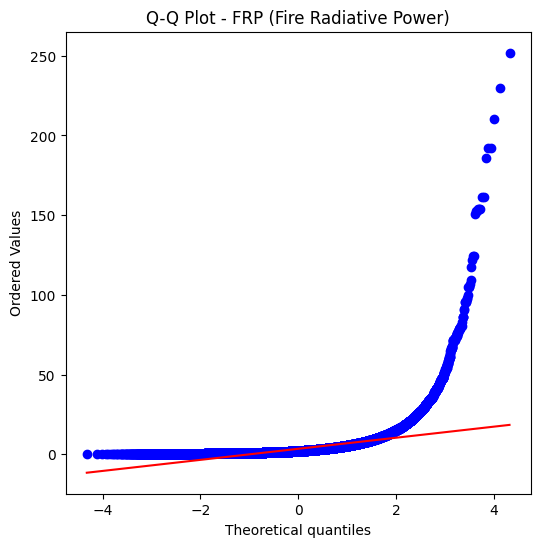

In [11]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Exemple avec la variable 'frp' (Fire Radiative Power)
plt.figure(figsize=(6, 6))
stats.probplot(fire_all['frp'].dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot - FRP (Fire Radiative Power)")
plt.show()


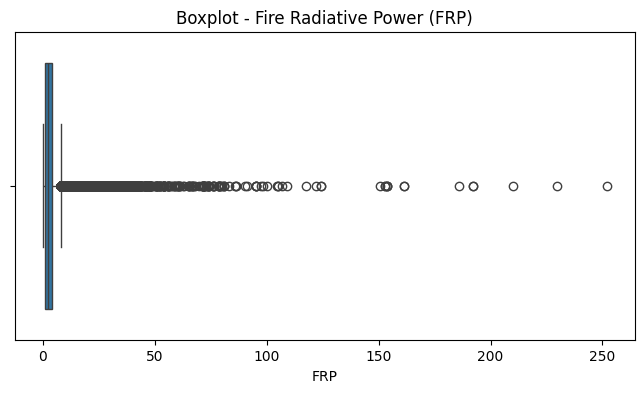

In [12]:
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x=fire_all['frp'])
plt.title("Boxplot - Fire Radiative Power (FRP)")
plt.xlabel("FRP")
plt.show()


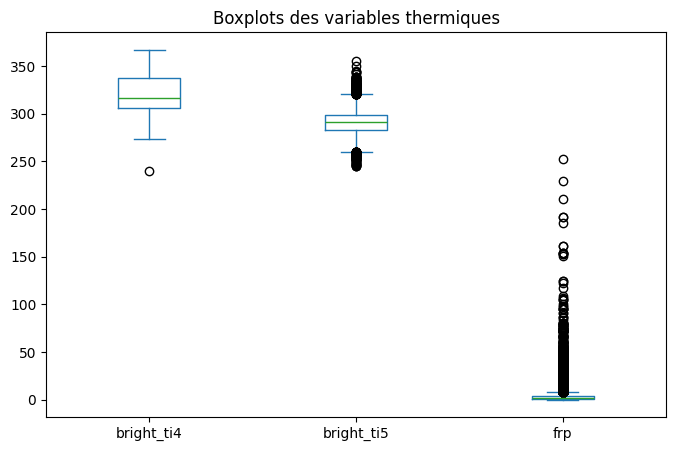

In [13]:
num_cols = ['bright_ti4', 'bright_ti5', 'frp']
fire_all[num_cols].plot(kind='box', figsize=(8,5))
plt.title("Boxplots des variables thermiques")
plt.show()


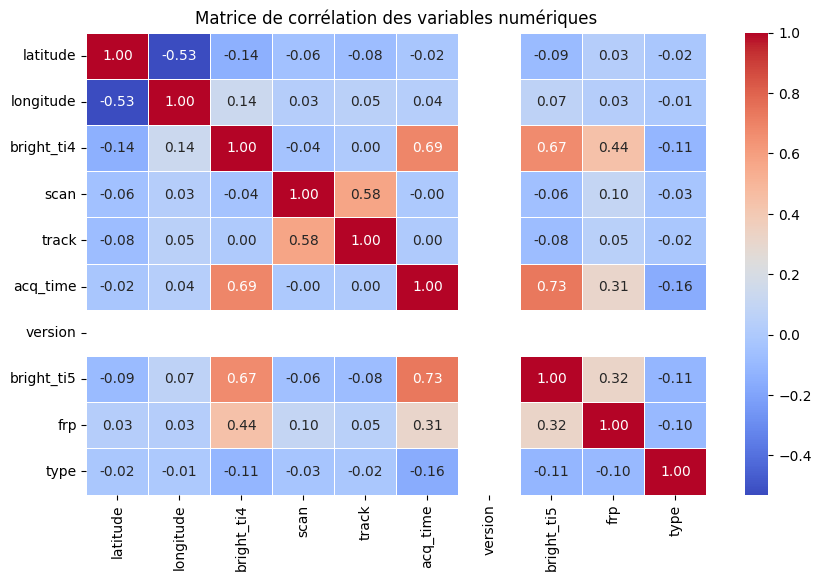

In [14]:
import numpy as np
import seaborn as sns

# Sélection des variables numériques
numeric_cols = fire_all.select_dtypes(include=np.number)

# Matrice de corrélation
corr = numeric_cols.corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation des variables numériques")
plt.show()


Matrice de corrélation :
            latitude  longitude  bright_ti4      scan     track  acq_time  \
latitude    1.000000  -0.529210   -0.142626 -0.056737 -0.079280 -0.024215   
longitude  -0.529210   1.000000    0.135387  0.026343  0.050468  0.036554   
bright_ti4 -0.142626   0.135387    1.000000 -0.044910  0.003835  0.688049   
scan       -0.056737   0.026343   -0.044910  1.000000  0.575396 -0.004630   
track      -0.079280   0.050468    0.003835  0.575396  1.000000  0.003684   
acq_time   -0.024215   0.036554    0.688049 -0.004630  0.003684  1.000000   
version          NaN        NaN         NaN       NaN       NaN       NaN   
bright_ti5 -0.089471   0.068563    0.668842 -0.058921 -0.078787  0.734202   
frp         0.026960   0.029148    0.444251  0.101830  0.047193  0.311035   
type       -0.019030  -0.007619   -0.114986 -0.030639 -0.019429 -0.159913   

            version  bright_ti5       frp      type  
latitude        NaN   -0.089471  0.026960 -0.019030  
longitude       NaN

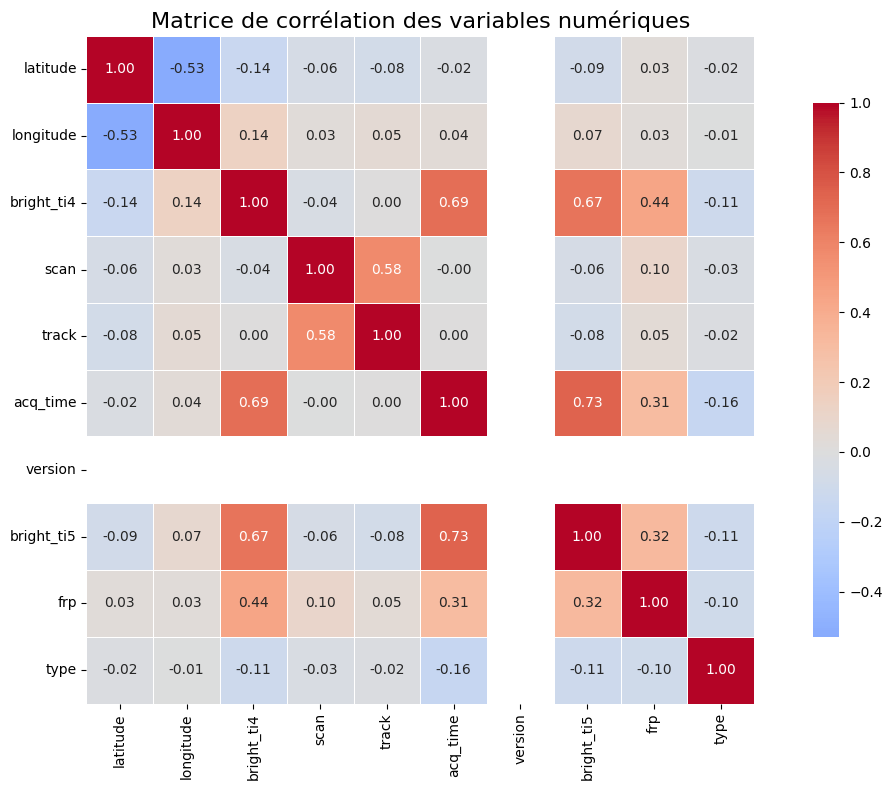

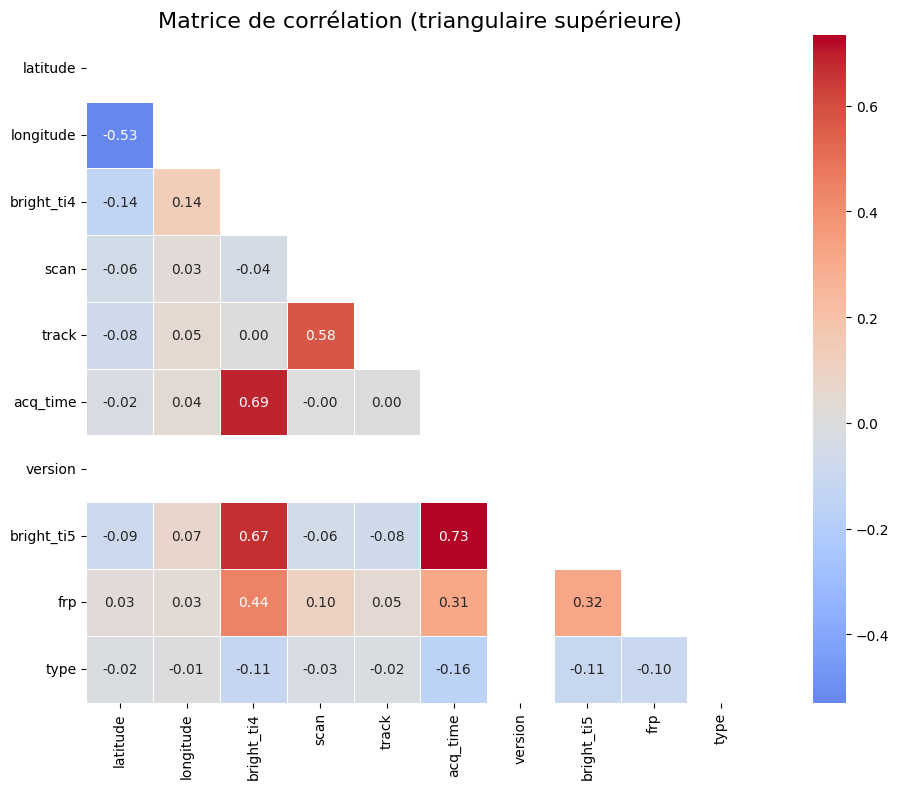

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Charger tes données (remplace 'ton_fichier.csv' par ton fichier)
df = pd.read_csv("data/processed/fire_2024_all.csv")

# Sélectionner seulement les variables numériques
df_numeric = df.select_dtypes(include=[np.number])

# Calculer la matrice de corrélation
correlation_matrix = df_numeric.corr()

# Afficher la matrice sous forme de tableau
print("Matrice de corrélation :")
print(correlation_matrix)
print("\n" + "="*50 + "\n")

# Option 1 : Afficher en format arrondi
print("Matrice de corrélation (arrondie à 2 décimales) :")
print(correlation_matrix.round(2))
print("\n" + "="*50 + "\n")

# Option 2 : Afficher avec un heatmap (visuel)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # Affiche les valeurs
            fmt='.2f',   # Format à 2 décimales
            cmap='coolwarm',  # Palette de couleurs
            center=0,    # Centre à 0
            square=True, # Cases carrées
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Matrice de corrélation des variables numériques', fontsize=16)
plt.tight_layout()
plt.show()

# Option 3 : Matrice triangulaire (sans redondance)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5)
plt.title('Matrice de corrélation (triangulaire supérieure)', fontsize=16)
plt.tight_layout()
plt.show()

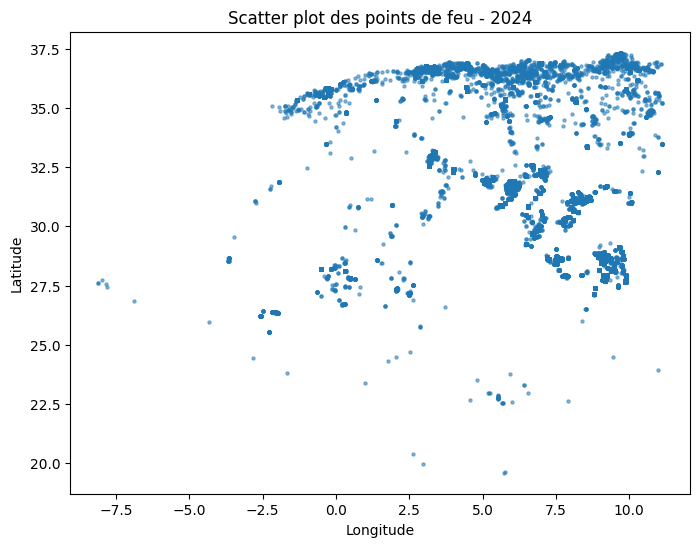

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(fire_all["longitude"], fire_all["latitude"], s=5, alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter plot des points de feu - 2024")
plt.show()


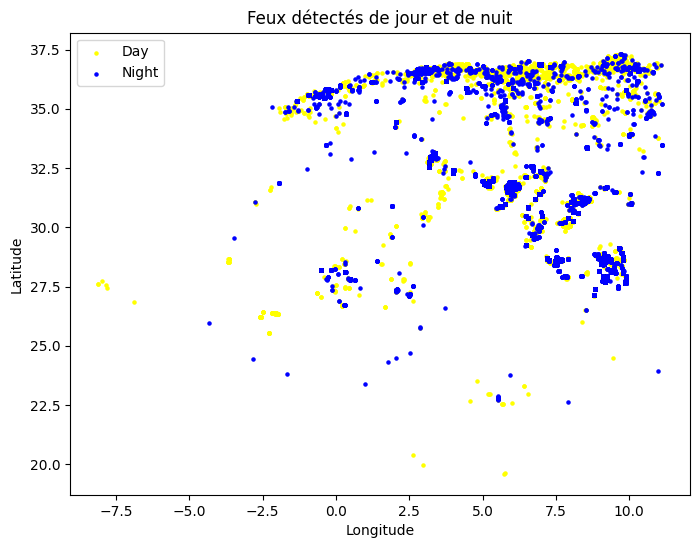

In [25]:
fire_day = fire_all[fire_all["daynight"] == "D"]
fire_night = fire_all[fire_all["daynight"] == "N"]

plt.figure(figsize=(8, 6))
plt.scatter(fire_day["longitude"], fire_day["latitude"], s=5, c="yellow", label="Day")
plt.scatter(fire_night["longitude"], fire_night["latitude"], s=5, c="blue", label="Night")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Feux détectés de jour et de nuit")
plt.show()


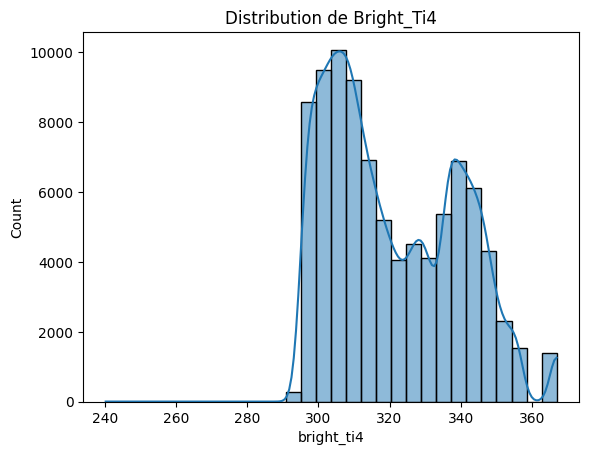

In [15]:
sns.histplot(fire_all['bright_ti4'], bins=30, kde=True)
plt.title("Distribution de Bright_Ti4")
plt.show()


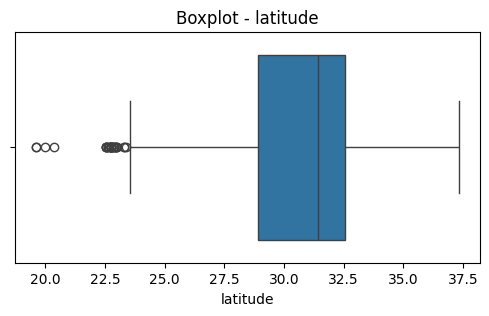

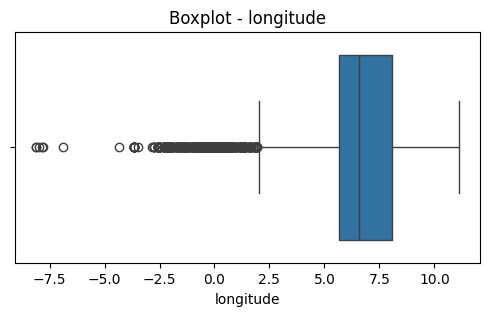

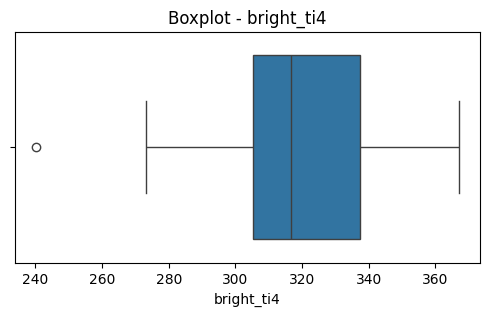

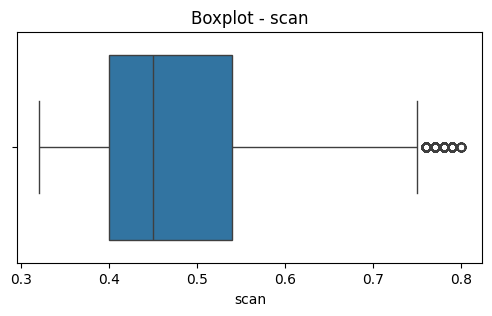

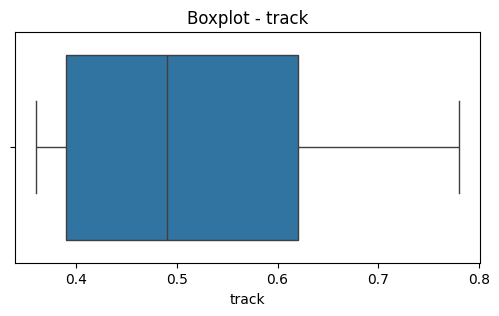

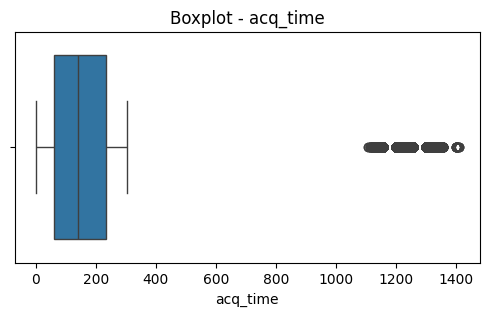

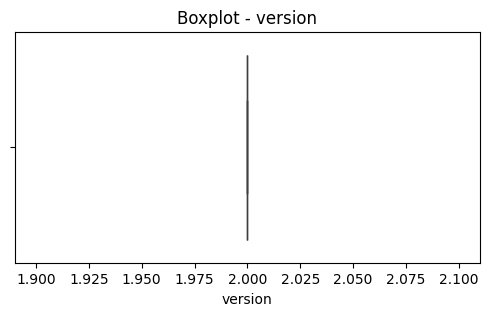

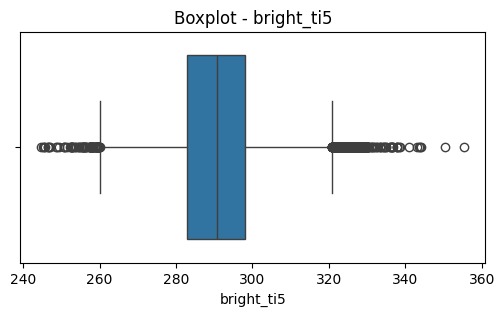

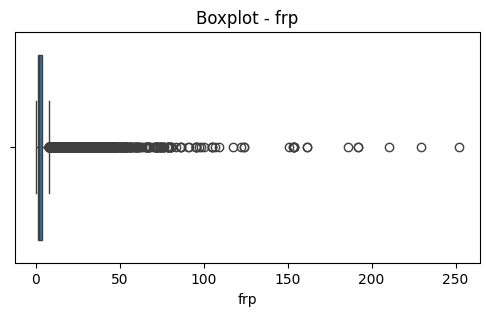

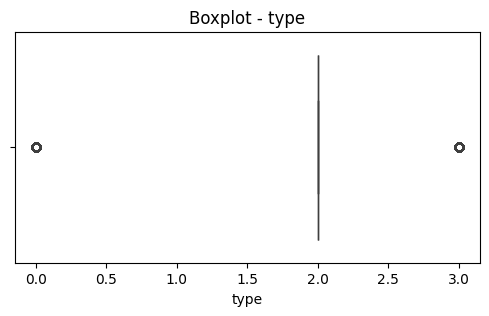

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = fire_all.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=fire_all[col])
    plt.title(f"Boxplot - {col}")
    plt.show()


ANALYSE DE NORMALITÉ PAR Q-Q PLOTS

bright_ti4     :
  • Test Shapiro-Wilk: p-value = 0.0000 → NON NORMAL
  • Test D'Agostino: p-value = 0.0000 → NON NORMAL
  • Skewness: 0.435 (quasi-symétrique)
  • Kurtosis: -0.926 (distrib. normale (mésokurtique))

bright_ti5     :
  • Test Shapiro-Wilk: p-value = 0.0000 → NON NORMAL
  • Test D'Agostino: p-value = 0.0000 → NON NORMAL
  • Skewness: 0.498 (quasi-symétrique)
  • Kurtosis: -0.008 (distrib. normale (mésokurtique))

frp            :
  • Test Shapiro-Wilk: p-value = 0.0000 → NON NORMAL
  • Test D'Agostino: p-value = 0.0000 → NON NORMAL
  • Skewness: 11.719 (asymétrie positive)
  • Kurtosis: 301.658 (distrib. pointue (leptokurtique))

acq_time       :
  • Test Shapiro-Wilk: p-value = 0.0000 → NON NORMAL
  • Test D'Agostino: p-value = 0.0000 → NON NORMAL
  • Skewness: 1.211 (asymétrie positive)
  • Kurtosis: -0.435 (distrib. normale (mésokurtique))

scan           :
  • Test Shapiro-Wilk: p-value = 0.0000 → NON NORMAL
  • Test D'Agostino: p-

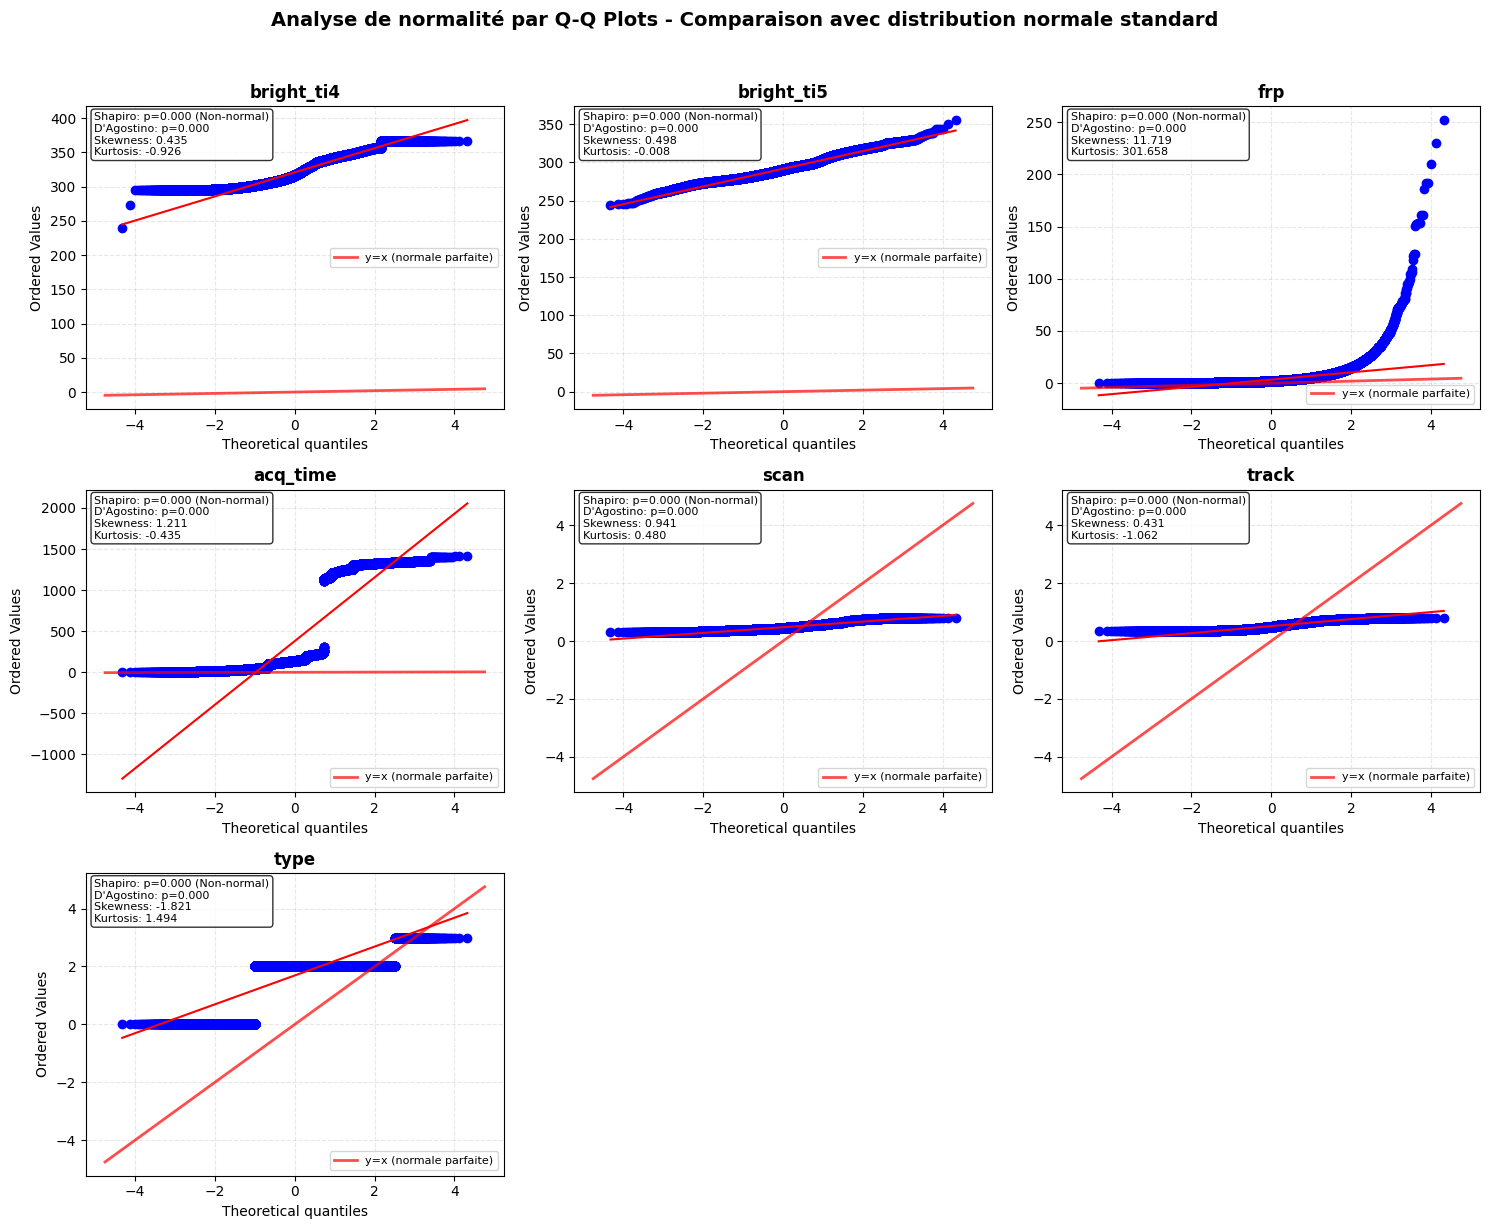


SYNTHÈSE DE L'ANALYSE DE NORMALITÉ

📊 Classification des variables selon leur distribution :
--------------------------------------------------
bright_ti4      → ✓ Distributions quasi-normales
bright_ti5      → ✓ Distributions quasi-normales
frp             → ⚠ Distributions asymétriques avec outliers
acq_time        → ⚠ Distributions asymétriques avec outliers
scan            → ↔ Distributions modérément asymétriques
track           → ↔ Distributions modérément asymétriques
type            → ↔ Distributions modérément asymétriques


In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
from scipy.stats import shapiro, normaltest

df = pd.read_csv("data/processed/fire_2024_all.csv")

# Sélection des variables principales
variables = ['bright_ti4', 'bright_ti5', 'frp', 'acq_time', 'scan', 'track', 'type']
variables = [v for v in variables if v in df.columns]

# Création des Q-Q Plots
n_cols = 3
n_rows = int(np.ceil(len(variables) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

print("="*70)
print("ANALYSE DE NORMALITÉ PAR Q-Q PLOTS")
print("="*70)

for i, var in enumerate(variables):
    data = df[var].dropna()
    
    if len(data) > 2:
        # Créer le Q-Q plot
        stats.probplot(data, dist="norm", plot=axes[i])
        axes[i].set_title(f'{var}', fontsize=12, fontweight='bold')
        axes[i].grid(True, alpha=0.3, linestyle='--')
        
        # Ligne de référence y = x
        xlim = axes[i].get_xlim()
        axes[i].plot(xlim, xlim, 'r-', linewidth=2, alpha=0.7, label='y=x (normale parfaite)')
        axes[i].legend(fontsize=8)
        
        # Calcul des statistiques
        if len(data) > 3:
            # Test de Shapiro-Wilk (pour échantillons ≤ 5000)
            sample_size = min(5000, len(data))
            sample = data.sample(n=sample_size, random_state=42) if len(data) > sample_size else data
            
            shapiro_stat, shapiro_p = shapiro(sample)
            dagostino_stat, dagostino_p = normaltest(data.dropna())
            skew_val = stats.skew(data)
            kurt_val = stats.kurtosis(data)
            
            # Interprétation
            is_normal_shapiro = shapiro_p > 0.05
            is_normal_dagostino = dagostino_p > 0.05
            
            # Affichage des résultats
            result_text = f"Shapiro: p={shapiro_p:.3f} ({'Normal' if is_normal_shapiro else 'Non-normal'})\n"
            result_text += f"D'Agostino: p={dagostino_p:.3f}\n"
            result_text += f"Skewness: {skew_val:.3f}\n"
            result_text += f"Kurtosis: {kurt_val:.3f}"
            
            axes[i].text(0.02, 0.98, result_text, transform=axes[i].transAxes,
                        fontsize=8, verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            # Affichage console
            print(f"\n{var:15s}:")
            print(f"  • Test Shapiro-Wilk: p-value = {shapiro_p:.4f} → {'Normal' if is_normal_shapiro else 'NON NORMAL'}")
            print(f"  • Test D'Agostino: p-value = {dagostino_p:.4f} → {'Normal' if is_normal_dagostino else 'NON NORMAL'}")
            print(f"  • Skewness: {skew_val:.3f} ({'asymétrie positive' if skew_val > 0.5 else 'asymétrie négative' if skew_val < -0.5 else 'quasi-symétrique'})")
            print(f"  • Kurtosis: {kurt_val:.3f} ({'distrib. pointue (leptokurtique)' if kurt_val > 1 else 'distrib. aplatie (platykurtique)' if kurt_val < -1 else 'distrib. normale (mésokurtique)'})")
        
    else:
        axes[i].text(0.5, 0.5, f"Données insuffisantes\npour {var}", 
                    ha='center', va='center', fontsize=10)
        axes[i].set_title(var, fontsize=12)

# Cacher les axes inutilisés
for j in range(len(variables), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Analyse de normalité par Q-Q Plots - Comparaison avec distribution normale standard', 
             fontsize=14, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

# Résumé général
print("\n" + "="*70)
print("SYNTHÈSE DE L'ANALYSE DE NORMALITÉ")
print("="*70)

# Catégorisation des variables
print("\n📊 Classification des variables selon leur distribution :")
print("-" * 50)

for var in variables:
    data = df[var].dropna()
    if len(data) > 3:
        skew_val = stats.skew(data)
        kurt_val = stats.kurtosis(data)
        
        if -0.5 <= skew_val <= 0.5 and -1 <= kurt_val <= 1:
            category = "✓ Distributions quasi-normales"
        elif skew_val > 1 or kurt_val > 2:
            category = "⚠ Distributions asymétriques avec outliers"
        else:
            category = "↔ Distributions modérément asymétriques"
        
        print(f"{var:15s} → {category}")

Nombre de variables numériques: 10
Variables: ['latitude', 'longitude', 'bright_ti4', 'scan', 'track', 'acq_time', 'version', 'bright_ti5', 'frp', 'type']
Disposition: 4 x 3


C:\Users\DELL\AppData\Local\Temp\ipykernel_9368\564726389.py:58: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = stats.pearsonr(data, theoretical_quantiles)[0]


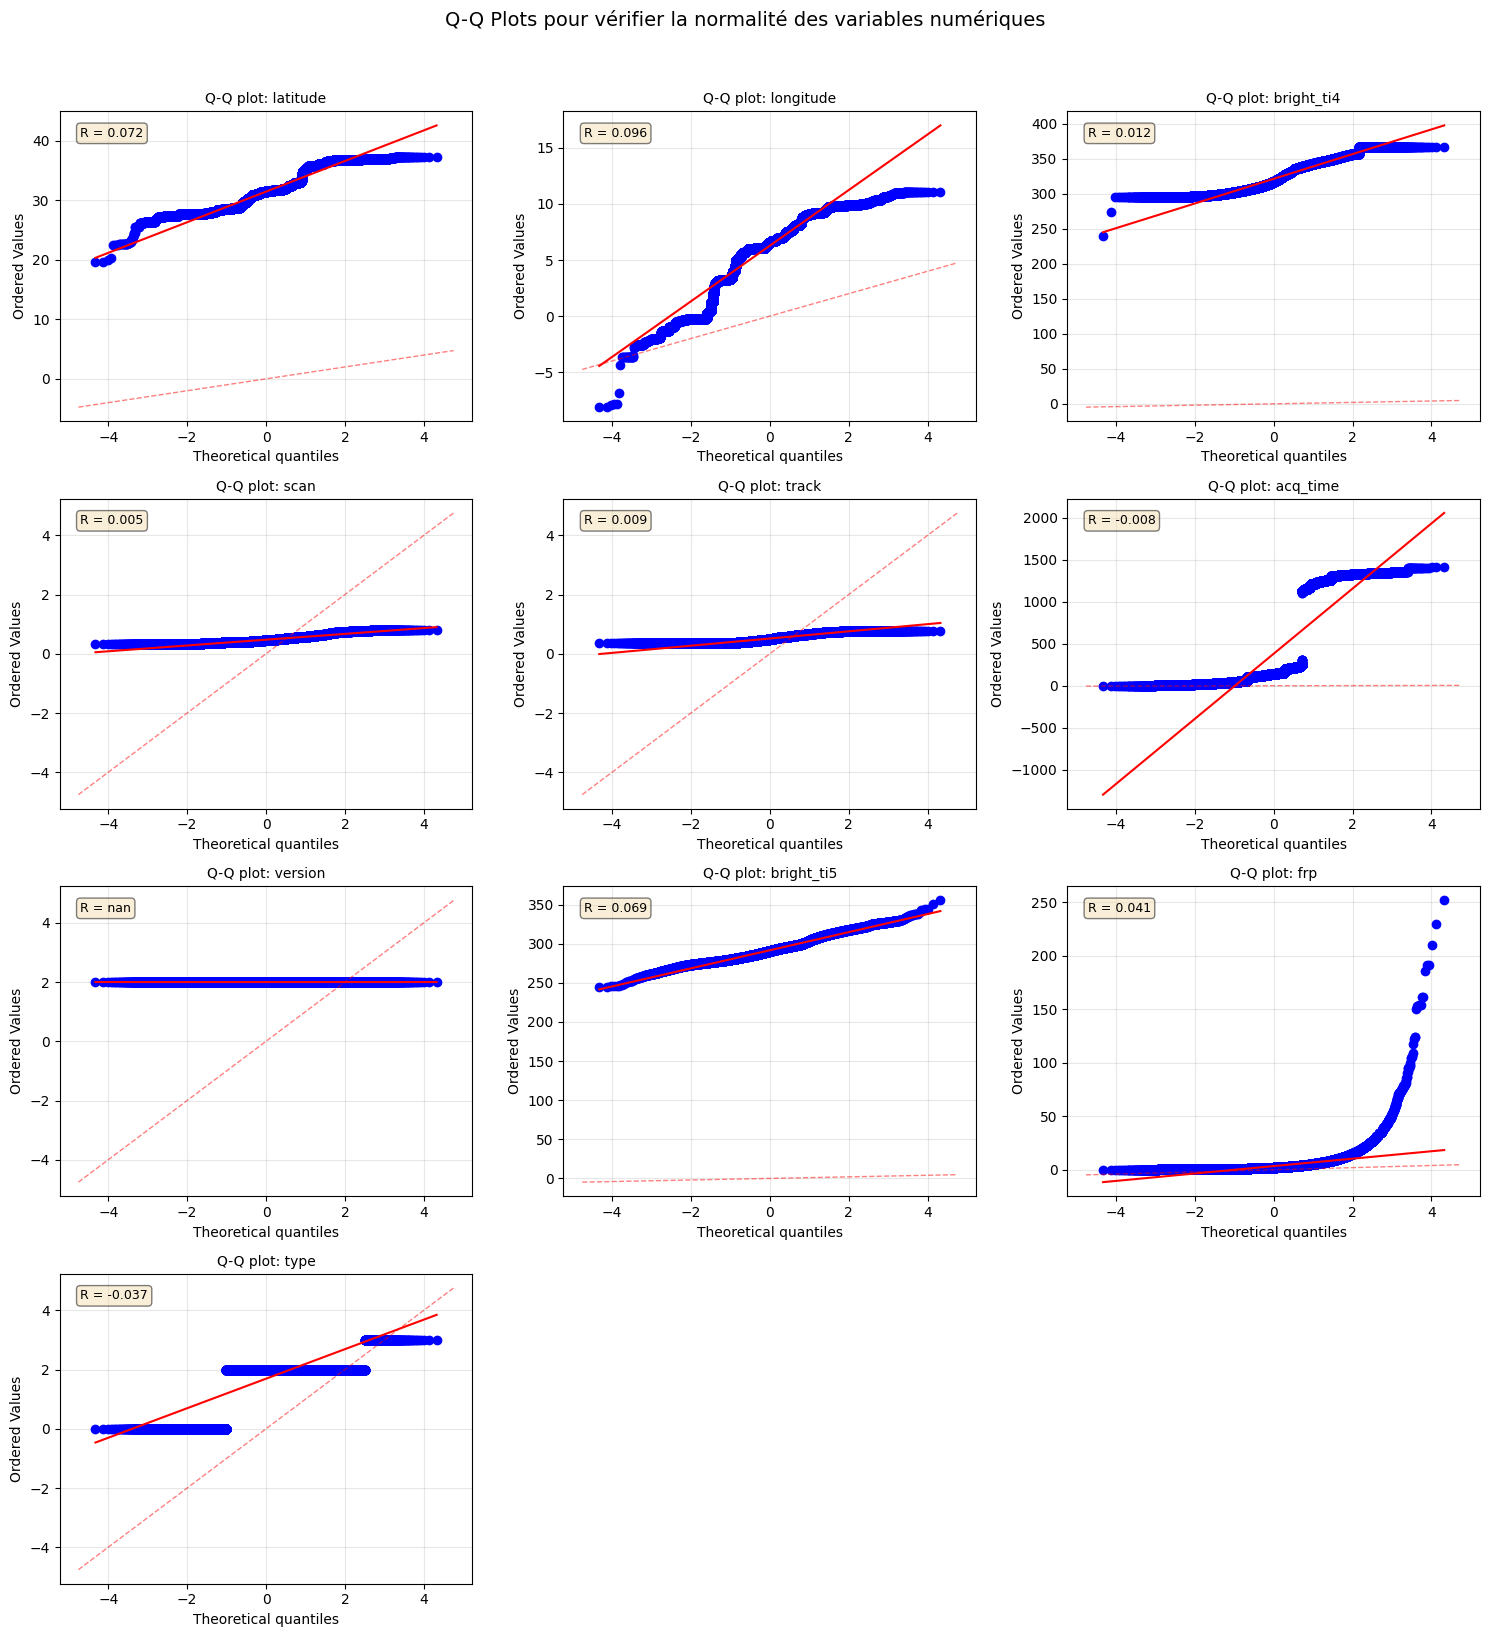


RÉSUMÉ DE LA NORMALITÉ
latitude             | Skew:   0.465 | Kurtosis:  -0.560 | p-value: 0.0000 | Normal: NON
longitude            | Skew:  -0.985 | Kurtosis:   0.841 | p-value: 0.0000 | Normal: NON
bright_ti4           | Skew:   0.435 | Kurtosis:  -0.926 | p-value: 0.0000 | Normal: NON
scan                 | Skew:   0.941 | Kurtosis:   0.480 | p-value: 0.0000 | Normal: NON
track                | Skew:   0.431 | Kurtosis:  -1.062 | p-value: 0.0000 | Normal: NON
acq_time             | Skew:   1.211 | Kurtosis:  -0.435 | p-value: 0.0000 | Normal: NON
version              | Skew:     nan | Kurtosis:     nan | p-value: 1.0000 | Normal: OUI
bright_ti5           | Skew:   0.498 | Kurtosis:  -0.008 | p-value: 0.0000 | Normal: NON
frp                  | Skew:  11.719 | Kurtosis: 301.658 | p-value: 0.0000 | Normal: NON
type                 | Skew:  -1.821 | Kurtosis:   1.494 | p-value: 0.0000 | Normal: NON


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9368\564726389.py:89: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = stats.skew(data)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9368\564726389.py:90: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = stats.kurtosis(data)


In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd

# Charger les données
df = pd.read_csv("data/processed/fire_2024_all.csv")

# Sélection des colonnes numériques uniquement
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Nombre de colonnes numériques
n_cols = len(numerical_cols)

print(f"Nombre de variables numériques: {n_cols}")
print(f"Variables: {list(numerical_cols)}")

# Calculer la disposition de la grille
n_rows = int(np.ceil(np.sqrt(n_cols)))
n_cols_grid = int(np.ceil(n_cols / n_rows))

print(f"Disposition: {n_rows} x {n_cols_grid}")

# Créer la figure
fig, axes = plt.subplots(n_rows, n_cols_grid, figsize=(5*n_cols_grid, 4*n_rows))

# Si n_rows ou n_cols_grid = 1, axes n'est pas un tableau 2D
if n_rows == 1 or n_cols_grid == 1:
    axes = np.array(axes).reshape(-1)
else:
    axes = axes.flatten()

# Boucle sur chaque colonne pour créer un Q-Q plot
for i, col in enumerate(numerical_cols):
    # Vérifier si la colonne a suffisamment de données
    data = df[col].dropna()
    
    if len(data) < 2:
        print(f"Attention: {col} a moins de 2 valeurs non-null")
        axes[i].text(0.5, 0.5, f"Données insuffisantes\npour {col}", 
                     ha='center', va='center')
        axes[i].set_title(f"Q-Q plot: {col}", fontsize=10)
        continue
    
    # Créer le Q-Q plot
    stats.probplot(data, dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q plot: {col}", fontsize=10)
    axes[i].grid(True, alpha=0.3)
    
    # Ajouter la ligne y=x pour référence
    xlim = axes[i].get_xlim()
    axes[i].plot(xlim, xlim, 'r--', alpha=0.5, linewidth=1, label='y=x')
    
    # Ajouter coefficient de corrélation
    try:
        # Générer les quantiles théoriques
        theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(data)))
        correlation = stats.pearsonr(data, theoretical_quantiles)[0]
        
        axes[i].text(0.05, 0.95, f'R = {correlation:.3f}', 
                     transform=axes[i].transAxes, 
                     fontsize=9, verticalalignment='top',
                     bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    except Exception as e:
        print(f"Erreur calcul corrélation pour {col}: {e}")

# Cacher les axes vides s'il y en a
for j in range(len(numerical_cols), len(axes)):
    axes[j].axis('off')

plt.suptitle('Q-Q Plots pour vérifier la normalité des variables numériques', 
             fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Afficher un résumé
print("\n" + "="*60)
print("RÉSUMÉ DE LA NORMALITÉ")
print("="*60)

for col in numerical_cols:
    data = df[col].dropna()
    if len(data) > 3:
        # Tester la normalité avec Shapiro-Wilk (échantillon limité à 5000 pour performance)
        sample_size = min(5000, len(data))
        sample = data.sample(n=sample_size, random_state=42) if len(data) > sample_size else data
        
        stat, p_value = stats.shapiro(sample)
        skewness = stats.skew(data)
        kurtosis = stats.kurtosis(data)
        
        normal = "NON" if p_value < 0.05 else "OUI"
        print(f"{col:20s} | Skew: {skewness:7.3f} | Kurtosis: {kurtosis:7.3f} | p-value: {p_value:.4f} | Normal: {normal}")
    else:
        print(f"{col:20s} | Données insuffisantes pour test")

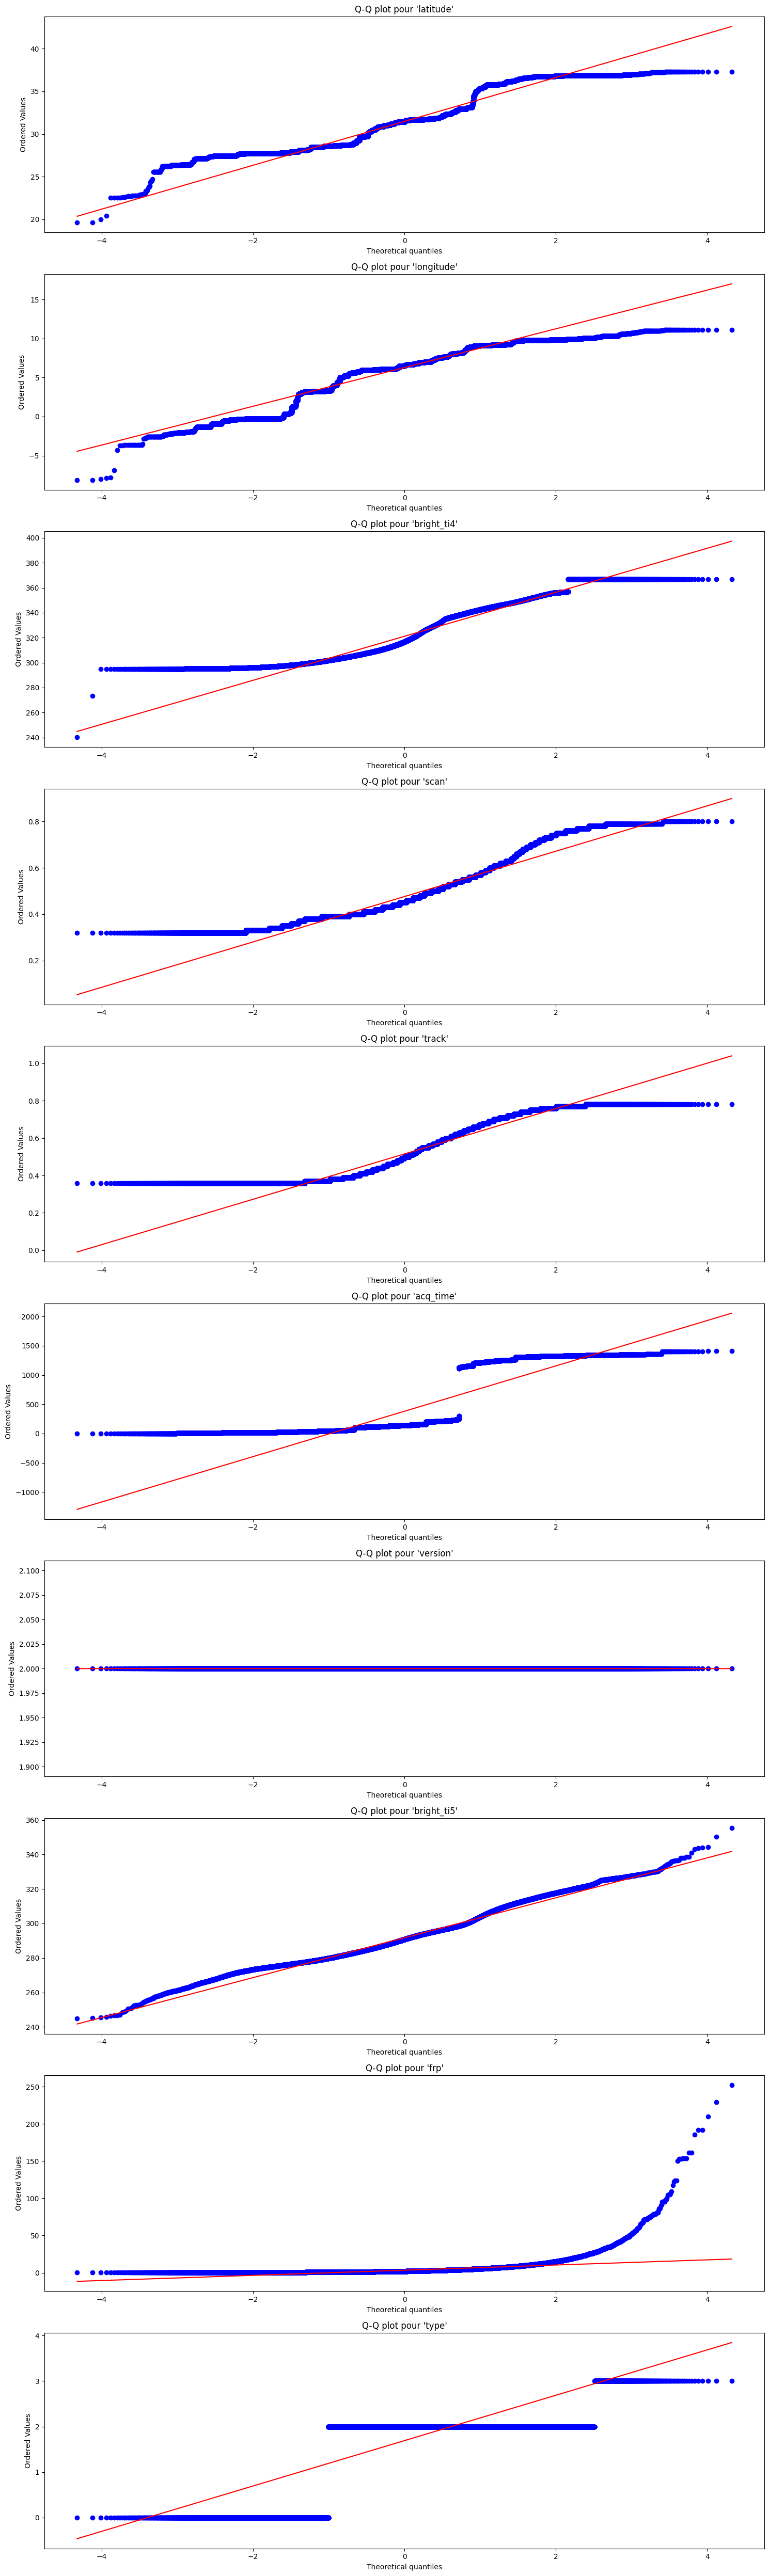

In [18]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Sélection des colonnes numériques uniquement
numerical_cols = fire_all.select_dtypes(include=['float64', 'int64']).columns

# Nombre de colonnes numériques
n_cols = len(numerical_cols)

# Définir la taille de la figure
plt.figure(figsize=(15, 5 * n_cols))

# Boucle sur chaque colonne pour créer un Q-Q plot
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_cols, 1, i)
    stats.probplot(fire_all[col], dist="norm", plot=plt)
    plt.title(f"Q-Q plot pour '{col}'")

plt.tight_layout()
plt.show()


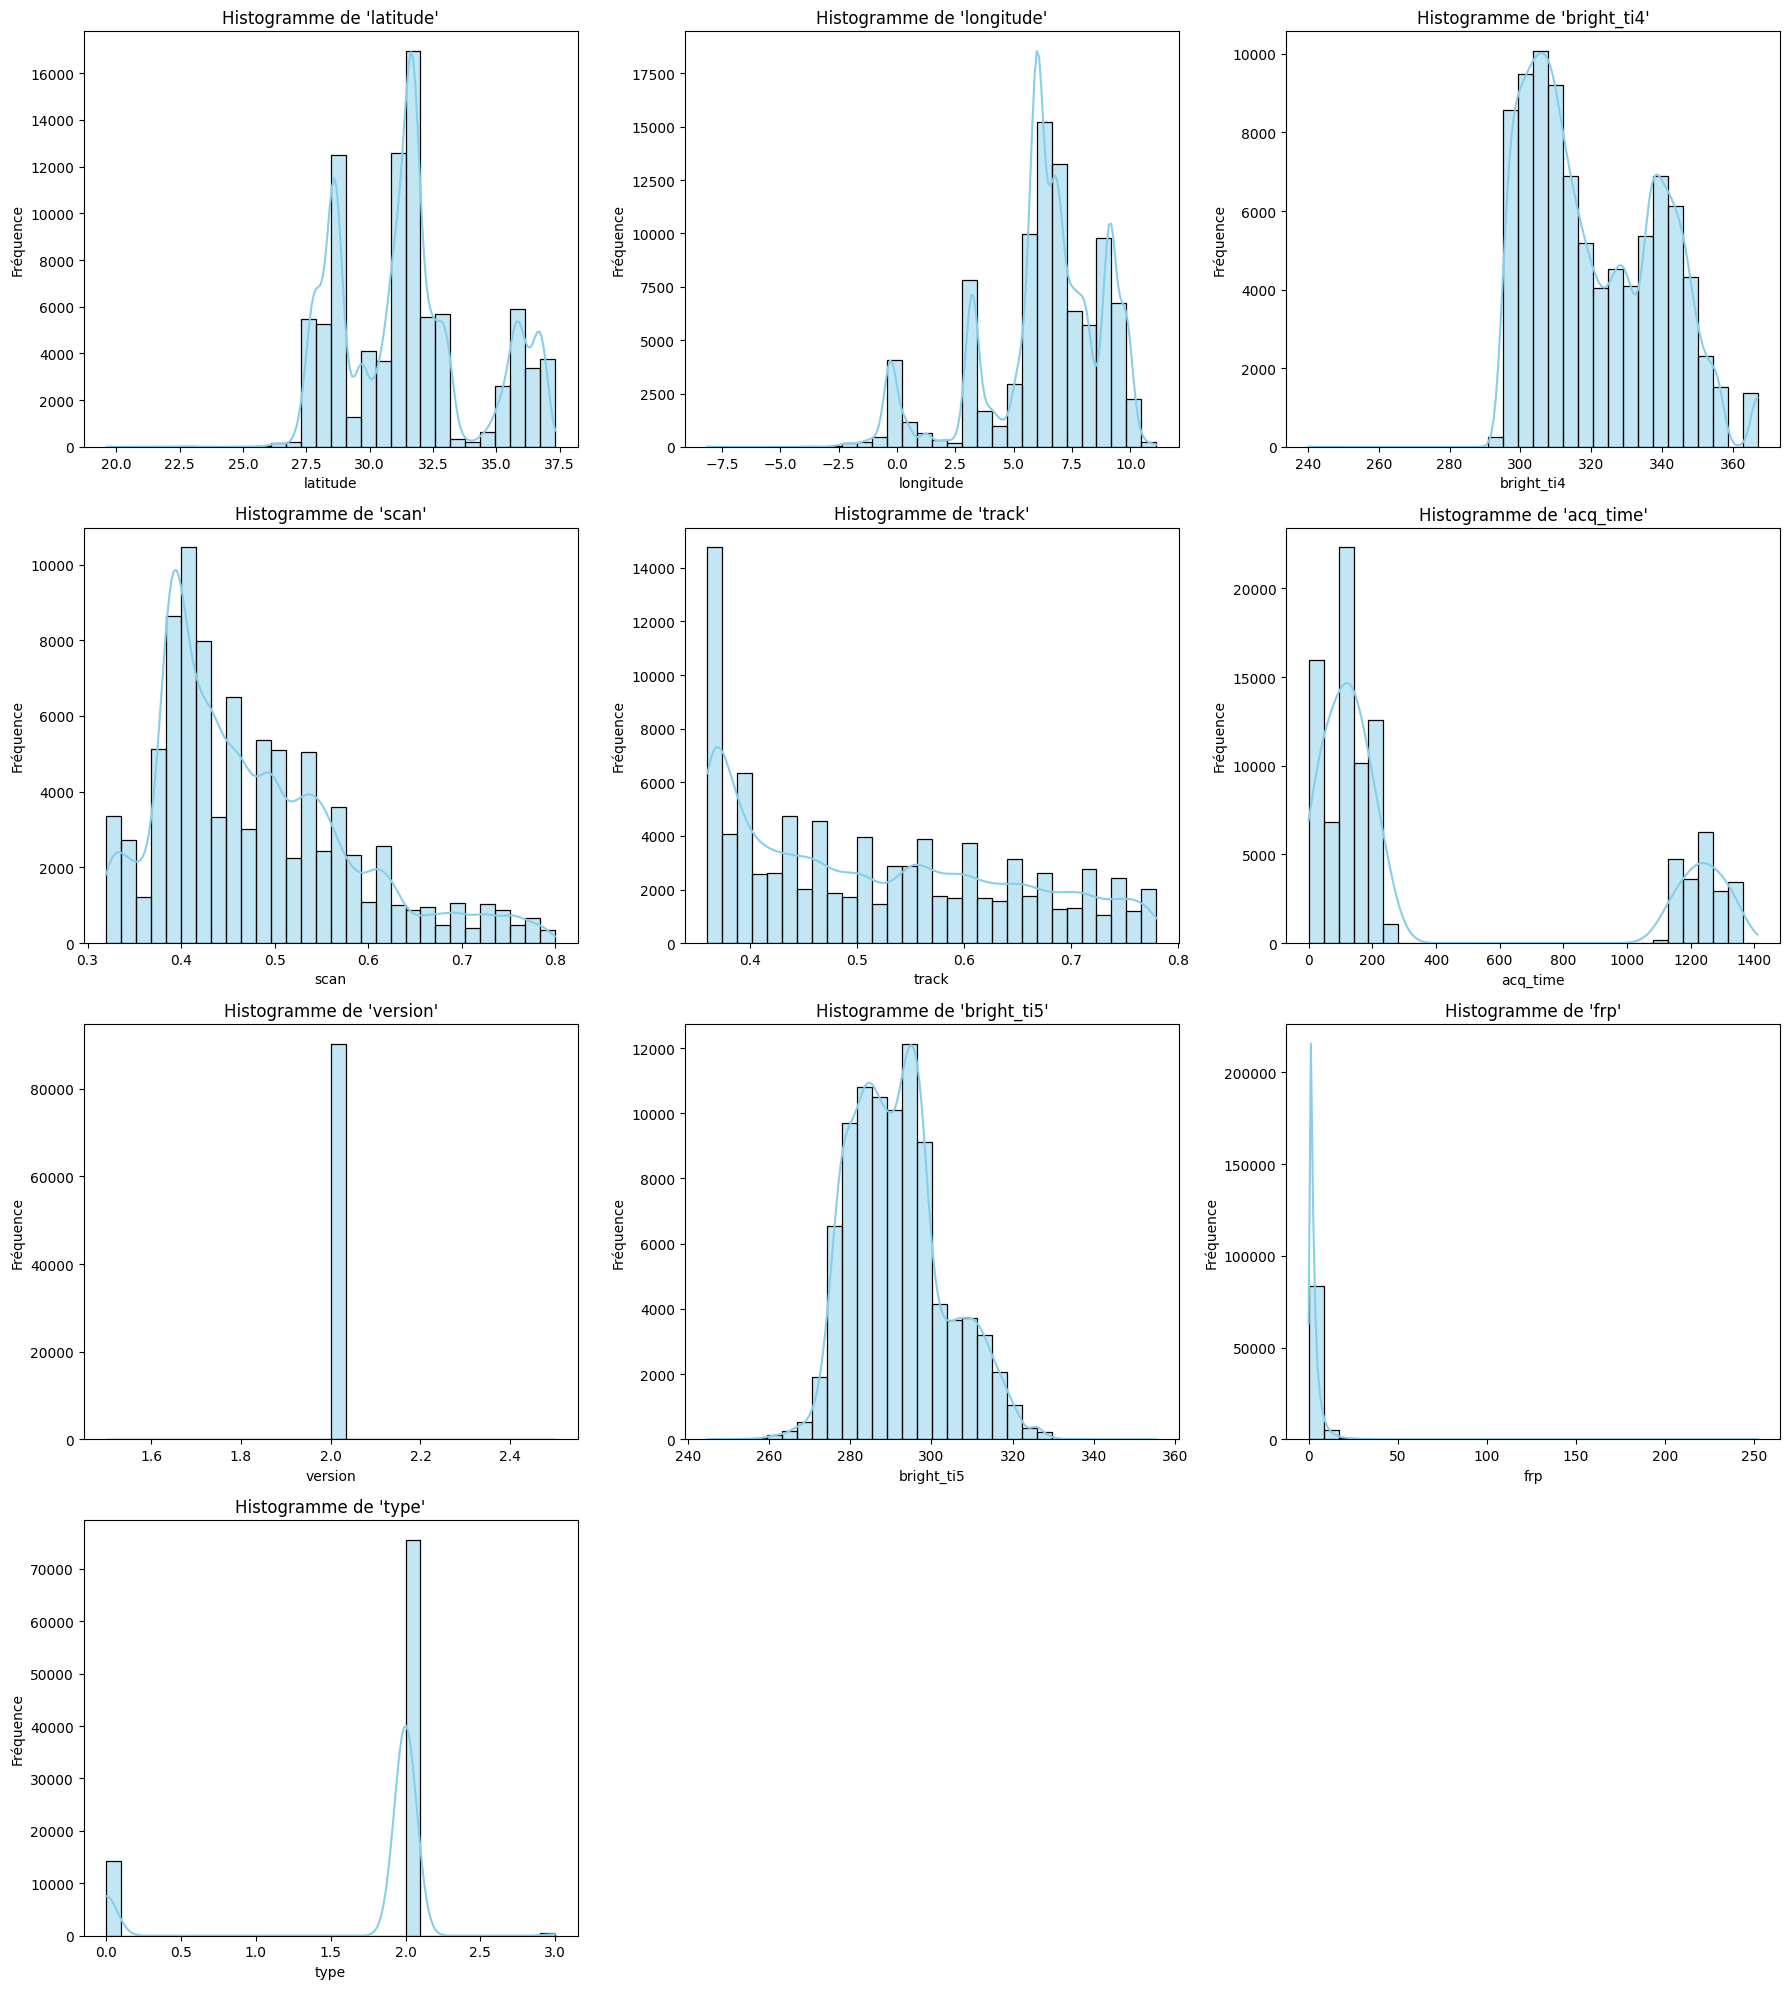

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes numériques
numerical_cols = fire_all.select_dtypes(include=['float64', 'int64']).columns
n_cols = len(numerical_cols)

# Définir une grille pour les subplots
n_rows = (n_cols // 3) + 1  # 3 histogrammes par ligne
plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, 3, i)
    sns.histplot(fire_all[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Histogramme de '{col}'")
    plt.xlabel(col)
    plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()


In [6]:
import geopandas as gpd
fusion_path = r"C:\Users\DELL\Desktop\project_fire\data\raw\landcover\Fusion_Harmonisee"
lc_fusion = gpd.read_file(fusion_path)

print(" Dataset landcover fusioné chargé !")
print("Taille :", lc_fusion.shape)
print("CRS :", lc_fusion.crs)
print("Colonnes :", list(lc_fusion.columns))



 Dataset landcover fusioné chargé !
Taille : (438513, 5)
CRS : EPSG:4326
Colonnes : ['ID', 'GRIDCODE', 'AREA_M2', 'LCCCODE', 'geometry']


In [7]:
print("Nombre de lignes :", lc_fusion.shape[0])
print("Nombre de colonnes :", lc_fusion.shape[1])
print("\nTypes de données :")
print(lc_fusion.dtypes)



Nombre de lignes : 438513
Nombre de colonnes : 5

Types de données :
ID             int32
GRIDCODE       int32
AREA_M2      float64
LCCCODE       object
geometry    geometry
dtype: object


In [8]:
for col in lc_fusion.columns:
    print(f"{col} --> {lc_fusion[col].nunique()} valeurs uniques")


ID --> 386454 valeurs uniques
GRIDCODE --> 22 valeurs uniques
AREA_M2 --> 250950 valeurs uniques
LCCCODE --> 22 valeurs uniques
geometry --> 438513 valeurs uniques


In [9]:
print(lc_fusion.isna().sum())


ID          0
GRIDCODE    0
AREA_M2     0
LCCCODE     0
geometry    0
dtype: int64


In [10]:
lc_fusion.describe()


ID       GRIDCODE       AREA_M2
count  438513.000000  438513.000000  4.385130e+05
mean   173378.294498     156.209934  5.636630e+06
std    117981.553876      65.661496  1.192254e+09
min         1.000000      14.000000  1.002300e+05
25%     57570.000000     150.000000  1.727640e+05
50%    167198.000000     200.000000  3.102027e+05
75%    276826.000000     200.000000  6.763858e+05
max    386454.000000     210.000000  6.720004e+11

In [11]:
print(lc_fusion.columns)


Index(['ID', 'GRIDCODE', 'AREA_M2', 'LCCCODE', 'geometry'], dtype='object')


In [12]:
print(lc_fusion["GRIDCODE"].value_counts())


GRIDCODE
200    172221
201     61857
150     47560
20      31891
202     25951
30      24856
151     24520
110     16002
14      14872
130      8248
134      5432
50       2575
70        818
16        550
210       538
120       405
190       145
100        49
203         8
41          8
170         6
140         1
Name: count, dtype: int64


La colonne principale utilisée dans presque tous les shapefiles de Land Cover est GRIDCODE.

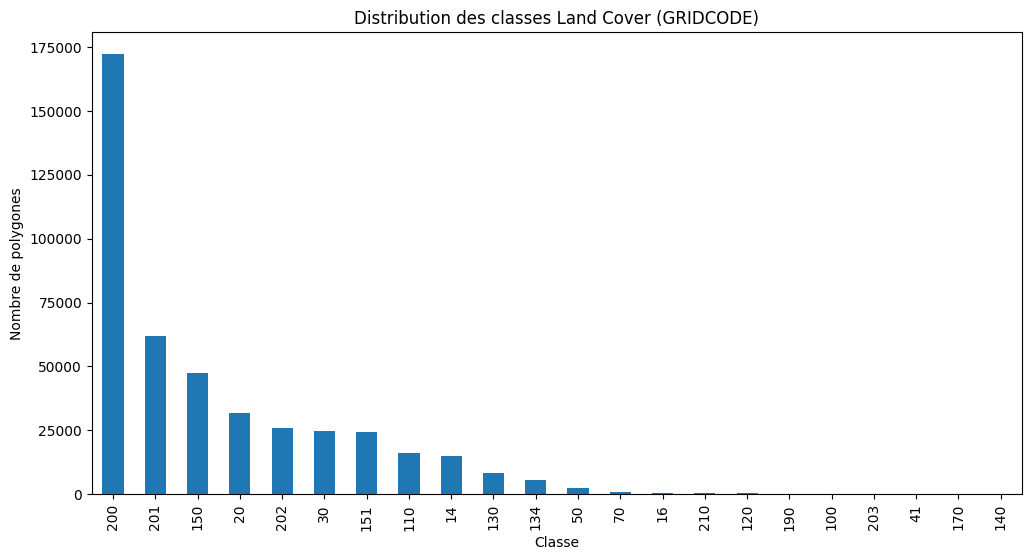

In [13]:
import matplotlib.pyplot as plt

lc_fusion["GRIDCODE"].value_counts().plot(kind="bar", figsize=(12,6))
plt.title("Distribution des classes Land Cover (GRIDCODE)")
plt.xlabel("Classe")
plt.ylabel("Nombre de polygones")
plt.show()


In [14]:
surface_par_classe = lc_fusion.groupby("GRIDCODE")["AREA_M2"].sum()
print(surface_par_classe)


GRIDCODE
14     1.827424e+10
16     2.062248e+08
20     4.137746e+10
30     6.618288e+10
41     3.437566e+06
50     3.777412e+09
70     5.373789e+08
100    2.018074e+07
110    1.102021e+10
120    2.031757e+08
130    9.849685e+09
134    2.796400e+09
140    1.798052e+05
150    7.089607e+10
151    5.213595e+10
170    2.944692e+06
190    3.864908e+09
200    4.844063e+11
201    1.146743e+12
202    5.558262e+11
203    9.029010e+07
210    3.520545e+09
Name: AREA_M2, dtype: float64


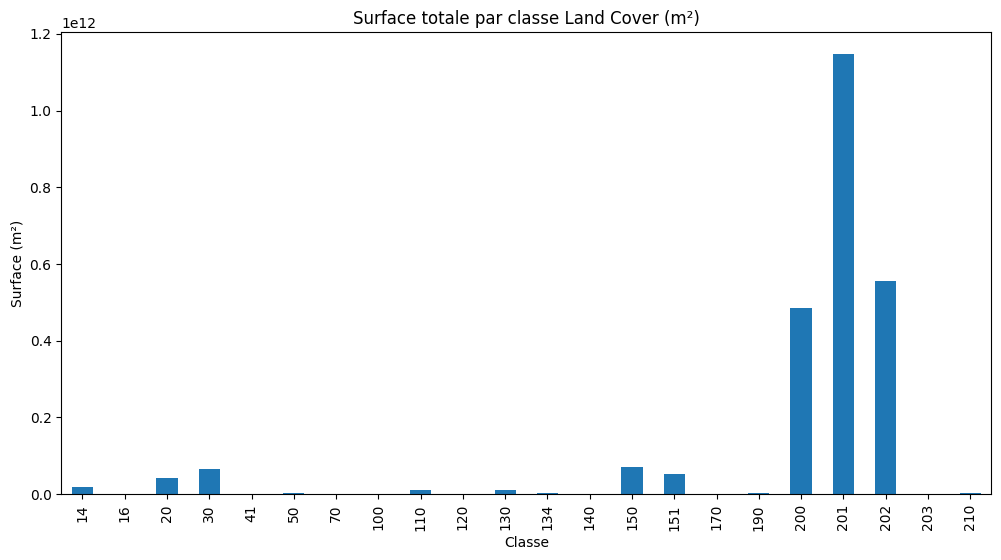

In [15]:
surface_par_classe.plot(kind="bar", figsize=(12,6))
plt.title("Surface totale par classe Land Cover (m²)")
plt.ylabel("Surface (m²)")
plt.xlabel("Classe")
plt.show()


In [16]:
print("Doublons :", lc_fusion.duplicated().sum())


Doublons : 0


In [28]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

path = r"C:\Users\DELL\Desktop\project_fire\data\processed\elevation_maghreb.tif"

with rasterio.open(path) as src:
    elev = src.read(1)
    nodata = src.nodata
    crs = src.crs
    width = src.width
    height = src.height

print("Dimensions :", elev.shape)
print("CRS :", crs)
print("NoData :", nodata)


Dimensions : (4461, 4958)
CRS : EPSG:4326
NoData : -32768.0


In [29]:
elev_numeric = elev.astype(float)

# Remplace NODATA par NaN pour l’analyse statistique (pas un nettoyage !)
if nodata is not None:
    elev_numeric[elev_numeric == nodata] = np.nan

print("Min :", np.nanmin(elev_numeric))
print("Max :", np.nanmax(elev_numeric))
print("Mean :", np.nanmean(elev_numeric))
print("Median :", np.nanmedian(elev_numeric))
print("Std :", np.nanstd(elev_numeric))



Min : -872.0
Max : 2877.0
Mean : 538.5577575047209
Median : 465.0
Std : 324.20901346321114


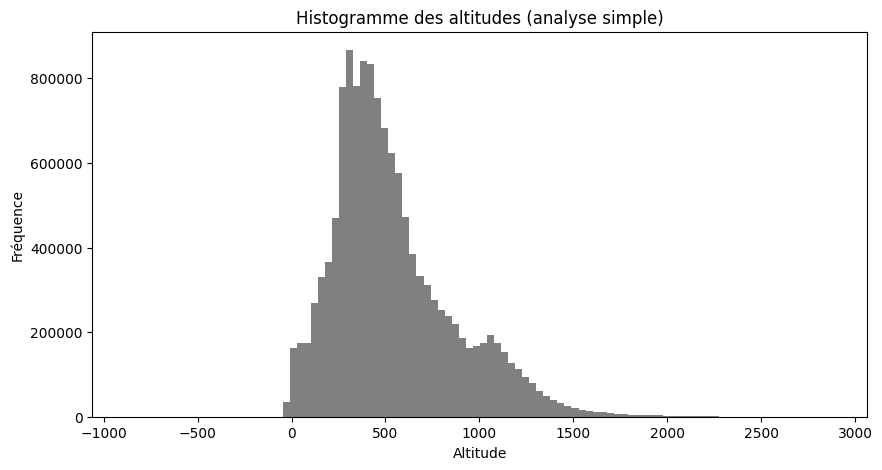

In [30]:
plt.figure(figsize=(10,5))
plt.hist(elev_numeric.flatten(), bins=100, color='gray')
plt.title("Histogramme des altitudes (analyse simple)")
plt.xlabel("Altitude")
plt.ylabel("Fréquence")
plt.show()


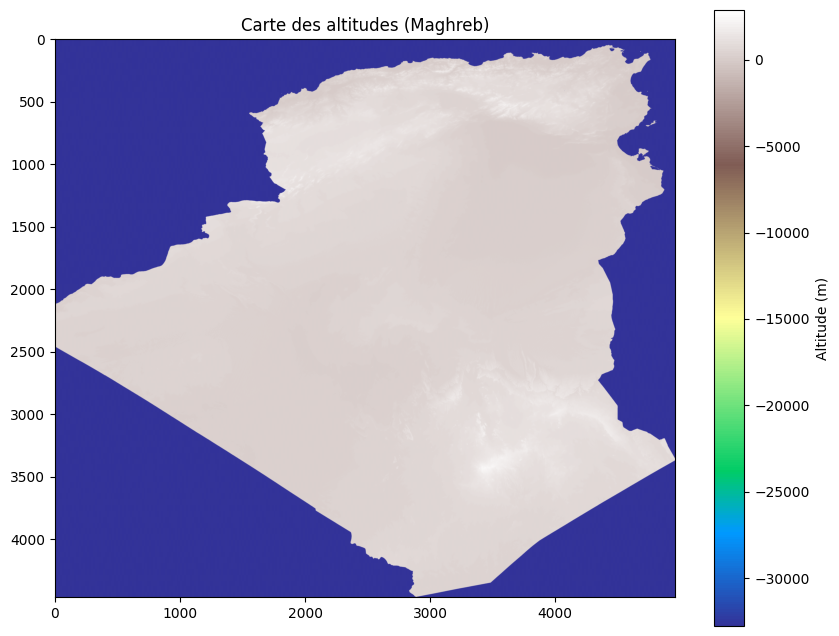

In [32]:
plt.figure(figsize=(10,8))
plt.imshow(elev, cmap="terrain")
plt.title("Carte des altitudes (Maghreb)")
plt.colorbar(label="Altitude (m)")
plt.show()


In [33]:
unique_vals = np.unique(elev[~np.isnan(elev)])
print("Nombre de valeurs uniques (altitudes distinctes) :", len(unique_vals))


Nombre de valeurs uniques (altitudes distinctes) : 2628


In [34]:
print("Nombre total de NaN :", np.isnan(elev_numeric).sum())
print("Nombre total de valeurs :", elev_numeric.size)


Nombre total de NaN : 8949860
Nombre total de valeurs : 22117638


In [35]:
print("Valeurs inf :", np.isinf(elev_numeric).sum())
print("Valeurs -inf :", np.isneginf(elev_numeric).sum())


Valeurs inf : 0
Valeurs -inf : 0


In [36]:
print(elev_numeric.shape)


(4461, 4958)


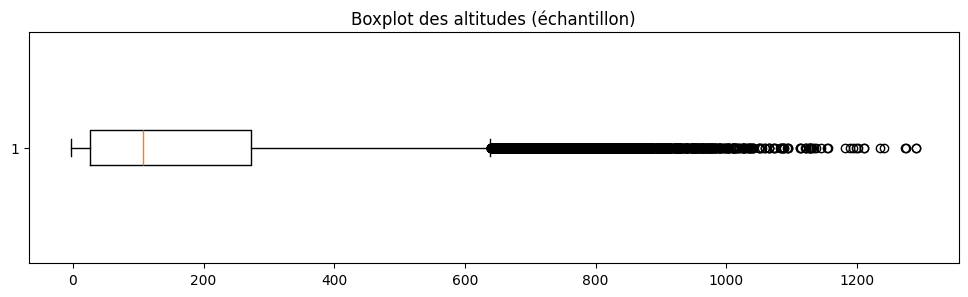

In [37]:
sample = elev_numeric.flatten()
sample = sample[~np.isnan(sample)]  # retirer NaN pour analyse uniquement

# prendre 100 000 points max pour visualisation
if sample.size > 100000:
    sample = sample[:100000]

plt.figure(figsize=(12,3))
plt.boxplot(sample, vert=False)
plt.title("Boxplot des altitudes (échantillon)")
plt.show()


In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

fusion_path = r"C:\Users\DELL\Desktop\project_fire\data\raw\landcover\Fusion\landcover_fusion.shp"

lc_fusion = gpd.read_file(fusion_path)


In [39]:
print("Nombre de lignes :", lc_fusion.shape[0])
print("Nombre de colonnes :", lc_fusion.shape[1])
print("Types de colonnes :")
print(lc_fusion.dtypes)
print("CRS :", lc_fusion.crs)


Nombre de lignes : 438513
Nombre de colonnes : 7
Types de colonnes :
ID              int32
GRIDCODE        int32
AREA          float64
LCCCODE        object
AREA_M2       float64
LCCCode_1      object
geometry     geometry
dtype: object
CRS : EPSG:4326


In [40]:
print(lc_fusion.columns)


Index(['ID', 'GRIDCODE', 'AREA', 'LCCCODE', 'AREA_M2', 'LCCCode_1',
       'geometry'],
      dtype='object')


In [41]:
for col in lc_fusion.columns:
    print(f"{col} → {lc_fusion[col].nunique()} valeurs uniques")


ID → 386454 valeurs uniques
GRIDCODE → 22 valeurs uniques
AREA → 218164 valeurs uniques
LCCCODE → 22 valeurs uniques
AREA_M2 → 33038 valeurs uniques
LCCCode_1 → 20 valeurs uniques
geometry → 438513 valeurs uniques


In [42]:
print(lc_fusion.isna().sum())


ID                0
GRIDCODE          0
AREA          52059
LCCCODE       52059
AREA_M2      386454
LCCCode_1    386454
geometry          0
dtype: int64


ANALYSE EXPLORATOIRE DU SHAPEFILE DE COUVERTURE TERRESTRE

1. INFORMATIONS GÉNÉRALES
--------------------------------------------------
Nombre de polygones (features): 438,513
Nombre de colonnes: 5
Colonnes: ['ID', 'GRIDCODE', 'AREA_M2', 'LCCCODE', 'geometry']
Système de coordonnées (CRS): EPSG:4326
Types de géométrie: ['Polygon']
Emprise (bounds):
  Min X (Ouest): -8.6739
  Min Y (Sud): 18.9600
  Max X (Est): 11.9795
  Max Y (Nord): 37.5439


2. ANALYSE DES ATTRIBUTS
--------------------------------------------------

Types de données:
ID             int32
GRIDCODE       int32
AREA_M2      float64
LCCCODE       object
geometry    geometry

Colonnes numériques: ['ID', 'GRIDCODE', 'AREA_M2']

Statistiques descriptives:
             count          mean           std       min        25%        50%        75%           max  missing  missing_pct
ID        438513.0  1.733783e+05  1.179816e+05       1.0   57570.00  167198.00  276826.00  3.864540e+05        0          0.0
GRIDCODE  438513.0  

MemoryError: 

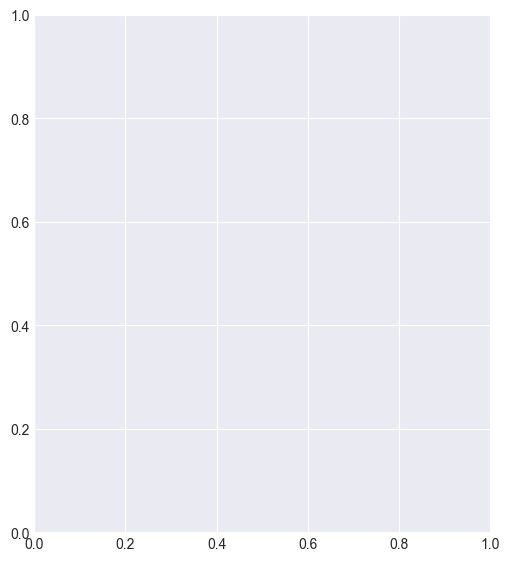

In [7]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Charger le shapefile
shapefile_path = r"C:\Users\DELL\Desktop\project_fire\data\raw\landcover\Fusion_Harmonisee"  # À adapter
gdf = gpd.read_file(shapefile_path)

print("="*80)
print("ANALYSE EXPLORATOIRE DU SHAPEFILE DE COUVERTURE TERRESTRE")
print("="*80)

# 1. INFORMATIONS GÉNÉRALES
print("\n1. INFORMATIONS GÉNÉRALES")
print("-"*50)

print(f"Nombre de polygones (features): {len(gdf):,}")
print(f"Nombre de colonnes: {len(gdf.columns)}")
print(f"Colonnes: {list(gdf.columns)}")
print(f"Système de coordonnées (CRS): {gdf.crs}")
print(f"Types de géométrie: {gdf.geometry.type.unique()}")
print(f"Emprise (bounds):")
print(f"  Min X (Ouest): {gdf.total_bounds[0]:.4f}")
print(f"  Min Y (Sud): {gdf.total_bounds[1]:.4f}")
print(f"  Max X (Est): {gdf.total_bounds[2]:.4f}")
print(f"  Max Y (Nord): {gdf.total_bounds[3]:.4f}")

# 2. ANALYSE DES COLONNES ATTRIBUTAIRES
print("\n\n2. ANALYSE DES ATTRIBUTS")
print("-"*50)

# Types de données
print("\nTypes de données:")
print(gdf.dtypes.to_string())

# Statistiques descriptives pour les colonnes numériques
numeric_cols = gdf.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nColonnes numériques: {numeric_cols}")

if numeric_cols:
    print("\nStatistiques descriptives:")
    stats_df = gdf[numeric_cols].describe().T
    stats_df['missing'] = gdf[numeric_cols].isnull().sum()
    stats_df['missing_pct'] = (stats_df['missing'] / len(gdf) * 100).round(2)
    print(stats_df.to_string())

# Analyse des colonnes catégorielles
categorical_cols = ['LCCCODE', 'LCCCode_1']  # Colonnes de code de couverture terrestre
categorical_cols = [col for col in categorical_cols if col in gdf.columns]

print("\n\n3. ANALYSE DES CODES DE COUVERTURE TERRESTRE")
print("-"*50)

for col in categorical_cols:
    if col in gdf.columns:
        print(f"\n{col}:")
        value_counts = gdf[col].value_counts(dropna=False)
        print(f"  Valeurs uniques: {gdf[col].nunique()}")
        print(f"  Valeurs manquantes: {gdf[col].isnull().sum()} ({gdf[col].isnull().sum()/len(gdf)*100:.1f}%)")
        
        print(f"\n  Top 10 des valeurs:")
        for val, count in value_counts.head(10).items():
            pct = count / len(gdf) * 100
            print(f"    {val}: {count:,} polygones ({pct:.1f}%)")

# 4. ANALYSE DE LA SURFACE (AREA)
print("\n\n4. ANALYSE DES SURFACES")
print("-"*50)

area_cols = ['AREA', 'AREA_M2']
for area_col in area_cols:
    if area_col in gdf.columns:
        print(f"\n{area_col}:")
        data = gdf[area_col].dropna()
        if len(data) > 0:
            print(f"  Min: {data.min():,.2f}")
            print(f"  Max: {data.max():,.2f}")
            print(f"  Moyenne: {data.mean():,.2f}")
            print(f"  Médiane: {data.median():,.2f}")
            print(f"  Écart-type: {data.std():,.2f}")
            print(f"  Somme totale: {data.sum():,.2f}")
            
            # Conversion en km² pour AREA_M2
            if area_col == 'AREA_M2':
                total_km2 = data.sum() / 1_000_000
                print(f"  Surface totale: {total_km2:,.2f} km²")

# 5. VISUALISATIONS
print("\n\n5. VISUALISATIONS")
print("-"*50)

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
fig = plt.figure(figsize=(20, 15))

# 5.1 Carte de la couverture terrestre
print("\nGénération de la carte...")
ax1 = plt.subplot(2, 3, 1)
if 'LCCCODE' in gdf.columns or 'LCCCode_1' in gdf.columns:
    col_to_plot = 'LCCCODE' if 'LCCCODE' in gdf.columns else 'LCCCode_1'
    gdf.plot(column=col_to_plot, ax=ax1, legend=True, 
             legend_kwds={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
             cmap='tab20', categorical=True)
    ax1.set_title(f'Carte de couverture terrestre ({col_to_plot})')
else:
    gdf.plot(ax=ax1, color='lightblue', edgecolor='black', linewidth=0.3)
    ax1.set_title('Carte des polygones')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# 5.2 Distribution des surfaces
print("Génération des histogrammes...")
ax2 = plt.subplot(2, 3, 2)
if 'AREA_M2' in gdf.columns:
    # Utiliser une échelle log pour mieux voir la distribution
    areas = gdf['AREA_M2'].dropna()
    ax2.hist(areas, bins=50, alpha=0.7, edgecolor='black', log=True)
    ax2.set_xlabel('Surface (m²)')
    ax2.set_ylabel('Fréquence (log)')
    ax2.set_title('Distribution des surfaces (échelle log)')
    ax2.grid(True, alpha=0.3)
    
    # Ajouter des lignes pour les percentiles
    for perc in [25, 50, 75, 95]:
        perc_val = np.percentile(areas, perc)
        ax2.axvline(perc_val, color='red', linestyle='--', alpha=0.5, linewidth=1)
        ax2.text(perc_val, ax2.get_ylim()[1]*0.9, f'{perc}%', 
                rotation=90, verticalalignment='top', fontsize=8)
else:
    ax2.text(0.5, 0.5, 'Pas de données de surface', 
            ha='center', va='center', transform=ax2.transAxes)

# 5.3 Top 10 des types de couverture
print("Génération du graphique des types de couverture...")
ax3 = plt.subplot(2, 3, 3)
if 'LCCCODE' in gdf.columns or 'LCCCode_1' in gdf.columns:
    col = 'LCCCODE' if 'LCCCODE' in gdf.columns else 'LCCCode_1'
    top_10 = gdf[col].value_counts().head(10)
    
    bars = ax3.barh(range(len(top_10)), top_10.values)
    ax3.set_yticks(range(len(top_10)))
    ax3.set_yticklabels(top_10.index)
    ax3.set_xlabel('Nombre de polygones')
    ax3.set_title(f'Top 10 - {col}')
    
    # Ajouter les valeurs sur les barres
    for i, (bar, count) in enumerate(zip(bars, top_10.values)):
        width = bar.get_width()
        ax3.text(width, bar.get_y() + bar.get_height()/2, 
                f'{count:,}', ha='left', va='center', fontsize=9)
else:
    ax3.text(0.5, 0.5, 'Pas de codes de couverture', 
            ha='center', va='center', transform=ax3.transAxes)

# 5.4 Relation surface vs code de couverture
print("Génération du boxplot...")
ax4 = plt.subplot(2, 3, 4)
if 'LCCCODE' in gdf.columns and 'AREA_M2' in gdf.columns:
    # Prendre les 10 codes les plus fréquents
    top_codes = gdf['LCCCODE'].value_counts().head(10).index
    filtered_gdf = gdf[gdf['LCCCODE'].isin(top_codes)]
    
    # Boxplot avec échelle log pour mieux voir
    data_to_plot = []
    labels = []
    for code in top_codes:
        areas = filtered_gdf[filtered_gdf['LCCCODE'] == code]['AREA_M2'].dropna()
        if len(areas) > 0:
            data_to_plot.append(areas)
            labels.append(str(code))
    
    bp = ax4.boxplot(data_to_plot, labels=labels, patch_artist=True)
    ax4.set_yscale('log')
    ax4.set_ylabel('Surface (m²) - échelle log')
    ax4.set_xlabel('Code de couverture')
    ax4.set_title('Distribution des surfaces par type de couverture')
    ax4.tick_params(axis='x', rotation=45)
    
    # Colorer les boxplots
    colors = plt.cm.Set3(np.linspace(0, 1, len(data_to_plot)))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
else:
    ax4.text(0.5, 0.5, 'Données insuffisantes\npour le boxplot', 
            ha='center', va='center', transform=ax4.transAxes)

# 5.5 Histogramme des GRIDCODE
print("Génération de l'histogramme GRIDCODE...")
ax5 = plt.subplot(2, 3, 5)
if 'GRIDCODE' in gdf.columns:
    gridcodes = gdf['GRIDCODE'].dropna()
    unique_gridcodes = gridcodes.nunique()
    
    if unique_gridcodes < 50:  # Si peu de valeurs uniques, histogramme normal
        ax5.hist(gridcodes, bins=min(30, unique_gridcodes), 
                alpha=0.7, edgecolor='black')
        ax5.set_xlabel('GRIDCODE')
    else:  # Sinon, utiliser plus de bins
        ax5.hist(gridcodes, bins=50, alpha=0.7, edgecolor='black')
        ax5.set_xlabel('GRIDCODE (50 bins)')
    
    ax5.set_ylabel('Fréquence')
    ax5.set_title(f'Distribution des GRIDCODE\n({unique_gridcodes} valeurs uniques)')
    ax5.grid(True, alpha=0.3)
else:
    ax5.text(0.5, 0.5, 'Pas de GRIDCODE', 
            ha='center', va='center', transform=ax5.transAxes)

# 5.6 Carte de densité des polygones
print("Génération de la carte de densité...")
ax6 = plt.subplot(2, 3, 6)
# Calculer le centroïde de chaque polygone
gdf['centroid'] = gdf.geometry.centroid
centroids = gpd.GeoDataFrame(geometry=gdf['centroid'])

# Créer une grille pour la densité
xmin, ymin, xmax, ymax = gdf.total_bounds
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

# Compter les centroïdes dans chaque cellule
from scipy.stats import gaussian_kde
if len(centroids) > 1:
    points = np.vstack([centroids.geometry.x.values, centroids.geometry.y.values])
    kde = gaussian_kde(points)
    
    # Évaluer la KDE sur la grille
    positions = np.vstack([xx.ravel(), yy.ravel()])
    z = np.reshape(kde(positions).T, xx.shape)
    
    im = ax6.imshow(z, extent=[xmin, xmax, ymin, ymax], 
                   origin='lower', cmap='hot_r', aspect='auto')
    ax6.set_title('Densité des polygones (KDE)')
    ax6.set_xlabel('Longitude')
    ax6.set_ylabel('Latitude')
    plt.colorbar(im, ax=ax6, label='Densité')
else:
    ax6.text(0.5, 0.5, 'Données insuffisantes\npour la densité', 
            ha='center', va='center', transform=ax6.transAxes)

plt.suptitle('ANALYSE EXPLORATOIRE DU SHAPEFILE DE COUVERTURE TERRESTRE', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 6. ANALYSE DES RELATIONS
print("\n\n6. ANALYSE DES RELATIONS ENTRE VARIABLES")
print("-"*50)

if len(numeric_cols) > 1:
    print("\nMatrice de corrélation:")
    corr_matrix = gdf[numeric_cols].corr()
    print(corr_matrix.round(3).to_string())
    
    # Heatmap de corrélation
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=0.5)
    plt.title('Matrice de corrélation des variables numériques')
    plt.tight_layout()
    plt.show()

# 7. ANALYSE SPATIALE AVANCÉE
print("\n\n7. ANALYSE SPATIALE")
print("-"*50)

print(f"Surface totale couverte: {gdf.area.sum() / 1_000_000:,.2f} km²")
print(f"Nombre moyen de vertices par polygone: {gdf.geometry.apply(lambda g: len(g.exterior.coords)).mean():.1f}")
print(f"Ratio de compacité moyen: {(gdf.area * 4 * np.pi / (gdf.geometry.length ** 2)).mean():.3f}")

# 8. QUALITÉ DES DONNÉES
print("\n\n8. QUALITÉ DES DONNÉES")
print("-"*50)

print("Vérification de la validité des géométries:")
print(f"  Géométries valides: {gdf.geometry.is_valid.all()}")
print(f"  Géométries vides: {gdf.geometry.is_empty.any()}")
print(f"  Géométries dupliquées: {gdf.geometry.duplicated().sum()}")

# Vérifier les polygones avec surface nulle ou négative
if 'AREA_M2' in gdf.columns:
    zero_area = (gdf['AREA_M2'] <= 0).sum()
    if zero_area > 0:
        print(f"  Polygones avec surface ≤ 0: {zero_area} ({zero_area/len(gdf)*100:.1f}%)")

# 9. RÉSUMÉ ET RECOMMANDATIONS
print("\n\n" + "="*80)
print("RÉSUMÉ ET RECOMMANDATIONS")
print("="*80)

print(f"\n📊 RÉSUMÉ DU DATASET:")
print(f"   • {len(gdf):,} polygones de couverture terrestre")
print(f"   • {len(numeric_cols)} variables numériques")
print(f"   • {len(categorical_cols)} variables catégorielles (codes de couverture)")

if 'AREA_M2' in gdf.columns:
    total_area_km2 = gdf['AREA_M2'].sum() / 1_000_000
    avg_area_km2 = gdf['AREA_M2'].mean() / 1_000_000
    print(f"   • Surface totale: {total_area_km2:,.2f} km²")
    print(f"   • Surface moyenne par polygone: {avg_area_km2:,.4f} km²")

print(f"\n🔍 PRINCIPALES OBSERVATIONS:")
if 'LCCCODE' in gdf.columns:
    top_code = gdf['LCCCODE'].mode().iloc[0] if not gdf['LCCCODE'].mode().empty else 'N/A'
    top_count = gdf['LCCCODE'].value_counts().iloc[0] if not gdf['LCCCODE'].value_counts().empty else 0
    top_pct = top_count / len(gdf) * 100
    print(f"   • Code de couverture le plus fréquent: {top_code} ({top_pct:.1f}%)")

if 'AREA_M2' in gdf.columns:
    area_std = gdf['AREA_M2'].std() / 1_000_000
    print(f"   • Forte variabilité des surfaces (σ = {area_std:,.2f} km²)")

print(f"\n💡 RECOMMANDATIONS POUR LE TRAITEMENT:")
print("   1. Standardiser les codes de couverture (LCCCODE et LCCCode_1)")
print("   2. Vérifier la cohérence entre AREA et AREA_M2")
print("   3. Nettoyer les géométries invalides si présentes")
print("   4. Considérer l'agrégation des petits polygones")
print("   5. Préparer une légende/clé d'interprétation pour les codes LCC")
print("   6. Vérifier les unités de mesure pour les surfaces")

print(f"\n📈 ÉTAPES SUIVANTES SUGGÉRÉES:")
print("   1. Jointure spatiale avec les données d'incendie")
print("   2. Calcul des statistiques par type de couverture")
print("   3. Création d'indicateurs de fragmentation paysagère")
print("   4. Analyse de la relation couverture/risque d'incendie")

# Sauvegarder un résumé statistique
output_path = Path(fusion_path) / "analyse_statistique.csv"
stats_summary = gdf[numeric_cols].describe().T
stats_summary.to_csv(output_path)
print(f"\n✅ Résumé statistique sauvegardé: {output_path}")

ANALYSE EXPLORATOIRE DU SHAPEFILE DE COUVERTURE TERRESTRE

1. INFORMATIONS GÉNÉRALES
--------------------------------------------------
Nombre de polygones (features): 438,513
Nombre de colonnes: 5
Colonnes: ['ID', 'GRIDCODE', 'AREA_M2', 'LCCCODE', 'geometry']
Système de coordonnées (CRS): EPSG:4326
Types de géométrie: ['Polygon']
Emprise (bounds):
  Min X (Ouest): -8.6739
  Min Y (Sud): 18.9600
  Max X (Est): 11.9795
  Max Y (Nord): 37.5439


2. ANALYSE DES ATTRIBUTS
--------------------------------------------------

Types de données:
ID             int32
GRIDCODE       int32
AREA_M2      float64
LCCCODE       object
geometry    geometry

Colonnes numériques: ['ID', 'GRIDCODE', 'AREA_M2']

Statistiques descriptives:
             count          mean           std       min        25%        50%        75%           max  missing  missing_pct
ID        438513.0  1.733783e+05  1.179816e+05       1.0   57570.00  167198.00  276826.00  3.864540e+05        0          0.0
GRIDCODE  438513.0  

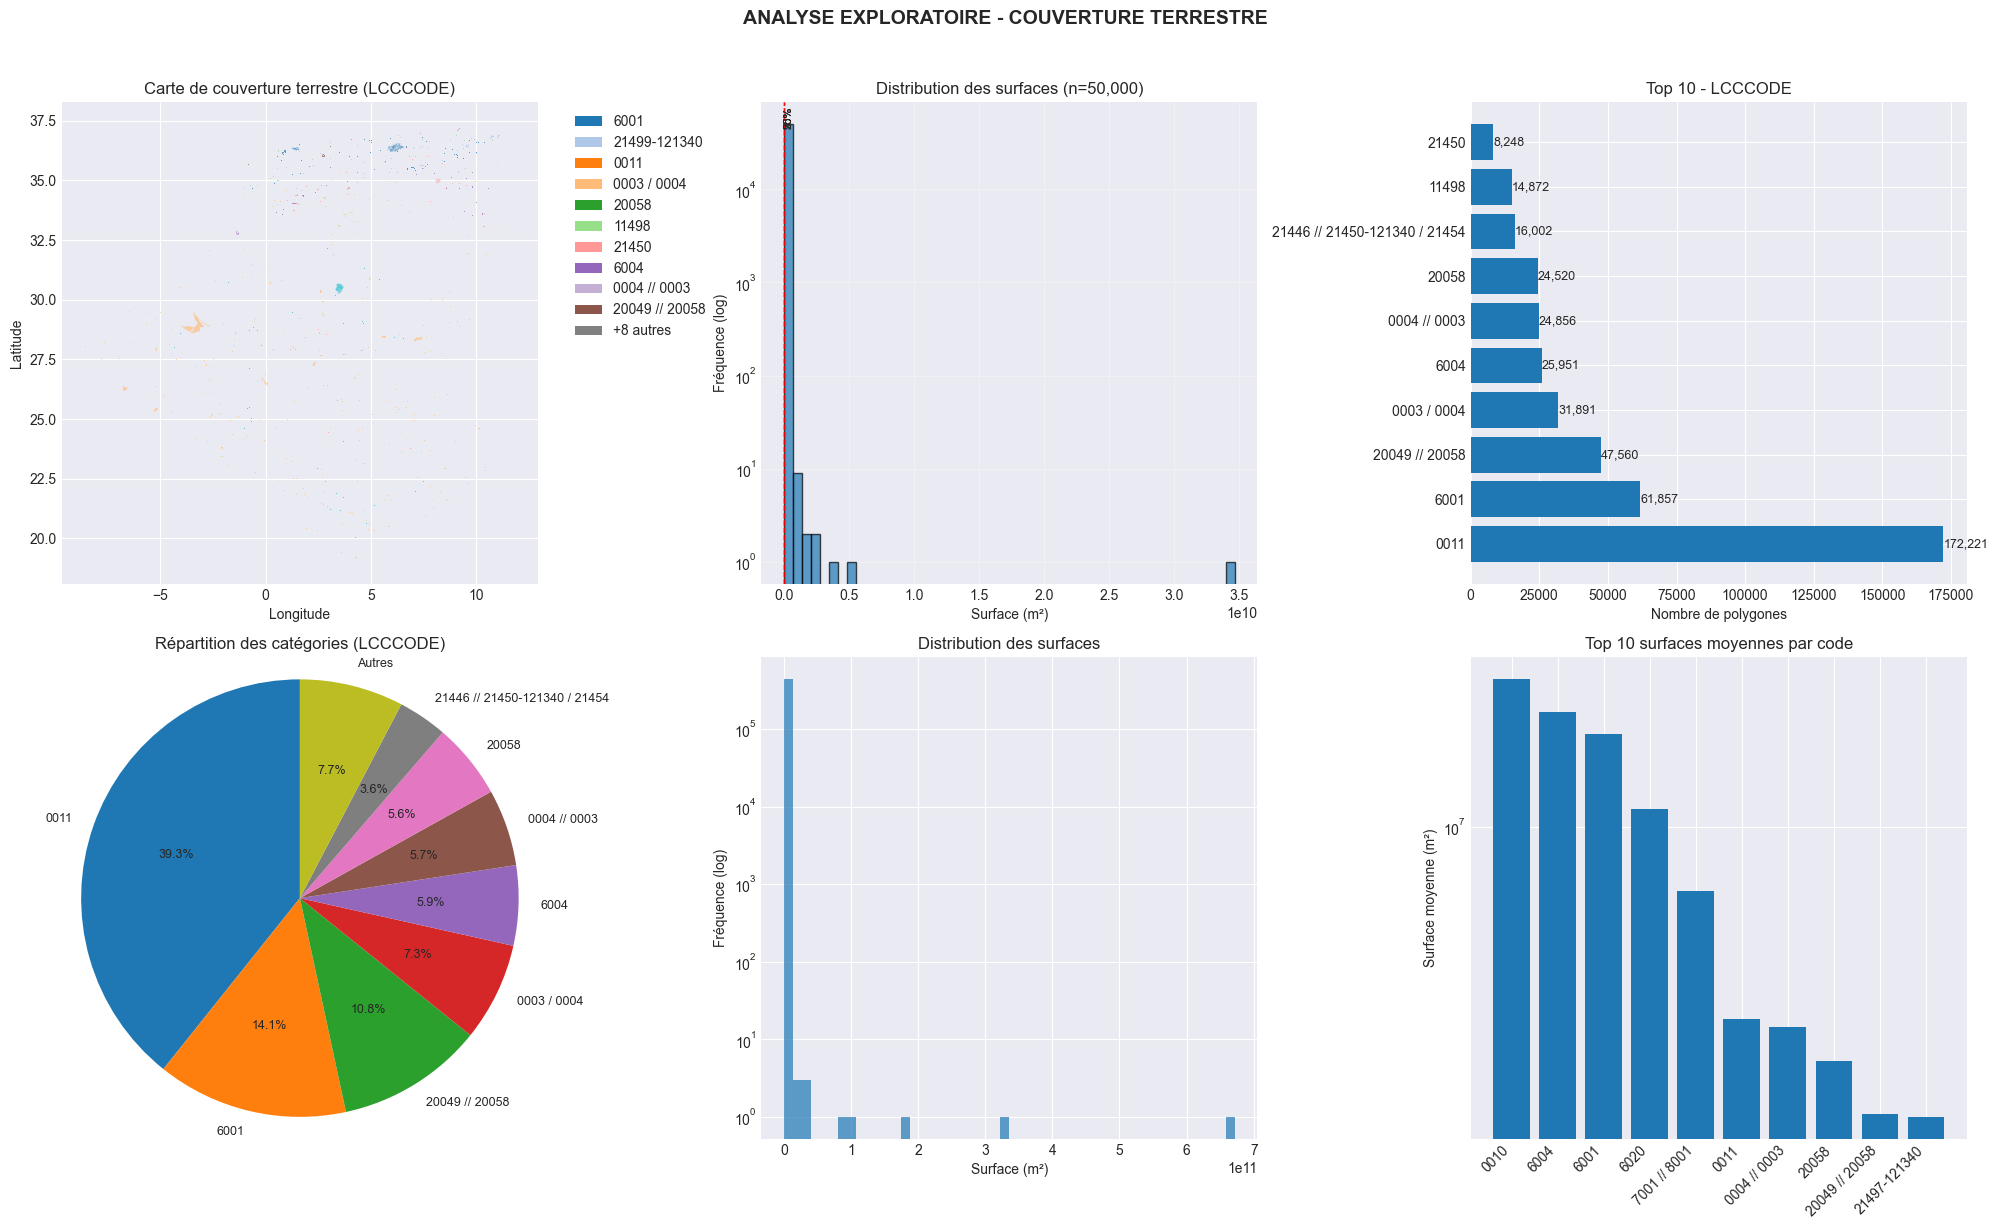



6. ANALYSE DES RELATIONS ENTRE VARIABLES
--------------------------------------------------

Matrice de corrélation:
             ID  GRIDCODE  AREA_M2
ID        1.000     0.671   -0.004
GRIDCODE  0.671     1.000    0.005
AREA_M2  -0.004     0.005    1.000


RÉSUMÉ ET RECOMMANDATIONS

📊 RÉSUMÉ DU DATASET:
   • 438,513 polygones de couverture terrestre
   • 3 variables numériques
   • 1 variables catégorielles
   • Surface totale: 2,471,735.43 km²
   • 22 codes de couverture uniques

💡 RECOMMANDATIONS POUR LES GRANDS DATASETS:
   1. Utiliser l'échantillonnage pour la visualisation
   2. Regrouper les catégories rares en 'Autres'
   3. Désactiver les légendes automatiques pour les cartes
   4. Utiliser des échelles logarithmiques pour les distributions
   5. Considérer l'agrégation géométrique des petits polygones

✅ Résumé sauvegardé: C:\Users\DELL\Desktop\project_fire\data\raw\landcover\resume_statistique.csv


In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Charger le shapefile
shapefile_path = r"C:\Users\DELL\Desktop\project_fire\data\raw\landcover\Fusion_Harmonisee"  # À adapter
gdf = gpd.read_file(shapefile_path)

print("="*80)
print("ANALYSE EXPLORATOIRE DU SHAPEFILE DE COUVERTURE TERRESTRE")
print("="*80)

# 1. INFORMATIONS GÉNÉRALES
print("\n1. INFORMATIONS GÉNÉRALES")
print("-"*50)

print(f"Nombre de polygones (features): {len(gdf):,}")
print(f"Nombre de colonnes: {len(gdf.columns)}")
print(f"Colonnes: {list(gdf.columns)}")
print(f"Système de coordonnées (CRS): {gdf.crs}")
print(f"Types de géométrie: {gdf.geometry.type.unique()}")
print(f"Emprise (bounds):")
print(f"  Min X (Ouest): {gdf.total_bounds[0]:.4f}")
print(f"  Min Y (Sud): {gdf.total_bounds[1]:.4f}")
print(f"  Max X (Est): {gdf.total_bounds[2]:.4f}")
print(f"  Max Y (Nord): {gdf.total_bounds[3]:.4f}")

# 2. ANALYSE DES COLONNES ATTRIBUTAIRES
print("\n\n2. ANALYSE DES ATTRIBUTS")
print("-"*50)

# Types de données
print("\nTypes de données:")
print(gdf.dtypes.to_string())

# Statistiques descriptives pour les colonnes numériques
numeric_cols = gdf.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nColonnes numériques: {numeric_cols}")

if numeric_cols:
    print("\nStatistiques descriptives:")
    stats_df = gdf[numeric_cols].describe().T
    stats_df['missing'] = gdf[numeric_cols].isnull().sum()
    stats_df['missing_pct'] = (stats_df['missing'] / len(gdf) * 100).round(2)
    print(stats_df.to_string())

# Analyse des colonnes catégorielles
categorical_cols = ['LCCCODE', 'LCCCode_1']  # Colonnes de code de couverture terrestre
categorical_cols = [col for col in categorical_cols if col in gdf.columns]

print("\n\n3. ANALYSE DES CODES DE COUVERTURE TERRESTRE")
print("-"*50)

for col in categorical_cols:
    if col in gdf.columns:
        print(f"\n{col}:")
        value_counts = gdf[col].value_counts(dropna=False)
        print(f"  Valeurs uniques: {gdf[col].nunique()}")
        print(f"  Valeurs manquantes: {gdf[col].isnull().sum()} ({gdf[col].isnull().sum()/len(gdf)*100:.1f}%)")
        
        print(f"\n  Top 10 des valeurs:")
        for val, count in value_counts.head(10).items():
            pct = count / len(gdf) * 100
            print(f"    {val}: {count:,} polygones ({pct:.1f}%)")

# 4. ANALYSE DE LA SURFACE (AREA)
print("\n\n4. ANALYSE DES SURFACES")
print("-"*50)

area_cols = ['AREA', 'AREA_M2']
for area_col in area_cols:
    if area_col in gdf.columns:
        print(f"\n{area_col}:")
        data = gdf[area_col].dropna()
        if len(data) > 0:
            print(f"  Min: {data.min():,.2f}")
            print(f"  Max: {data.max():,.2f}")
            print(f"  Moyenne: {data.mean():,.2f}")
            print(f"  Médiane: {data.median():,.2f}")
            print(f"  Écart-type: {data.std():,.2f}")
            print(f"  Somme totale: {data.sum():,.2f}")
            
            # Conversion en km² pour AREA_M2
            if area_col == 'AREA_M2':
                total_km2 = data.sum() / 1_000_000
                print(f"  Surface totale: {total_km2:,.2f} km²")

# 5. VISUALISATIONS (OPTIMISÉES POUR GRANDS DATASETS)
print("\n\n5. VISUALISATIONS OPTIMISÉES")
print("-"*50)

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
fig = plt.figure(figsize=(20, 12))

# 5.1 Carte SIMPLIFIÉE (sans légende pour éviter MemoryError)
print("Génération de la carte simplifiée...")
ax1 = plt.subplot(2, 3, 1)

# ÉCHANTILLONNER pour les grands datasets (> 10,000 polygones)
if len(gdf) > 10000:
    sample_size = 10000
    gdf_sample = gdf.sample(n=min(sample_size, len(gdf)), random_state=42)
    print(f"  Note: Affichage d'un échantillon de {len(gdf_sample):,} polygones sur {len(gdf):,}")
else:
    gdf_sample = gdf

if 'LCCCODE' in gdf.columns or 'LCCCode_1' in gdf.columns:
    col_to_plot = 'LCCCODE' if 'LCCCODE' in gdf.columns else 'LCCCode_1'
    
    # Regrouper les catégories rares en "Autres"
    value_counts = gdf_sample[col_to_plot].value_counts()
    if len(value_counts) > 20:  # Si trop de catégories
        top_categories = value_counts.head(15).index
        gdf_sample = gdf_sample.copy()
        gdf_sample[col_to_plot] = gdf_sample[col_to_plot].apply(
            lambda x: x if x in top_categories else 'Autres'
        )
        print(f"  Regroupement: {len(value_counts)} catégories → 16 catégories (15 top + Autres)")
    
    # Tracer sans légende dans la carte
    gdf_sample.plot(column=col_to_plot, ax=ax1, legend=False, 
                   cmap='tab20', categorical=True, alpha=0.7)
    ax1.set_title(f'Carte de couverture terrestre ({col_to_plot})')
    
    # Créer une légende séparée
    from matplotlib.patches import Patch
    unique_values = gdf_sample[col_to_plot].unique()
    colors = plt.cm.tab20(np.linspace(0, 1, len(unique_values)))
    legend_elements = [Patch(facecolor=colors[i], label=str(val)) 
                      for i, val in enumerate(unique_values[:10])]  # Limiter à 10
    if len(unique_values) > 10:
        legend_elements.append(Patch(facecolor='gray', label=f'+{len(unique_values)-10} autres'))
    
    ax1.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))
else:
    gdf_sample.plot(ax=ax1, color='lightblue', edgecolor='black', linewidth=0.1, alpha=0.5)
    ax1.set_title('Carte des polygones')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# 5.2 Distribution des surfaces
print("Génération des histogrammes...")
ax2 = plt.subplot(2, 3, 2)
if 'AREA_M2' in gdf.columns:
    # Utiliser un échantillon pour les grands datasets
    if len(gdf) > 100000:
        areas_sample = gdf['AREA_M2'].dropna().sample(n=50000, random_state=42)
    else:
        areas_sample = gdf['AREA_M2'].dropna()
    
    # Utiliser une échelle log pour mieux voir la distribution
    ax2.hist(areas_sample, bins=50, alpha=0.7, edgecolor='black', log=True)
    ax2.set_xlabel('Surface (m²)')
    ax2.set_ylabel('Fréquence (log)')
    ax2.set_title(f'Distribution des surfaces (n={len(areas_sample):,})')
    ax2.grid(True, alpha=0.3)
    
    # Ajouter des lignes pour les percentiles
    for perc in [25, 50, 75, 95]:
        perc_val = np.percentile(areas_sample, perc)
        ax2.axvline(perc_val, color='red', linestyle='--', alpha=0.5, linewidth=1)
        ax2.text(perc_val, ax2.get_ylim()[1]*0.9, f'{perc}%', 
                rotation=90, verticalalignment='top', fontsize=8)
else:
    ax2.text(0.5, 0.5, 'Pas de données de surface', 
            ha='center', va='center', transform=ax2.transAxes)

# 5.3 Top 10 des types de couverture (BAR CHART HORIZONTAL)
print("Génération du graphique des types de couverture...")
ax3 = plt.subplot(2, 3, 3)
if 'LCCCODE' in gdf.columns or 'LCCCode_1' in gdf.columns:
    col = 'LCCCODE' if 'LCCCODE' in gdf.columns else 'LCCCode_1'
    top_10 = gdf[col].value_counts().head(10)
    
    bars = ax3.barh(range(len(top_10)), top_10.values)
    ax3.set_yticks(range(len(top_10)))
    ax3.set_yticklabels([str(x) for x in top_10.index])
    ax3.set_xlabel('Nombre de polygones')
    ax3.set_title(f'Top 10 - {col}')
    
    # Ajouter les valeurs sur les barres
    for i, (bar, count) in enumerate(zip(bars, top_10.values)):
        width = bar.get_width()
        ax3.text(width, bar.get_y() + bar.get_height()/2, 
                f'{count:,}', ha='left', va='center', fontsize=9)
else:
    ax3.text(0.5, 0.5, 'Pas de codes de couverture', 
            ha='center', va='center', transform=ax3.transAxes)

# 5.4 PIE CHART des principales catégories
print("Génération du camembert...")
ax4 = plt.subplot(2, 3, 4)
if 'LCCCODE' in gdf.columns or 'LCCCode_1' in gdf.columns:
    col = 'LCCCODE' if 'LCCCODE' in gdf.columns else 'LCCCode_1'
    value_counts = gdf[col].value_counts()
    
    # Prendre les top 8 et regrouper le reste
    if len(value_counts) > 8:
        top_8 = value_counts.head(8)
        other = value_counts.iloc[8:].sum()
        top_8['Autres'] = other
    else:
        top_8 = value_counts
    
    # Créer le pie chart
    wedges, texts, autotexts = ax4.pie(top_8.values, labels=top_8.index, 
                                      autopct='%1.1f%%', startangle=90,
                                      textprops={'fontsize': 9})
    ax4.set_title(f'Répartition des catégories ({col})')
    ax4.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
else:
    ax4.text(0.5, 0.5, 'Pas de codes de couverture', 
            ha='center', va='center', transform=ax4.transAxes)

# 5.5 Scatter plot de la surface vs code (si peu de catégories)
print("Génération du scatter plot...")
ax5 = plt.subplot(2, 3, 5)
if 'LCCCODE' in gdf.columns and 'AREA_M2' in gdf.columns and gdf['LCCCODE'].nunique() < 20:
    # Échantillonner pour éviter la surcharge
    if len(gdf) > 10000:
        plot_sample = gdf.sample(n=10000, random_state=42)
    else:
        plot_sample = gdf
    
    # Créer un scatter plot avec jitter
    unique_codes = plot_sample['LCCCODE'].unique()
    y_positions = {code: i for i, code in enumerate(unique_codes)}
    
    # Ajouter un peu de bruit sur l'axe y pour éviter le chevauchement
    y_jitter = np.random.normal(0, 0.1, len(plot_sample))
    
    scatter = ax5.scatter(plot_sample['AREA_M2'], 
                         [y_positions[code] for code in plot_sample['LCCCODE']] + y_jitter,
                         alpha=0.3, s=10)
    
    ax5.set_yticks(range(len(unique_codes)))
    ax5.set_yticklabels([str(code) for code in unique_codes])
    ax5.set_xlabel('Surface (m²)')
    ax5.set_ylabel('Code LCC')
    ax5.set_title('Distribution des surfaces par code')
    ax5.set_xscale('log')  # Échelle log pour mieux voir
    ax5.grid(True, alpha=0.3)
else:
    if 'AREA_M2' in gdf.columns:
        # Sinon, juste un histogramme des surfaces
        ax5.hist(gdf['AREA_M2'].dropna(), bins=50, alpha=0.7, log=True)
        ax5.set_xlabel('Surface (m²)')
        ax5.set_ylabel('Fréquence (log)')
        ax5.set_title('Distribution des surfaces')
    else:
        ax5.text(0.5, 0.5, 'Données insuffisantes', 
                ha='center', va='center', transform=ax5.transAxes)

# 5.6 Heatmap de la densité par code et taille
print("Génération de la heatmap...")
ax6 = plt.subplot(2, 3, 6)
if 'LCCCODE' in gdf.columns and 'AREA_M2' in gdf.columns and gdf['LCCCODE'].nunique() < 15:
    # Créer des bins pour les surfaces
    gdf_copy = gdf.copy()
    gdf_copy['area_bin'] = pd.qcut(gdf_copy['AREA_M2'], q=10, duplicates='drop')
    
    # Créer une table de contingence
    contingency = pd.crosstab(gdf_copy['LCCCODE'], gdf_copy['area_bin'])
    
    # Heatmap
    im = ax6.imshow(contingency.values, aspect='auto', cmap='YlOrRd')
    ax6.set_xticks(range(len(contingency.columns)))
    ax6.set_xticklabels([str(col) for col in contingency.columns], rotation=45, ha='right')
    ax6.set_yticks(range(len(contingency.index)))
    ax6.set_yticklabels([str(idx) for idx in contingency.index])
    ax6.set_xlabel('Bins de surface')
    ax6.set_ylabel('Code LCC')
    ax6.set_title('Densité: Code vs Surface')
    plt.colorbar(im, ax=ax6, label='Nombre de polygones')
else:
    # Alternative: simple bar chart des surfaces moyennes
    if 'LCCCODE' in gdf.columns and 'AREA_M2' in gdf.columns:
        avg_area = gdf.groupby('LCCCODE')['AREA_M2'].mean()
        top_10_avg = avg_area.nlargest(10)
        
        bars = ax6.bar(range(len(top_10_avg)), top_10_avg.values)
        ax6.set_xticks(range(len(top_10_avg)))
        ax6.set_xticklabels([str(x) for x in top_10_avg.index], rotation=45, ha='right')
        ax6.set_ylabel('Surface moyenne (m²)')
        ax6.set_title('Top 10 surfaces moyennes par code')
        ax6.set_yscale('log')
    else:
        ax6.text(0.5, 0.5, 'Données insuffisantes\npour la heatmap', 
                ha='center', va='center', transform=ax6.transAxes)

plt.suptitle('ANALYSE EXPLORATOIRE - COUVERTURE TERRESTRE', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 6. ANALYSE DES RELATIONS (sans plot si trop de données)
print("\n\n6. ANALYSE DES RELATIONS ENTRE VARIABLES")
print("-"*50)

if len(numeric_cols) > 1:
    print("\nMatrice de corrélation:")
    # Échantillonner pour le calcul de corrélation si gros dataset
    if len(gdf) > 100000:
        corr_sample = gdf[numeric_cols].sample(n=50000, random_state=42)
        corr_matrix = corr_sample.corr()
    else:
        corr_matrix = gdf[numeric_cols].corr()
    
    print(corr_matrix.round(3).to_string())

# 7. RÉSUMÉ ET RECOMMANDATIONS
print("\n\n" + "="*80)
print("RÉSUMÉ ET RECOMMANDATIONS")
print("="*80)

print(f"\n📊 RÉSUMÉ DU DATASET:")
print(f"   • {len(gdf):,} polygones de couverture terrestre")
print(f"   • {len(numeric_cols)} variables numériques")
print(f"   • {len(categorical_cols)} variables catégorielles")

if 'AREA_M2' in gdf.columns:
    total_area_km2 = gdf['AREA_M2'].sum() / 1_000_000
    print(f"   • Surface totale: {total_area_km2:,.2f} km²")

if 'LCCCODE' in gdf.columns:
    unique_codes = gdf['LCCCODE'].nunique()
    print(f"   • {unique_codes} codes de couverture uniques")

print(f"\n💡 RECOMMANDATIONS POUR LES GRANDS DATASETS:")
print("   1. Utiliser l'échantillonnage pour la visualisation")
print("   2. Regrouper les catégories rares en 'Autres'")
print("   3. Désactiver les légendes automatiques pour les cartes")
print("   4. Utiliser des échelles logarithmiques pour les distributions")
print("   5. Considérer l'agrégation géométrique des petits polygones")

# Sauvegarder un résumé statistique
output_path = Path(shapefile_path).parent / "resume_statistique.csv"
summary_data = {
    'Statistique': ['Nombre_polygones', 'Surface_totale_km2', 'Codes_uniques'],
    'Valeur': [len(gdf), 
               gdf['AREA_M2'].sum() / 1_000_000 if 'AREA_M2' in gdf.columns else 'NA',
               gdf['LCCCODE'].nunique() if 'LCCCODE' in gdf.columns else 'NA']
}
summary_df = pd.DataFrame(summary_data)
summary_df.to_csv(output_path, index=False)
print(f"\n✅ Résumé sauvegardé: {output_path}")

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le shapefile
shapefile_path = r"C:\Users\DELL\Desktop\project_fire\data\raw\landcover\Fusion_Harmonisee"
gdf = gpd.read_file(shapefile_path)

print(f"✅ Shapefile chargé: {len(gdf)} features")

# Afficher les colonnes pour vérification
print("\nColonnes disponibles:")
print(gdf.columns.tolist())
print(f"\nTypes de données:")
print(gdf.dtypes)

# ANALYSE DE CORRÉLATION
print("\n" + "="*60)
print("ANALYSE DE CORRÉLATION")
print("="*60)

# Sélectionner seulement les colonnes numériques pertinentes
# Basé sur ton output: ['ID', 'GRIDCODE', 'AREA', 'LCCCODE', 'AREA_M2', 'LCCCode_1', 'geometry']
numeric_cols_to_analyze = ['ID', 'GRIDCODE', 'AREA', 'AREA_M2']
numeric_cols_to_analyze = [col for col in numeric_cols_to_analyze if col in gdf.columns]

print(f"\nColonnes numériques sélectionnées pour l'analyse:")
print(numeric_cols_to_analyze)

if len(numeric_cols_to_analyze) > 1:
    # 1. Matrice de corrélation
    corr_matrix = gdf[numeric_cols_to_analyze].corr()
    
    print("\n📊 MATRICE DE CORRÉLATION:")
    print(corr_matrix.round(3).to_string())
    
    # 2. Visualisation
    plt.figure(figsize=(8, 6))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True,
                fmt='.2f',
                cmap='coolwarm',
                center=0,
                square=True,
                linewidths=0.5)
    
    plt.title('Matrice de corrélation - Couverture terrestre', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # 3. Scatter plots pour les corrélations intéressantes
    print("\n🎯 SCATTER PLOTS DES RELATIONS:")
    
    # Paires potentielles intéressantes
    potential_pairs = [
        ('AREA', 'AREA_M2'),      # Vérifier la cohérence entre les deux mesures de surface
        ('ID', 'GRIDCODE'),       # Relation entre identifiants
        ('GRIDCODE', 'AREA_M2'),  # Code de grille vs surface
    ]
    
    # Filtrer les paires qui existent
    valid_pairs = [(var1, var2) for var1, var2 in potential_pairs 
                   if var1 in numeric_cols_to_analyze and var2 in numeric_cols_to_analyze]
    
    if valid_pairs:
        # Créer une figure avec les scatter plots
        n_pairs = len(valid_pairs)
        fig, axes = plt.subplots(1, n_pairs, figsize=(5*n_pairs, 4))
        
        if n_pairs == 1:
            axes = [axes]
        
        for idx, (var1, var2) in enumerate(valid_pairs):
            ax = axes[idx]
            
            # Scatter plot
            ax.scatter(gdf[var1], gdf[var2], alpha=0.5, s=10)
            
            # Calculer la corrélation
            corr_value = gdf[[var1, var2]].corr().iloc[0, 1]
            
            # Personnalisation
            ax.set_xlabel(var1)
            ax.set_ylabel(var2)
            ax.set_title(f'{var1} vs {var2}\nr = {corr_value:.3f}')
            ax.grid(True, alpha=0.3)
        
        plt.suptitle('Relations entre variables numériques', fontsize=12, y=1.05)
        plt.tight_layout()
        plt.show()
    else:
        print("Aucune paire valide pour les scatter plots.")
    
    # 4. Pair plot simplifié
    print("\n🔄 PAIR PLOT SIMPLIFIÉ:")
    if len(numeric_cols_to_analyze) <= 5:  # Limiter à 5 variables max
        sns.pairplot(gdf[numeric_cols_to_analyze].dropna(), 
                    diag_kind='hist',
                    plot_kws={'alpha': 0.5, 's': 10})
        plt.suptitle('Analyse multivariée', y=1.02)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Trop de variables ({len(numeric_cols_to_analyze)}) pour une pair plot claire.")
        
        # À la place, montrer les 3 premières
        top_vars = numeric_cols_to_analyze[:3]
        sns.pairplot(gdf[top_vars].dropna(), 
                    diag_kind='hist',
                    plot_kws={'alpha': 0.5, 's': 10})
        plt.suptitle(f'Pair plot des 3 premières variables', y=1.02)
        plt.tight_layout()
        plt.show()
    
else:
    print(f"❌ Pas assez de variables numériques pour l'analyse de corrélation ({len(numeric_cols_to_analyze)} trouvées)")

ANALYSE DE CORRÉLATION ET SCATTER PLOTS

1. MATRICE DE CORRÉLATION
----------------------------------------


NameError: name 'df' is not defined

In [48]:
import pandas as pd

soil_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\soil\soil_D1_Algeria_Tunisia.csv"
soil_D1 = pd.read_csv(soil_path)

print(" Dataset chargé !")
print("Dimensions :", soil_D1.shape)
soil_D1.head()


 Dataset chargé !
Dimensions : (864, 24)


HWSD2_SMU_ID LAYER  COARSE  SAND  SILT  CLAY  TEXTURE_USDA TEXTURE_SOTER  \
0         31816    D1      11    40    41    19           9.0             M   
1         31801    D1      11    40    41    19           9.0             M   
2         31802    D1      11    40    41    19           9.0             M   
3          1694    D1       7    89     5     6          12.0             C   
4         32050    D1       9    88     6     6          12.0             C   

   BULK  REF_BULK  ...  CEC_SOIL  CEC_CLAY  CEC_EFF   TEB  BSAT  ALUM_SAT  \
0  1.47      1.69  ...        11        26      6.0   5.0    47        21   
1  1.47      1.69  ...        11        26      6.0   5.0    47        21   
2  1.47      1.69  ...        11        26      6.0   5.0    47        21   
3  1.39      1.34  ...         4        47      5.0   4.0    89         0   
4  1.62      1.34  ...         5        52     12.0  12.0   100         0   

   ESP  TCARBON_EQ  GYPSUM  ELEC_COND  
0    1         0.0     0.1          0  
1    1         0.0     0.1          0  
2    1         0.0     0.1          0  
3    2         4.4     0.1          0  
4    2         5.8     0.1          0  

[5 rows x 24 columns]

In [49]:
print("Types des colonnes :")
print(soil_D1.dtypes)


Types des colonnes :
HWSD2_SMU_ID       int64
LAYER             object
COARSE             int64
SAND               int64
SILT               int64
CLAY               int64
TEXTURE_USDA     float64
TEXTURE_SOTER     object
BULK             float64
REF_BULK         float64
ORG_CARBON       float64
PH_WATER         float64
TOTAL_N          float64
CN_RATIO         float64
CEC_SOIL           int64
CEC_CLAY           int64
CEC_EFF          float64
TEB              float64
BSAT               int64
ALUM_SAT           int64
ESP                int64
TCARBON_EQ       float64
GYPSUM           float64
ELEC_COND          int64
dtype: object


In [50]:
for col in soil_D1.columns:
    print(f"{col}: {soil_D1[col].nunique()} valeurs uniques")


HWSD2_SMU_ID: 386 valeurs uniques
LAYER: 1 valeurs uniques
COARSE: 30 valeurs uniques
SAND: 49 valeurs uniques
SILT: 36 valeurs uniques
CLAY: 37 valeurs uniques
TEXTURE_USDA: 7 valeurs uniques
TEXTURE_SOTER: 4 valeurs uniques
BULK: 47 valeurs uniques
REF_BULK: 41 valeurs uniques
ORG_CARBON: 92 valeurs uniques
PH_WATER: 36 valeurs uniques
TOTAL_N: 75 valeurs uniques
CN_RATIO: 15 valeurs uniques
CEC_SOIL: 34 valeurs uniques
CEC_CLAY: 46 valeurs uniques
CEC_EFF: 52 valeurs uniques
TEB: 55 valeurs uniques
BSAT: 36 valeurs uniques
ALUM_SAT: 17 valeurs uniques
ESP: 24 valeurs uniques
TCARBON_EQ: 59 valeurs uniques
GYPSUM: 33 valeurs uniques
ELEC_COND: 11 valeurs uniques


In [51]:
print(soil_D1.isna().sum())


HWSD2_SMU_ID      0
LAYER             0
COARSE            0
SAND              0
SILT              0
CLAY              0
TEXTURE_USDA     19
TEXTURE_SOTER     0
BULK              0
REF_BULK         19
ORG_CARBON        0
PH_WATER          0
TOTAL_N           0
CN_RATIO          0
CEC_SOIL          0
CEC_CLAY          0
CEC_EFF           0
TEB               0
BSAT              0
ALUM_SAT          0
ESP               0
TCARBON_EQ        0
GYPSUM            0
ELEC_COND         0
dtype: int64


In [52]:
soil_D1.describe()


HWSD2_SMU_ID      COARSE        SAND        SILT        CLAY  \
count    864.000000  864.000000  864.000000  864.000000  864.000000   
mean   20122.166667   11.782407   46.959491   29.407407   21.197917   
std    14834.283098    9.994384   16.112135    9.071532   10.356292   
min       36.000000   -9.000000   -9.000000   -9.000000   -9.000000   
25%     1798.000000    4.000000   40.000000   26.000000   16.000000   
50%    31843.500000    9.000000   47.000000   30.000000   20.000000   
75%    31931.000000   18.000000   55.000000   36.000000   24.000000   
max    32050.000000   46.000000   90.000000   53.000000   55.000000   

       TEXTURE_USDA        BULK    REF_BULK  ORG_CARBON    PH_WATER  ...  \
count    845.000000  864.000000  845.000000  864.000000  864.000000  ...   
mean       8.965680    1.319225    1.714876    0.829334    7.451389  ...   
std        2.427138    0.779554    0.131907    0.967357    1.801042  ...   
min        3.000000   -9.000000    1.200000   -9.000000   -9.000000  ...   
25%        9.000000    1.370000    1.650000    0.589000    7.400000  ...   
50%        9.000000    1.435000    1.710000    0.697000    8.000000  ...   
75%       11.000000    1.470000    1.780000    1.071500    8.200000  ...   
max       12.000000    1.760000    2.040000    7.326000    8.600000  ...   

         CEC_SOIL    CEC_CLAY     CEC_EFF         TEB        BSAT    ALUM_SAT  \
count  864.000000  864.000000  864.000000  864.000000  864.000000  864.000000   
mean    15.340278   58.150463   36.104167   35.166667   91.375000    0.420139   
std      7.638862   17.191257   23.628121   24.214712   18.284874    3.390821   
min     -9.000000   -9.000000   -9.000000   -9.000000   -9.000000   -9.000000   
25%     13.000000   48.000000   23.000000   20.000000   93.000000    0.000000   
50%     14.000000   61.000000   31.000000   31.000000   99.000000    0.000000   
75%     17.000000   71.000000   38.000000   38.000000  100.000000    0.000000   
max     41.000000   83.000000  143.000000  143.000000  100.000000   40.000000   

              ESP  TCARBON_EQ      GYPSUM   ELEC_COND  
count  864.000000  864.000000  864.000000  864.000000  
mean     6.855324    9.080671    4.343171    2.108796  
std     13.791399    6.933790   10.981860    4.538208  
min     -9.000000   -9.000000   -9.000000   -9.000000  
25%      2.000000    4.350000    0.300000    1.000000  
50%      3.000000    8.900000    0.600000    1.000000  
75%      4.000000   12.900000    3.300000    1.000000  
max     67.000000   31.299999   57.599998   32.000000  

[8 rows x 22 columns]

In [53]:
numeric_cols = soil_D1.select_dtypes(include=["float64", "int64"]).columns
cat_cols = soil_D1.select_dtypes(include=["object"]).columns

print("Colonnes numériques :", numeric_cols)
print("Colonnes catégorielles :", cat_cols)


Colonnes numériques : Index(['HWSD2_SMU_ID', 'COARSE', 'SAND', 'SILT', 'CLAY', 'TEXTURE_USDA',
       'BULK', 'REF_BULK', 'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO',
       'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT', 'ALUM_SAT', 'ESP',
       'TCARBON_EQ', 'GYPSUM', 'ELEC_COND'],
      dtype='object')
Colonnes catégorielles : Index(['LAYER', 'TEXTURE_SOTER'], dtype='object')


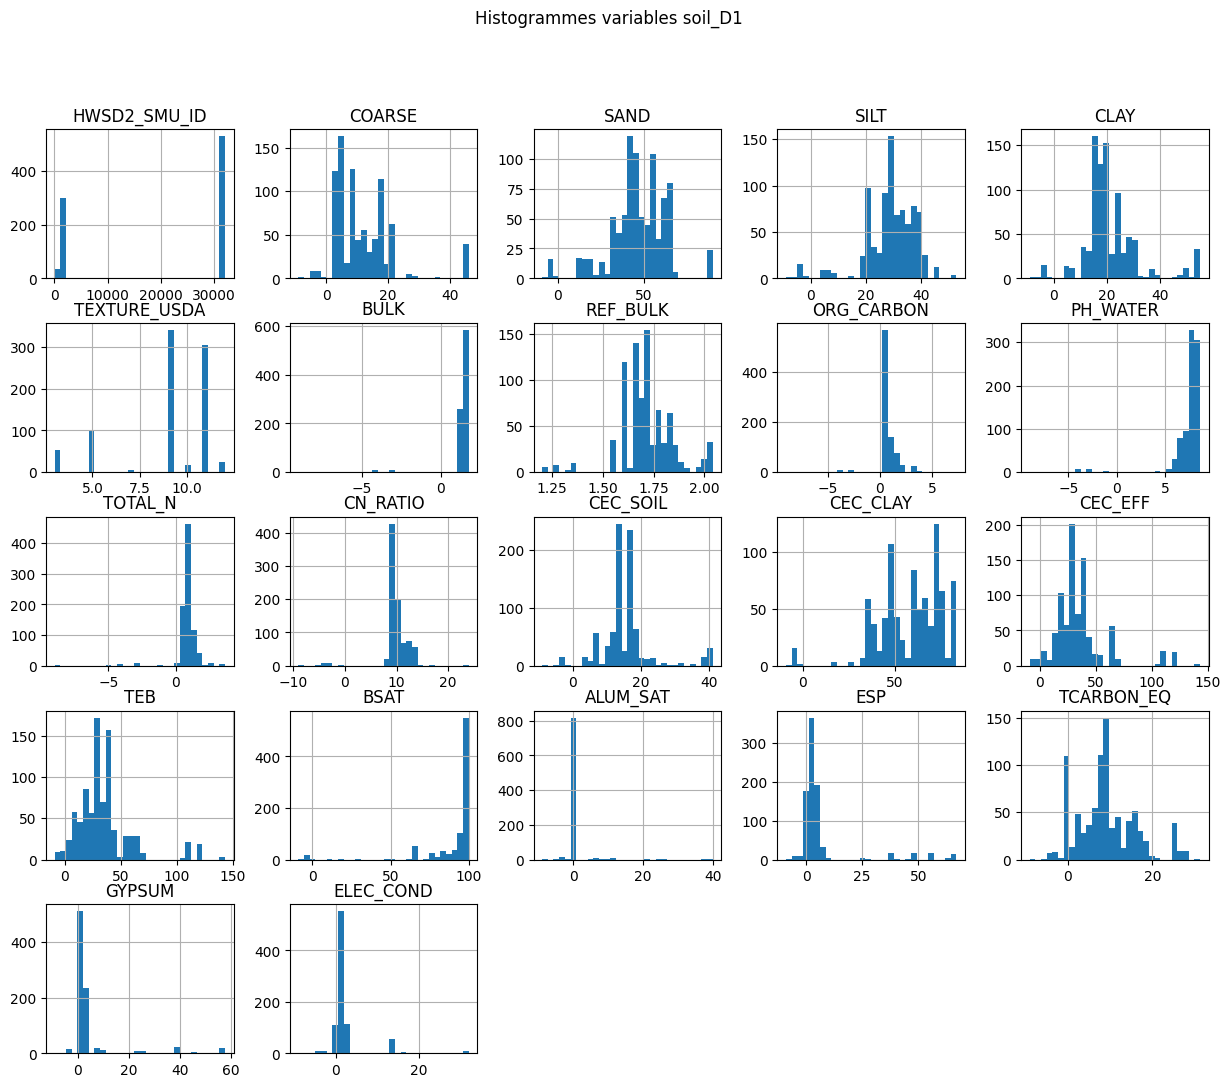

In [54]:
import matplotlib.pyplot as plt

soil_D1[numeric_cols].hist(figsize=(15,12), bins=30)
plt.suptitle("Histogrammes variables soil_D1")
plt.show()


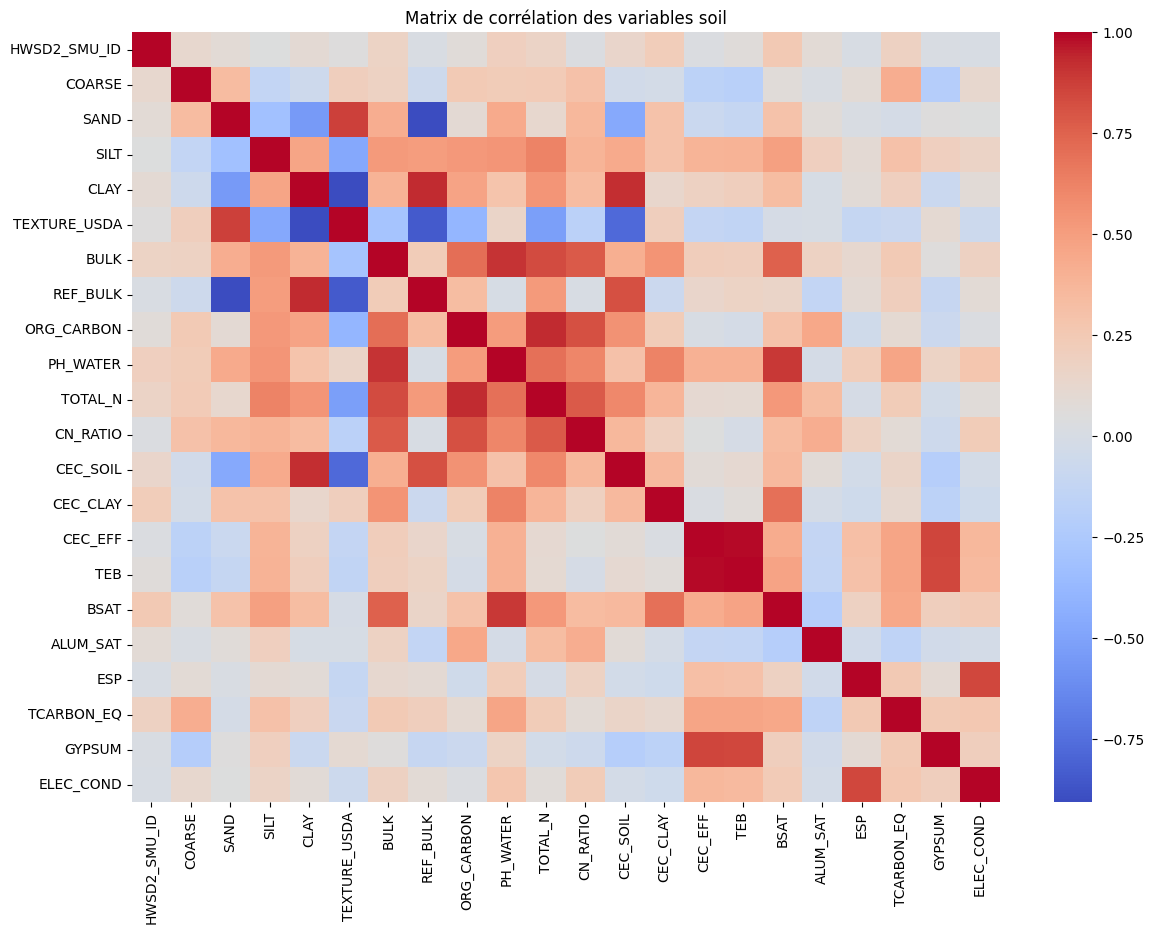

In [55]:
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(soil_D1[numeric_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Matrix de corrélation des variables soil")
plt.show()


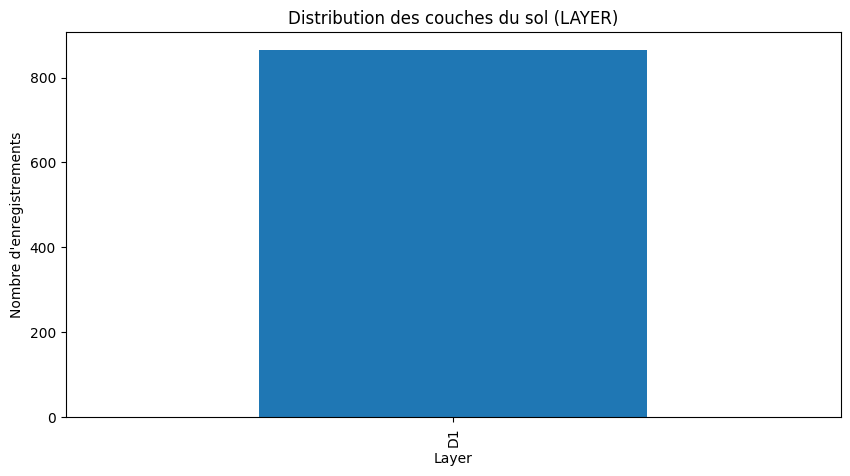

In [56]:
soil_D1["LAYER"].value_counts().plot(kind="bar", figsize=(10,5))
plt.title("Distribution des couches du sol (LAYER)")
plt.xlabel("Layer")
plt.ylabel("Nombre d'enregistrements")
plt.show()


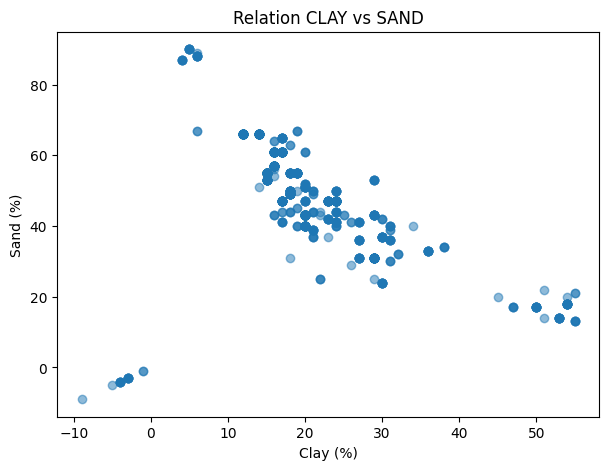

In [57]:
plt.figure(figsize=(7,5))
plt.scatter(soil_D1["CLAY"], soil_D1["SAND"], alpha=0.5)
plt.xlabel("Clay (%)")
plt.ylabel("Sand (%)")
plt.title("Relation CLAY vs SAND")
plt.show()


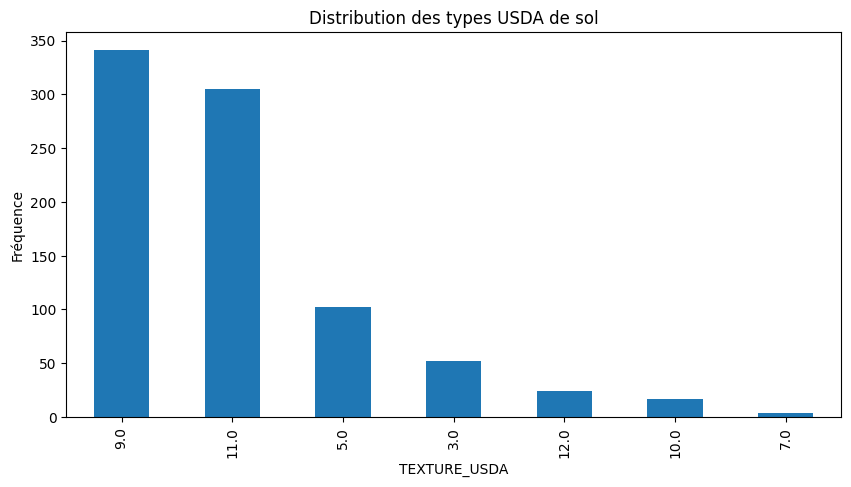

In [58]:
soil_D1["TEXTURE_USDA"].value_counts().plot(kind="bar", figsize=(10,5))
plt.title("Distribution des types USDA de sol")
plt.ylabel("Fréquence")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_7848\2717365179.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([soil_D1["CLAY"], soil_D1["SAND"], soil_D1["SILT"]], labels=["CLAY", "SAND", "SILT"])


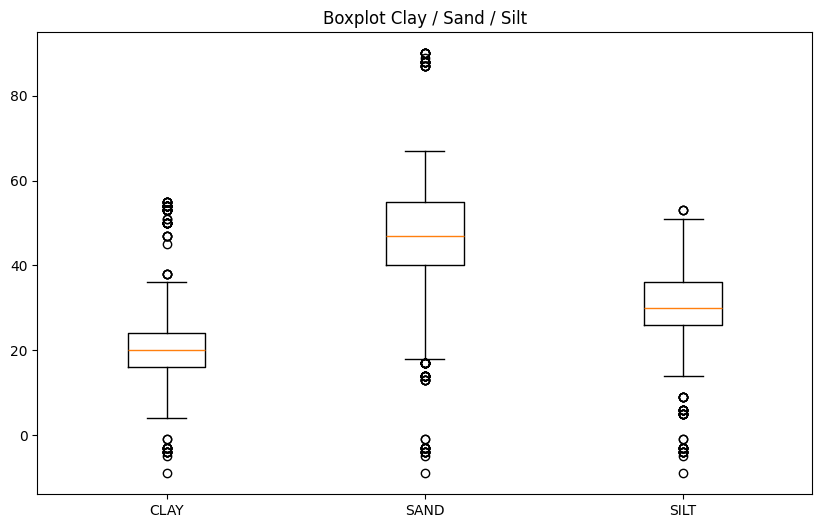

In [59]:
plt.figure(figsize=(10,6))
plt.boxplot([soil_D1["CLAY"], soil_D1["SAND"], soil_D1["SILT"]], labels=["CLAY", "SAND", "SILT"])
plt.title("Boxplot Clay / Sand / Silt")
plt.show()


In [60]:
soil_D1["total_texture"] = soil_D1["CLAY"] + soil_D1["SAND"] + soil_D1["SILT"]
print(soil_D1["total_texture"].describe())


count    864.000000
mean      97.564815
std       16.264912
min      -27.000000
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: total_texture, dtype: float64


In [62]:
import os
import rasterio
import numpy as np

folder = r"C:\Users\DELL\Desktop\project_fire\data\processed\climate_clipped"

# Liste de tous les fichiers .tif
files = [f for f in os.listdir(folder) if f.endswith(".tif")]

print("Fichiers trouvés :")
for f in files:
    print(" -", f)


Fichiers trouvés :
 - wc2.1_cruts4.09_5m_prec_2020-01.tif
 - wc2.1_cruts4.09_5m_prec_2020-02.tif
 - wc2.1_cruts4.09_5m_prec_2020-03.tif
 - wc2.1_cruts4.09_5m_prec_2020-04.tif
 - wc2.1_cruts4.09_5m_prec_2020-05.tif
 - wc2.1_cruts4.09_5m_prec_2020-06.tif
 - wc2.1_cruts4.09_5m_prec_2020-07.tif
 - wc2.1_cruts4.09_5m_prec_2020-08.tif
 - wc2.1_cruts4.09_5m_prec_2020-09.tif
 - wc2.1_cruts4.09_5m_prec_2020-10.tif
 - wc2.1_cruts4.09_5m_prec_2020-11.tif
 - wc2.1_cruts4.09_5m_prec_2020-12.tif
 - wc2.1_cruts4.09_5m_prec_2021-01.tif
 - wc2.1_cruts4.09_5m_prec_2021-02.tif
 - wc2.1_cruts4.09_5m_prec_2021-03.tif
 - wc2.1_cruts4.09_5m_prec_2021-04.tif
 - wc2.1_cruts4.09_5m_prec_2021-05.tif
 - wc2.1_cruts4.09_5m_prec_2021-06.tif
 - wc2.1_cruts4.09_5m_prec_2021-07.tif
 - wc2.1_cruts4.09_5m_prec_2021-08.tif
 - wc2.1_cruts4.09_5m_prec_2021-09.tif
 - wc2.1_cruts4.09_5m_prec_2021-10.tif
 - wc2.1_cruts4.09_5m_prec_2021-11.tif
 - wc2.1_cruts4.09_5m_prec_2021-12.tif
 - wc2.1_cruts4.09_5m_prec_2022-01.tif
 - wc2

In [63]:
stats = {}

for f in files:
    path = os.path.join(folder, f)
    with rasterio.open(path) as src:
        data = src.read(1).astype(float)
        nodata = src.nodata
        
    if nodata is not None:
        data[data == nodata] = np.nan
    
    stats[f] = {
        "min": np.nanmin(data),
        "max": np.nanmax(data),
        "mean": np.nanmean(data),
        "std": np.nanstd(data),
        "nan_count": np.isnan(data).sum(),
        "width": data.shape[1],
        "height": data.shape[0]
    }

stats


{'wc2.1_cruts4.09_5m_prec_2020-01.tif': {'min': np.float64(0.0),
  'max': np.float64(129.9499969482422),
  'mean': np.float64(5.988717686719943),
  'std': np.float64(12.29270595831586),
  'nan_count': np.int64(22985),
  'width': 249,
  'height': 224},
 'wc2.1_cruts4.09_5m_prec_2020-02.tif': {'min': np.float64(0.0),
  'max': np.float64(72.94999694824219),
  'mean': np.float64(2.1743877894240518),
  'std': np.float64(5.043348979215854),
  'nan_count': np.int64(22985),
  'width': 249,
  'height': 224},
 'wc2.1_cruts4.09_5m_prec_2020-03.tif': {'min': np.float64(0.0),
  'max': np.float64(221.64999389648438),
  'mean': np.float64(9.73282252674493),
  'std': np.float64(21.835753583106253),
  'nan_count': np.int64(22985),
  'width': 249,
  'height': 224},
 'wc2.1_cruts4.09_5m_prec_2020-04.tif': {'min': np.float64(0.0),
  'max': np.float64(165.6999969482422),
  'mean': np.float64(10.586909265138159),
  'std': np.float64(21.24722967150087),
  'nan_count': np.int64(22985),
  'width': 249,
  'heig

In [64]:
import pandas as pd

df_stats = pd.DataFrame(stats).T
df_stats


min         max       mean        std  \
wc2.1_cruts4.09_5m_prec_2020-01.tif   0.00  129.949997   5.988718  12.292706   
wc2.1_cruts4.09_5m_prec_2020-02.tif   0.00   72.949997   2.174388   5.043349   
wc2.1_cruts4.09_5m_prec_2020-03.tif   0.00  221.649994   9.732823  21.835754   
wc2.1_cruts4.09_5m_prec_2020-04.tif   0.00  165.699997  10.586909  21.247230   
wc2.1_cruts4.09_5m_prec_2020-05.tif   0.00   58.224998   3.840009   6.301367   
...                                    ...         ...        ...        ...   
wc2.1_cruts4.09_5m_tmin_2024-08.tif  13.50   31.000000  26.421505   2.925813   
wc2.1_cruts4.09_5m_tmin_2024-09.tif  10.50   29.000000  23.270796   3.324054   
wc2.1_cruts4.09_5m_tmin_2024-10.tif   8.25   25.250000  18.814690   3.026813   
wc2.1_cruts4.09_5m_tmin_2024-11.tif   4.00   17.000000  12.324779   2.162147   
wc2.1_cruts4.09_5m_tmin_2024-12.tif  -2.25   12.000000   6.248246   2.292435   

                                     nan_count  width  height  
wc2.1_cruts4.09_5m_prec_2020-01.tif    22985.0  249.0   224.0  
wc2.1_cruts4.09_5m_prec_2020-02.tif    22985.0  249.0   224.0  
wc2.1_cruts4.09_5m_prec_2020-03.tif    22985.0  249.0   224.0  
wc2.1_cruts4.09_5m_prec_2020-04.tif    22985.0  249.0   224.0  
wc2.1_cruts4.09_5m_prec_2020-05.tif    22985.0  249.0   224.0  
...                                        ...    ...     ...  
wc2.1_cruts4.09_5m_tmin_2024-08.tif    22985.0  249.0   224.0  
wc2.1_cruts4.09_5m_tmin_2024-09.tif    22985.0  249.0   224.0  
wc2.1_cruts4.09_5m_tmin_2024-10.tif    22985.0  249.0   224.0  
wc2.1_cruts4.09_5m_tmin_2024-11.tif    22985.0  249.0   224.0  
wc2.1_cruts4.09_5m_tmin_2024-12.tif    22985.0  249.0   224.0  

[180 rows x 7 columns]

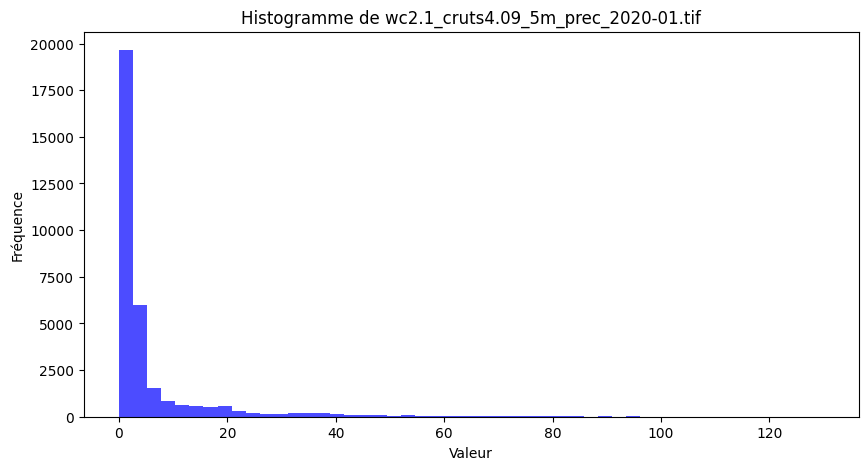

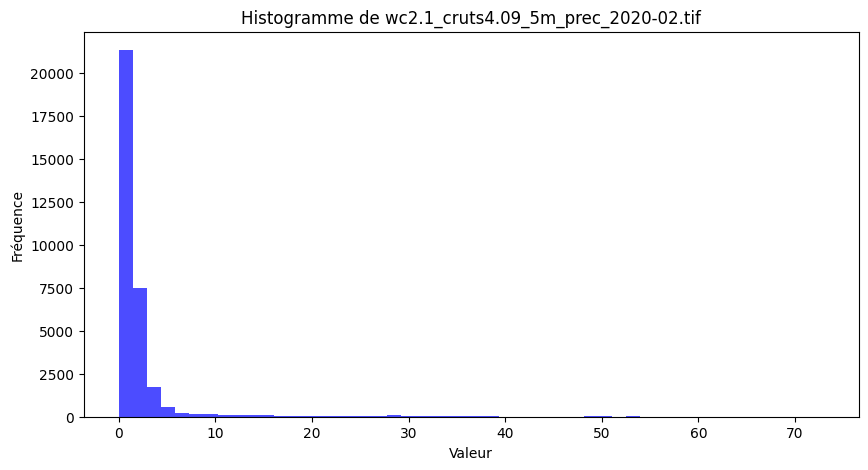

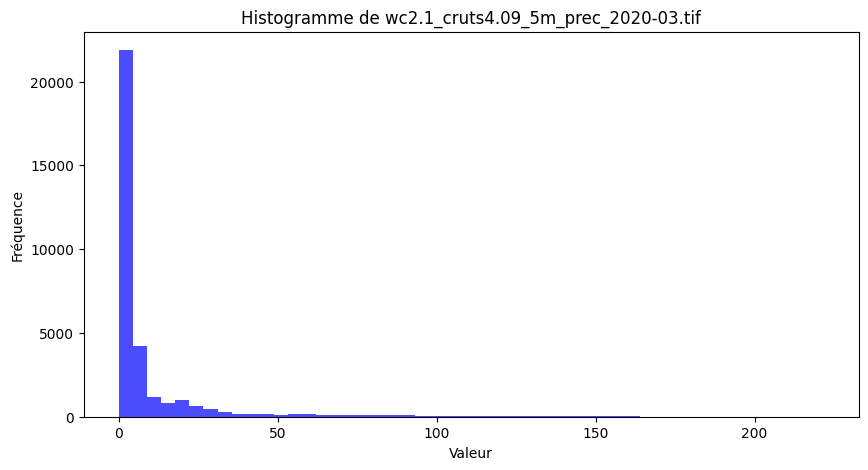

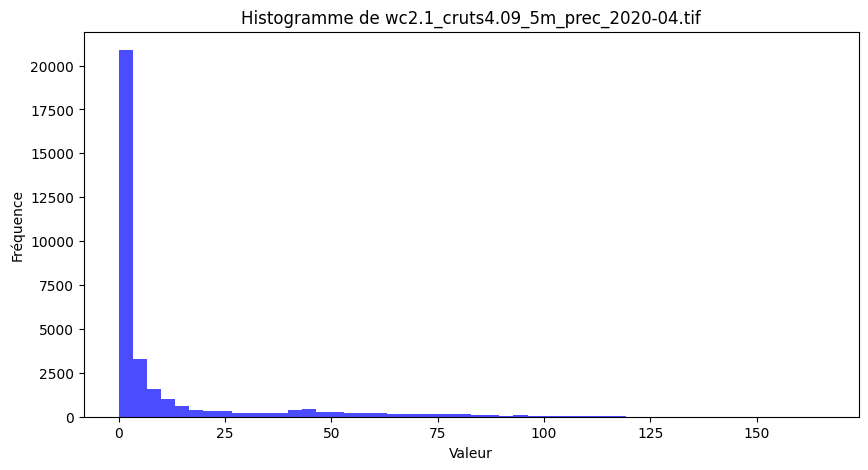

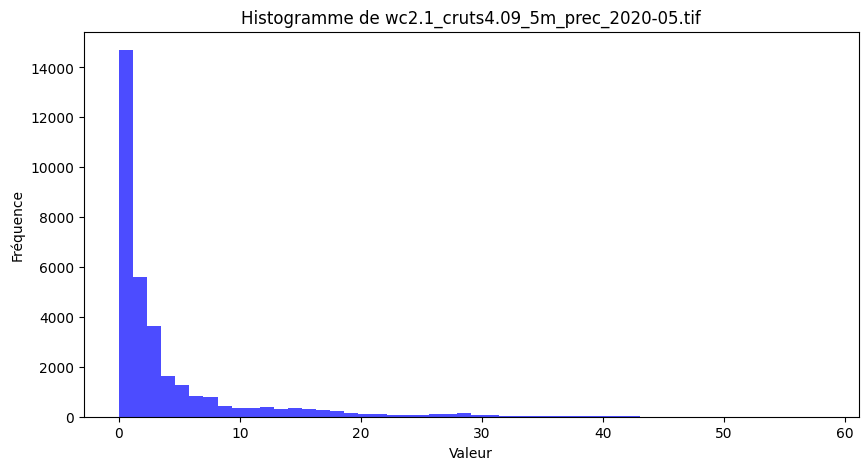

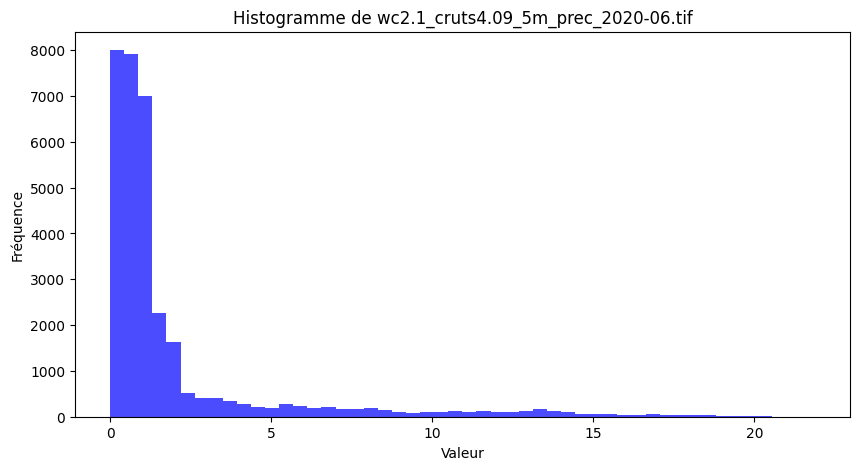

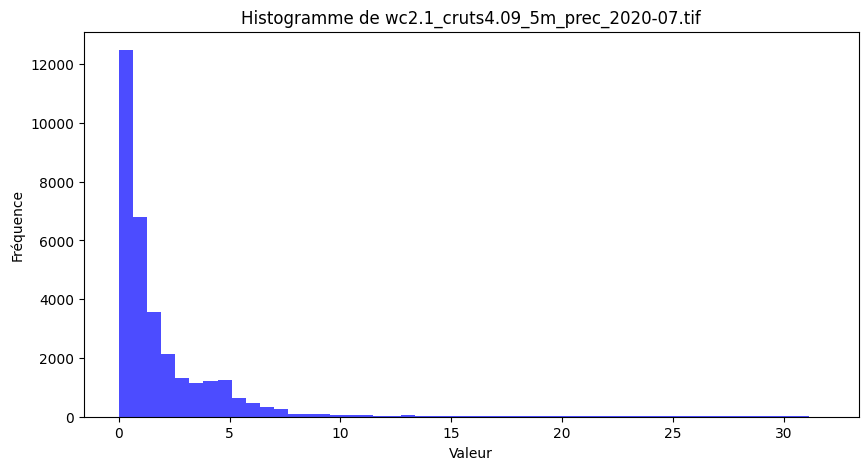

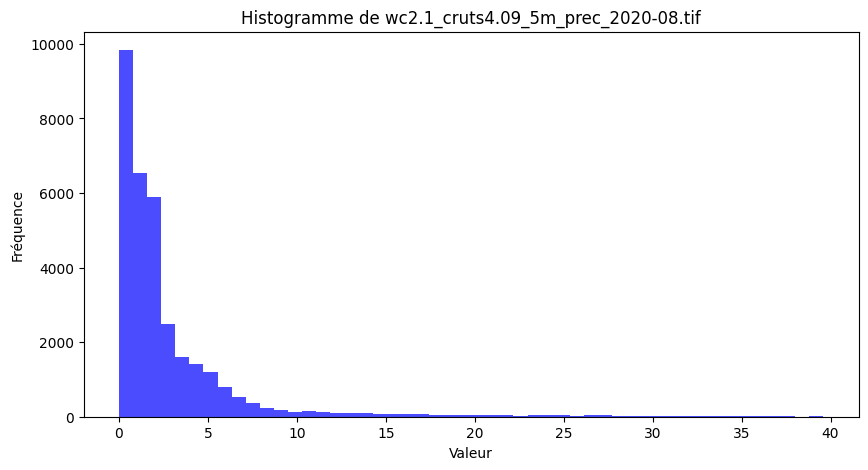

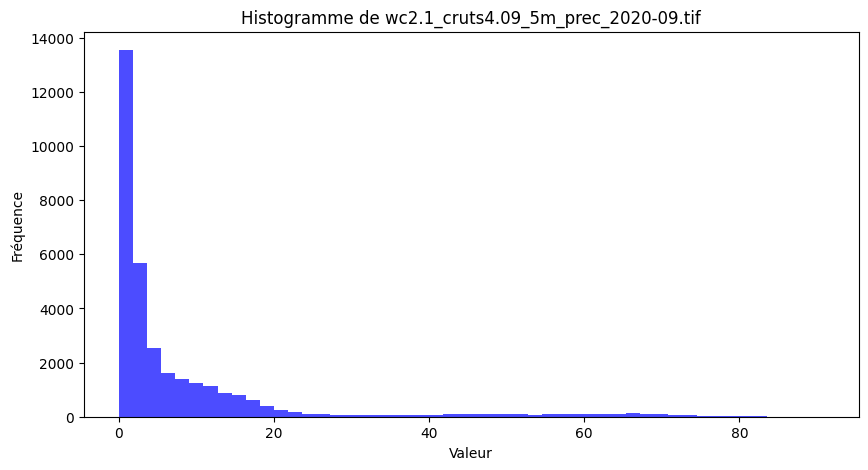

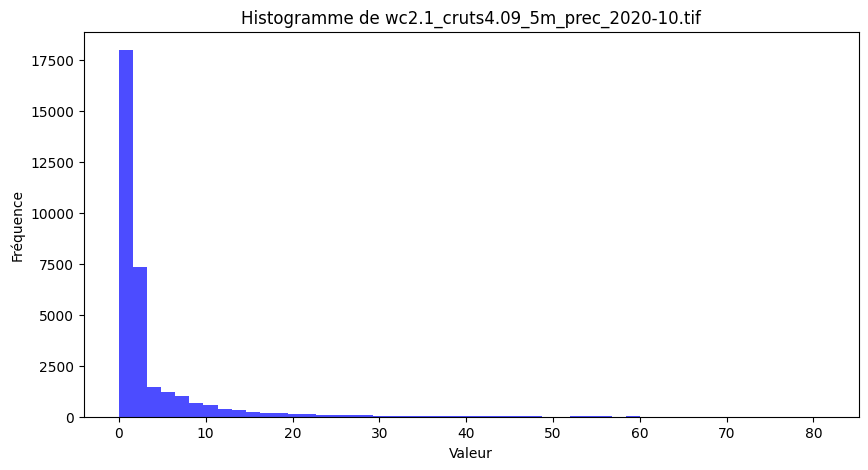

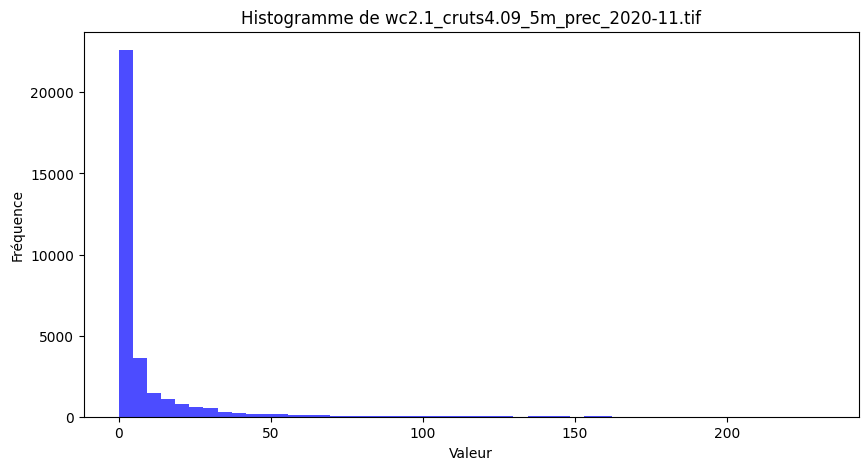

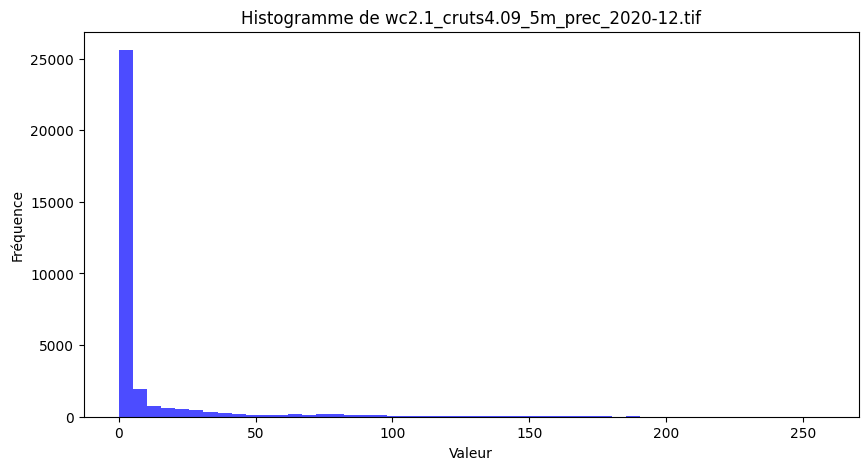

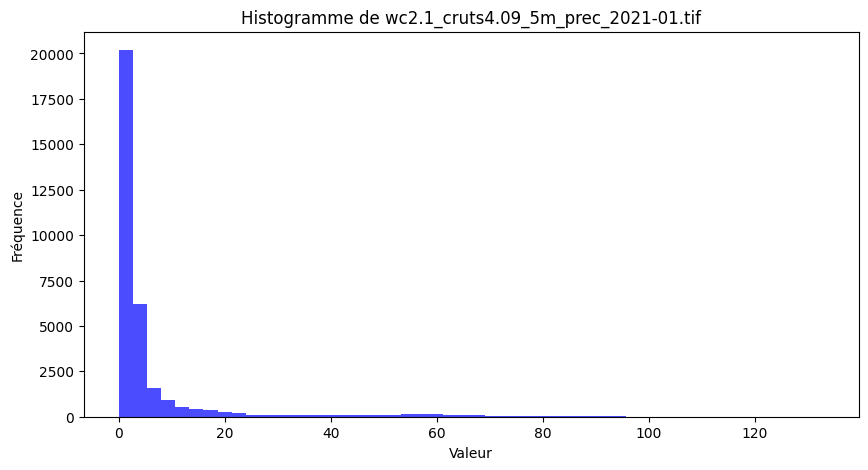

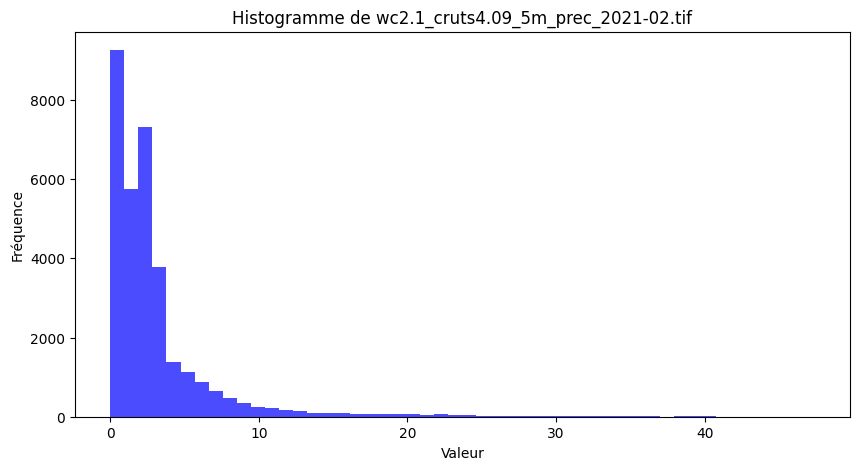

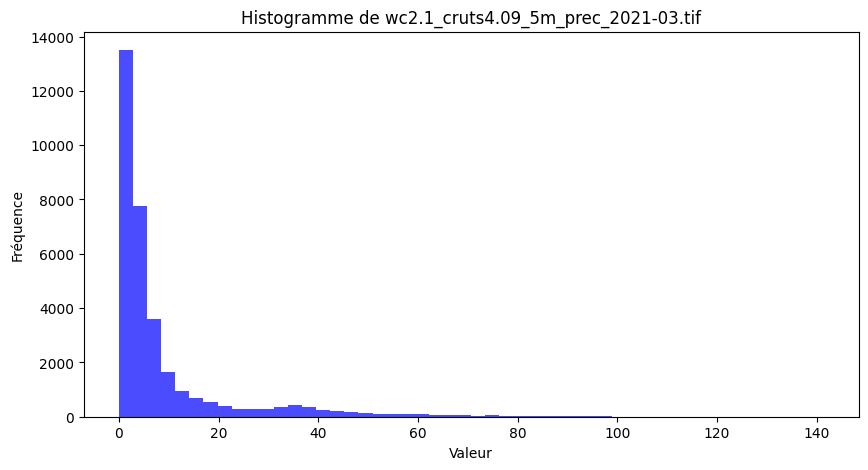

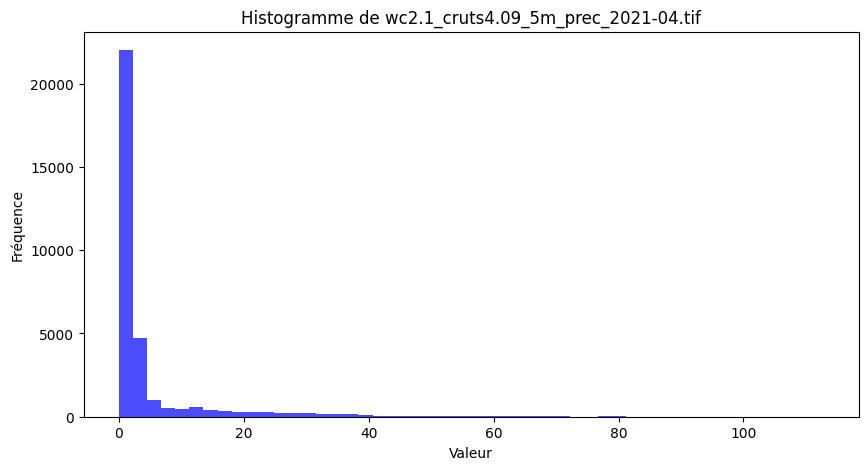

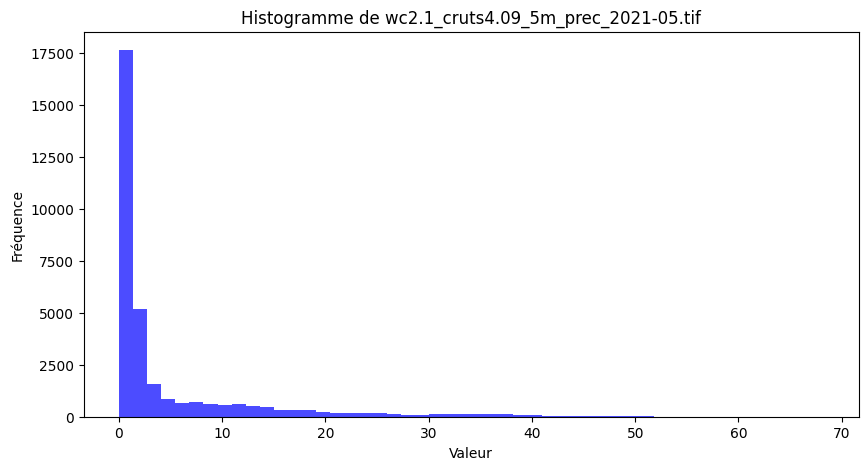

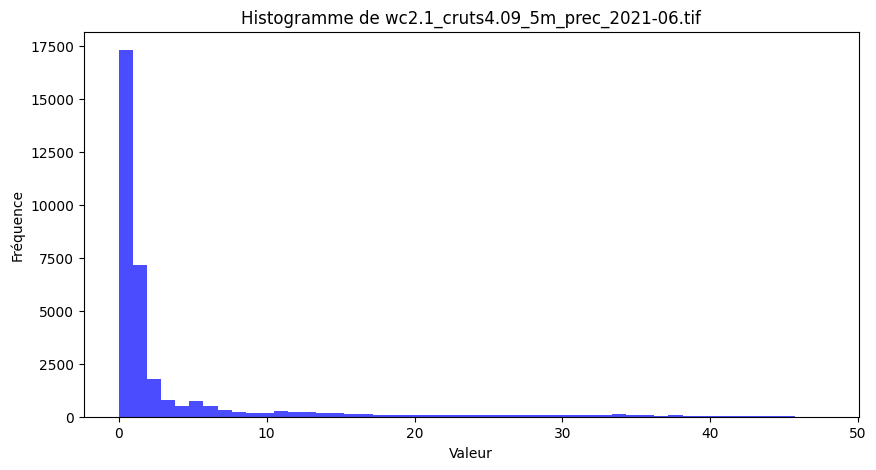

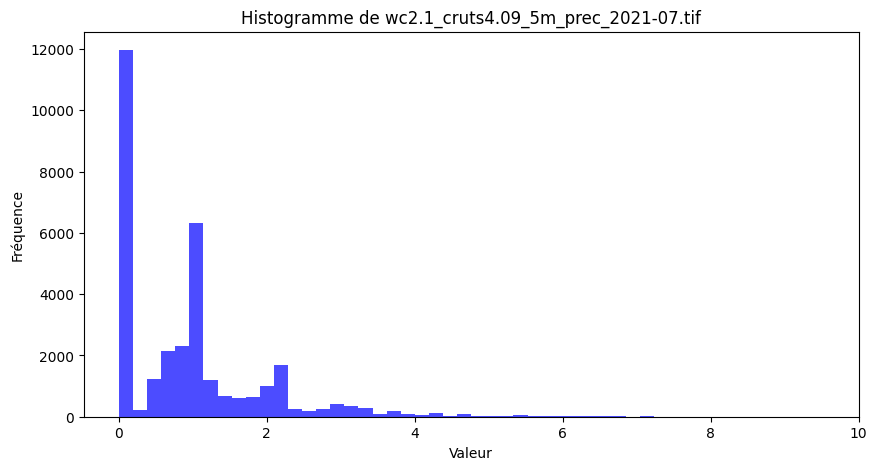

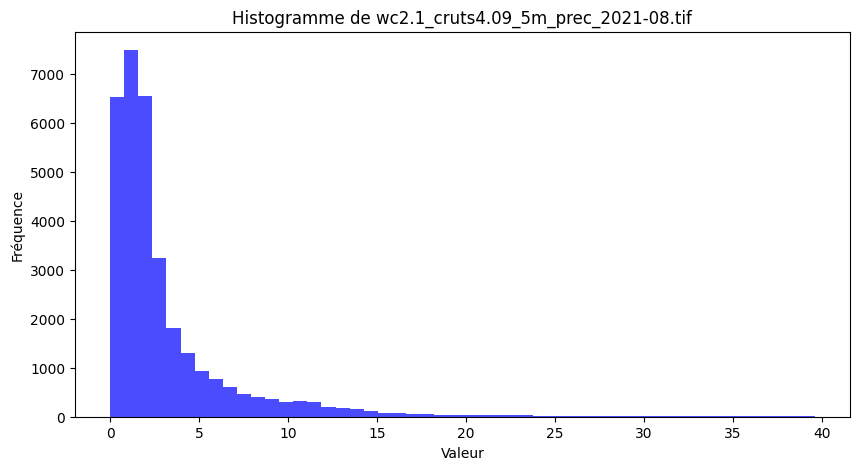

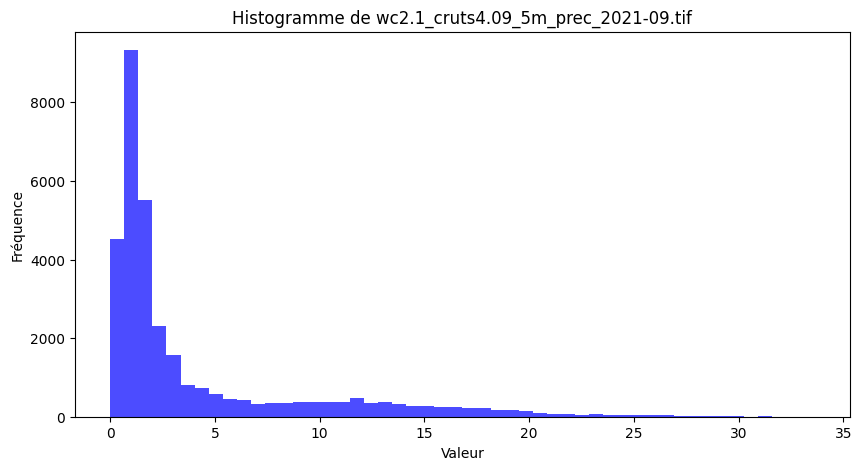

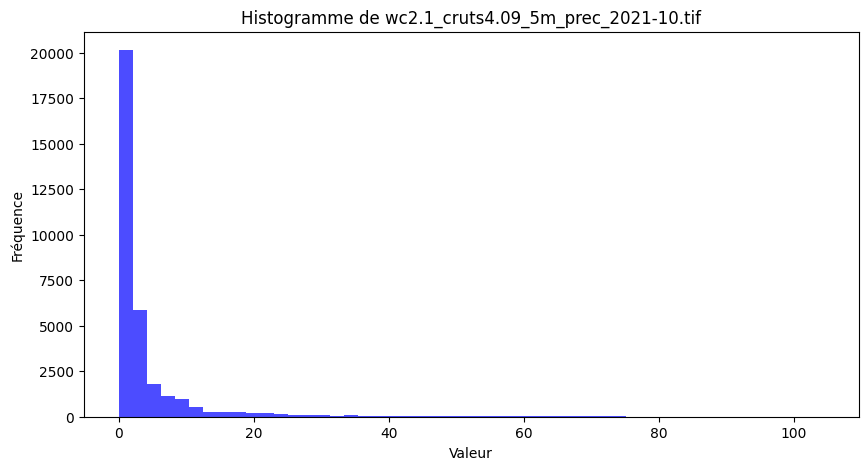

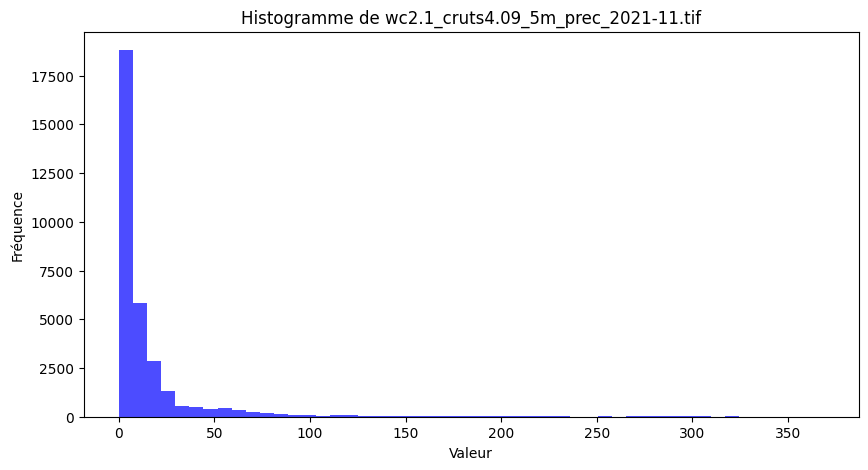

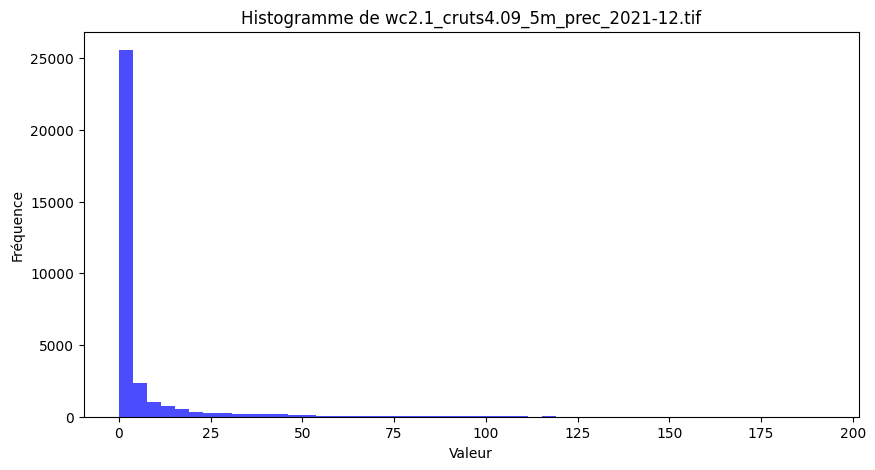

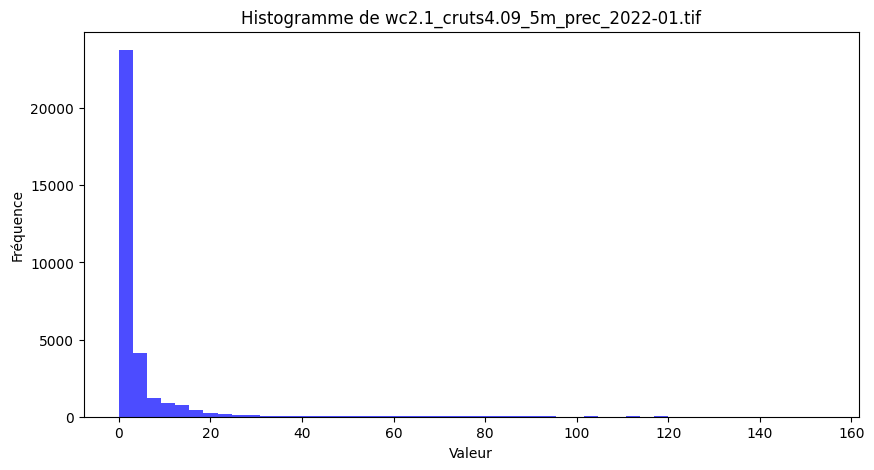

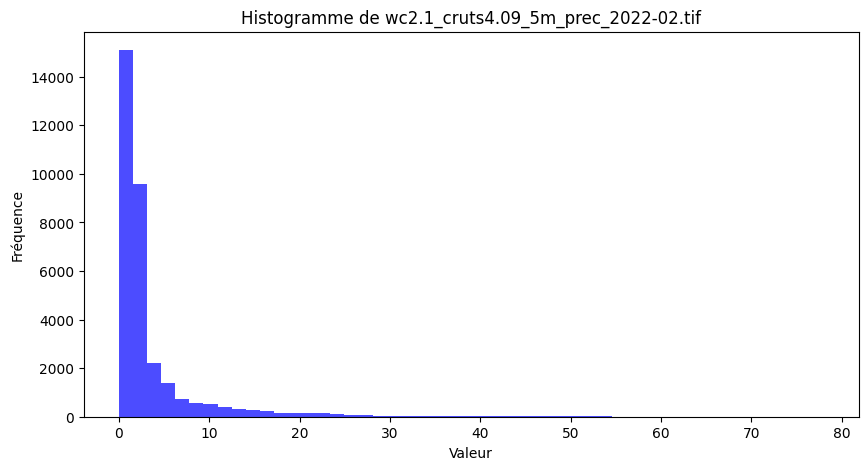

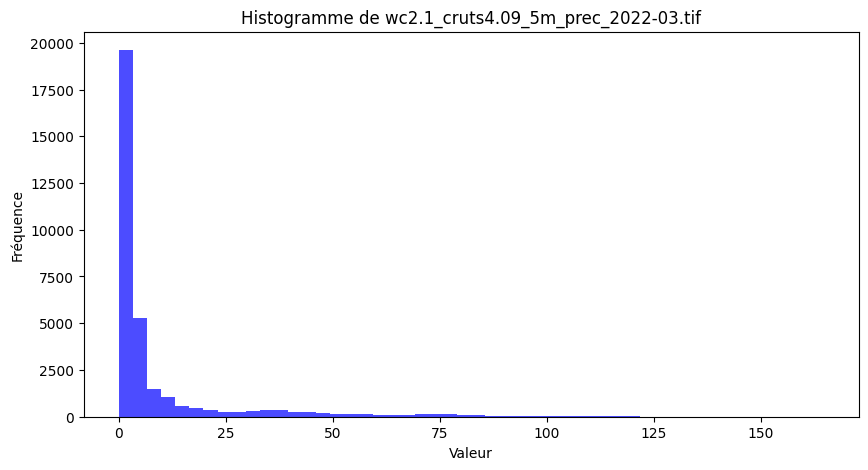

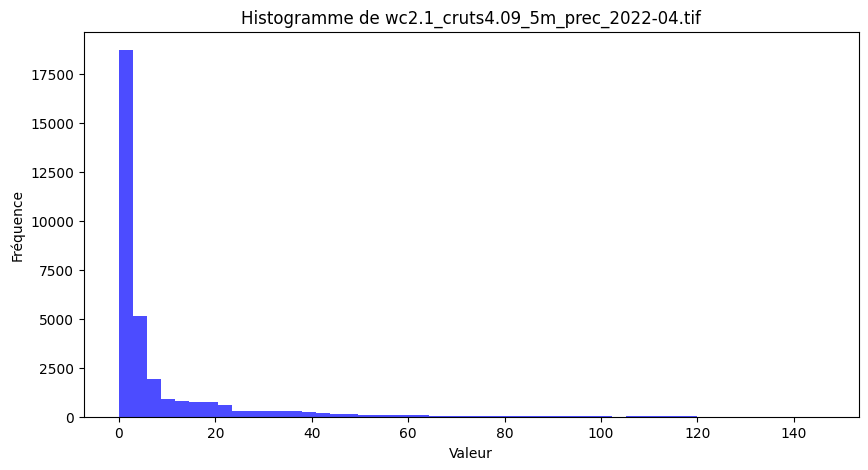

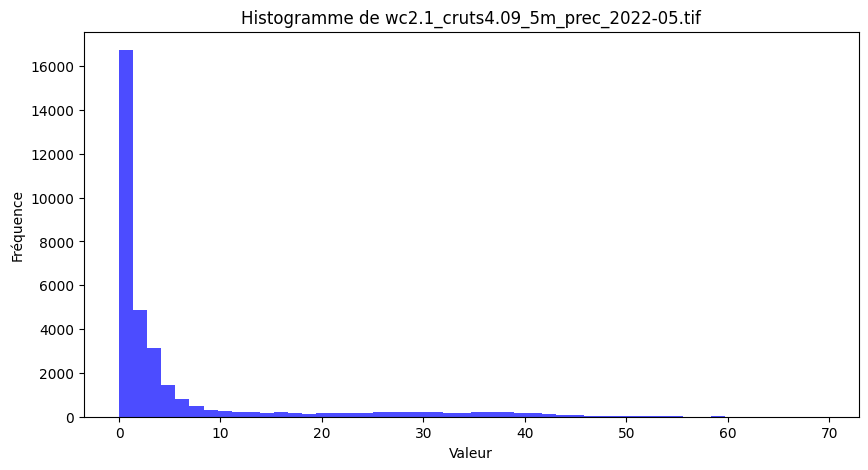

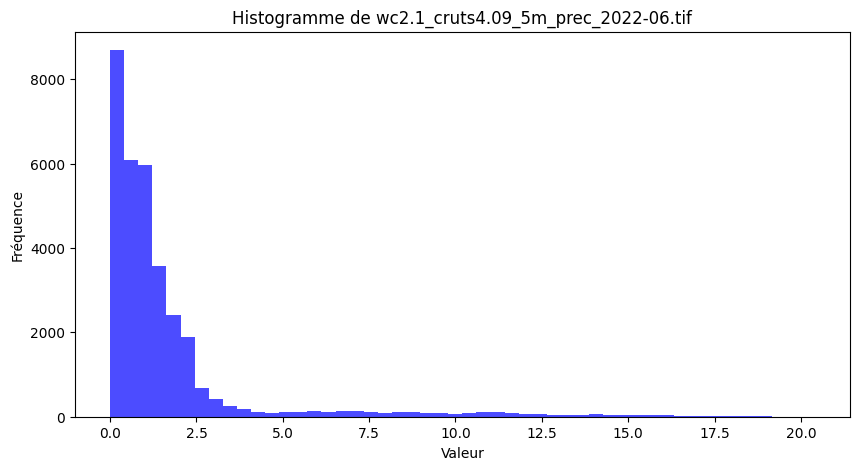

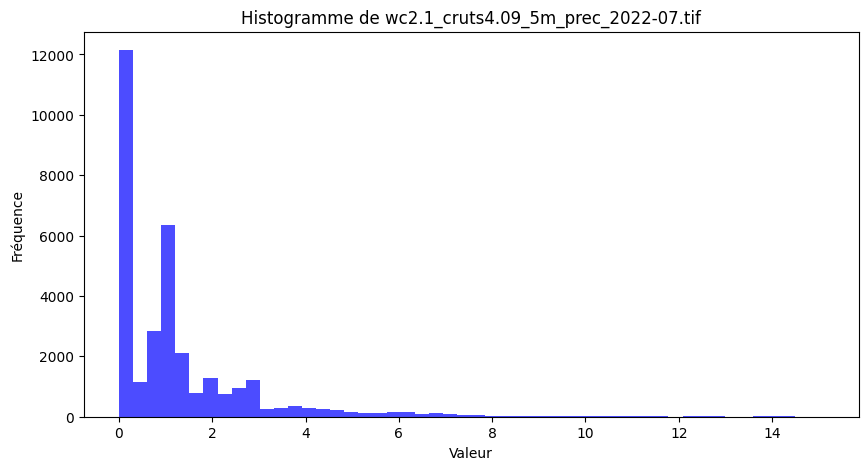

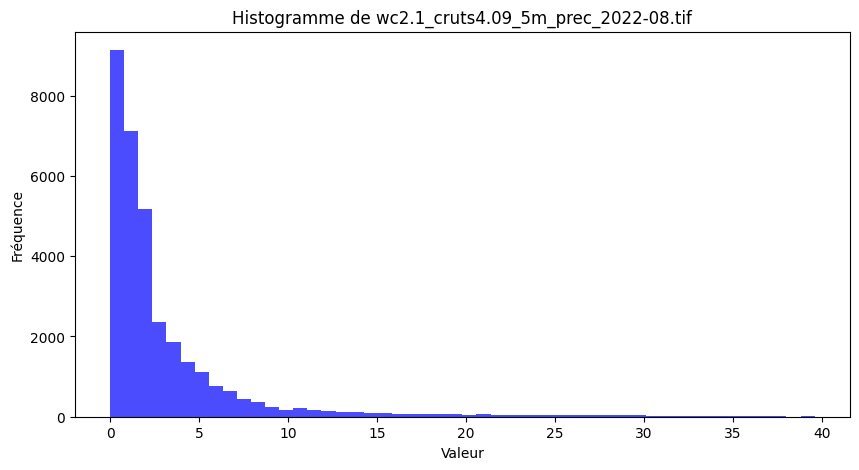

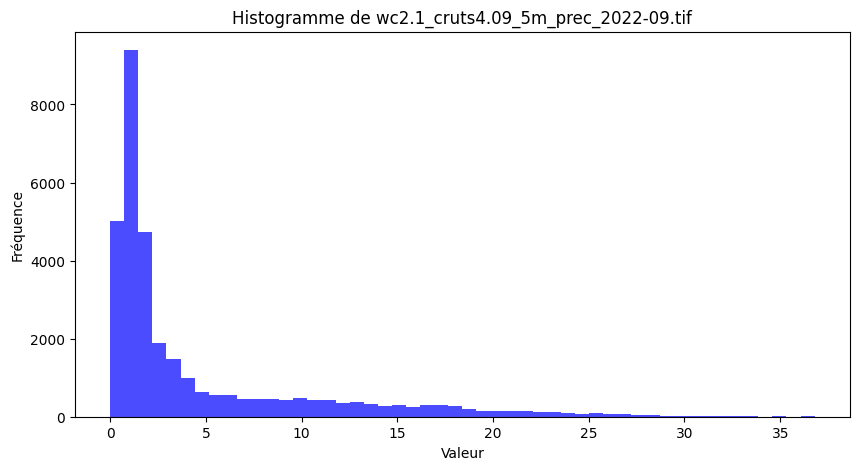

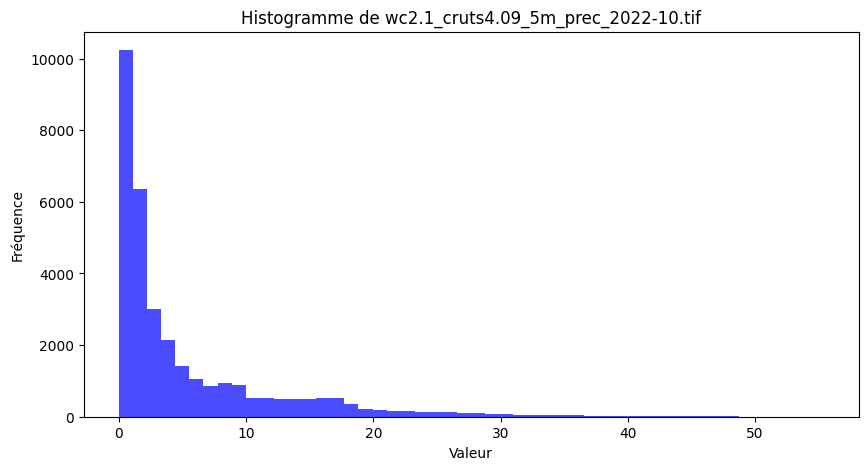

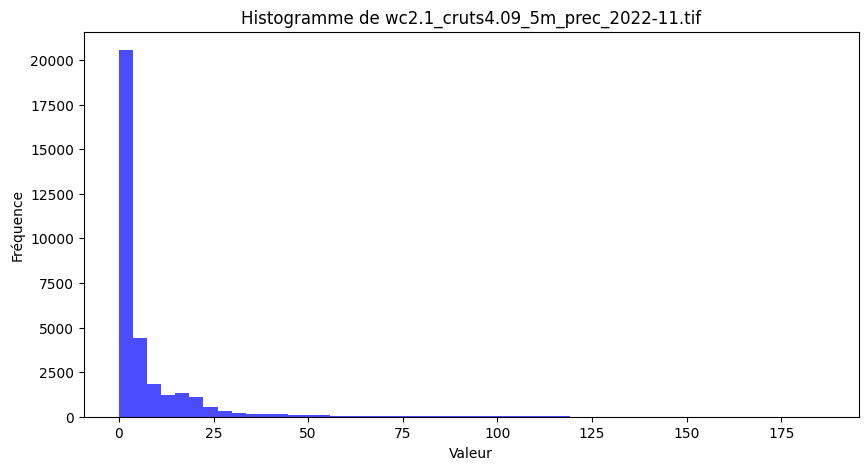

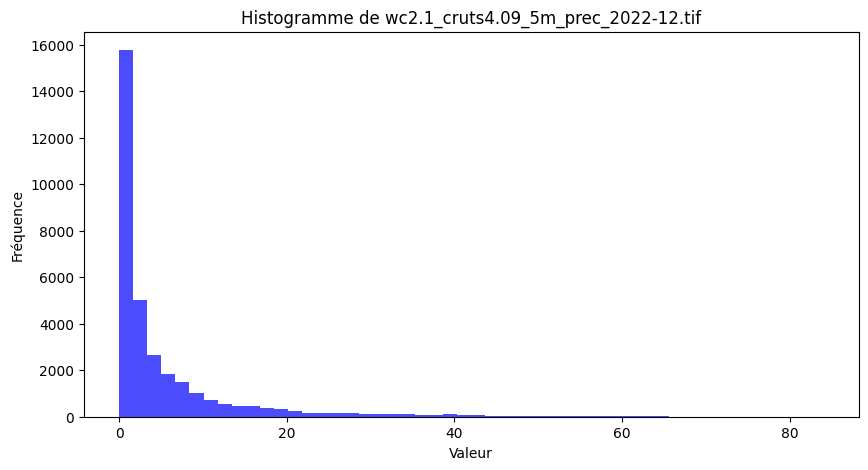

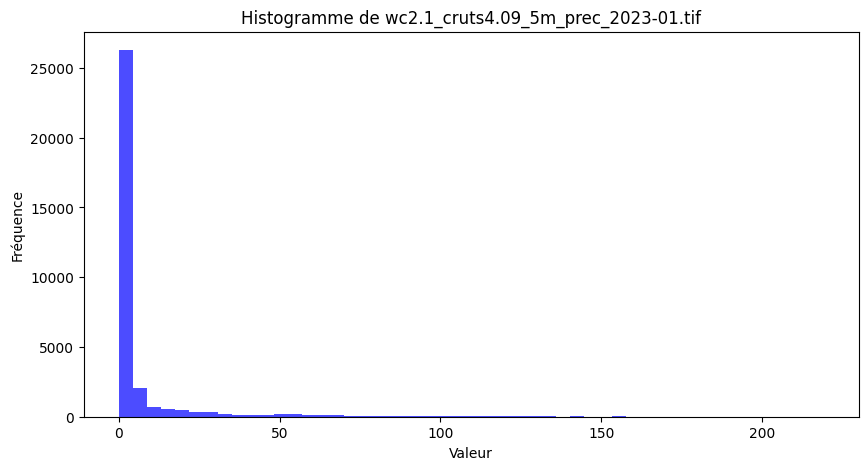

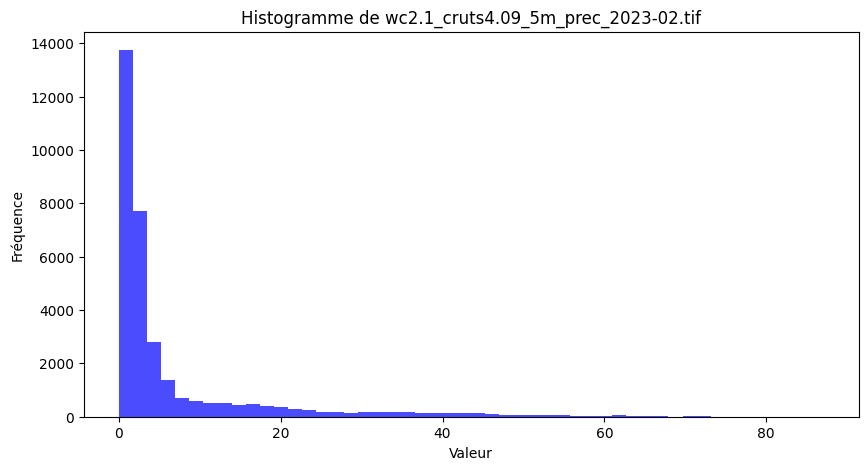

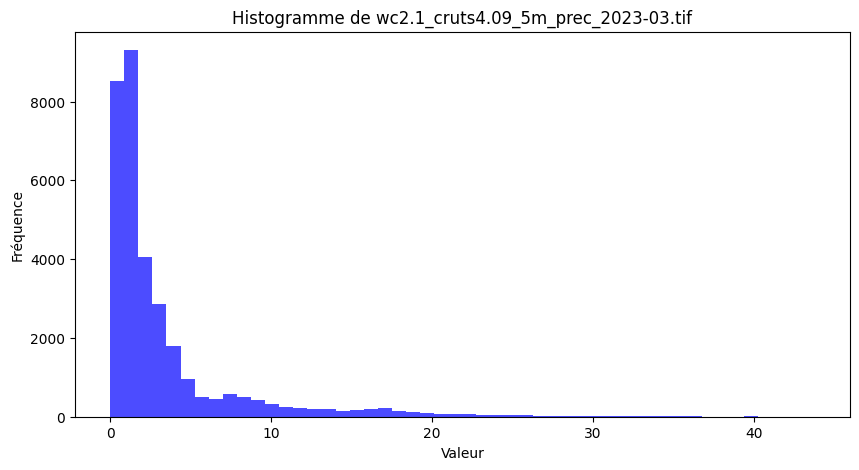

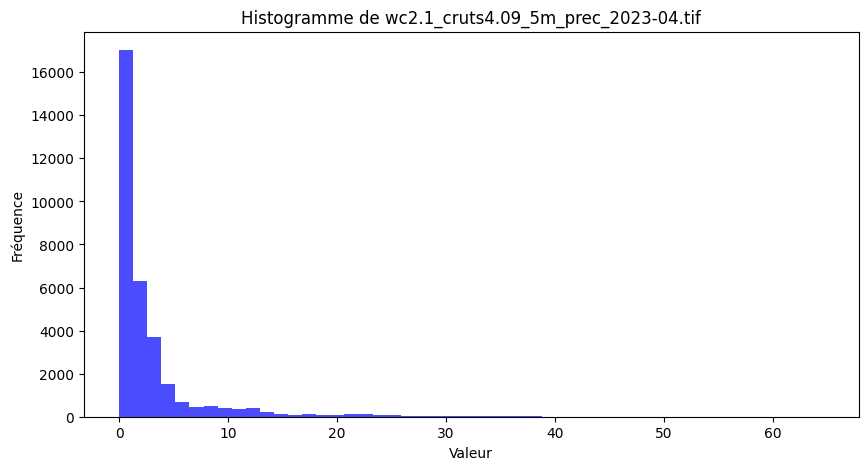

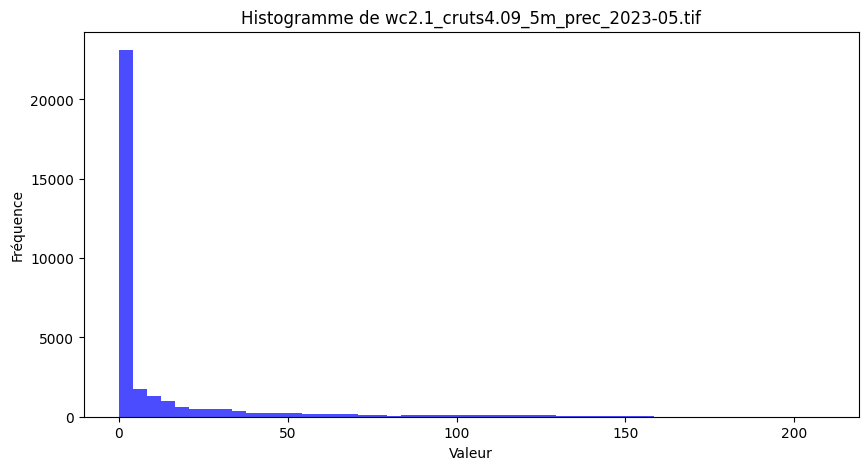

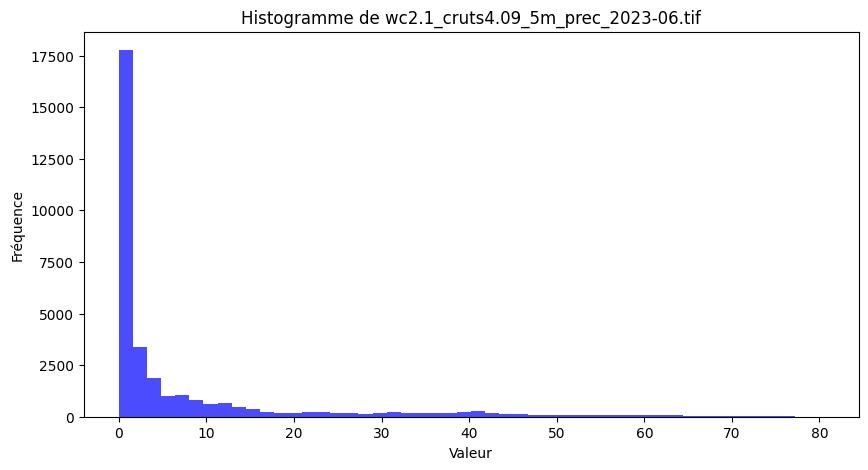

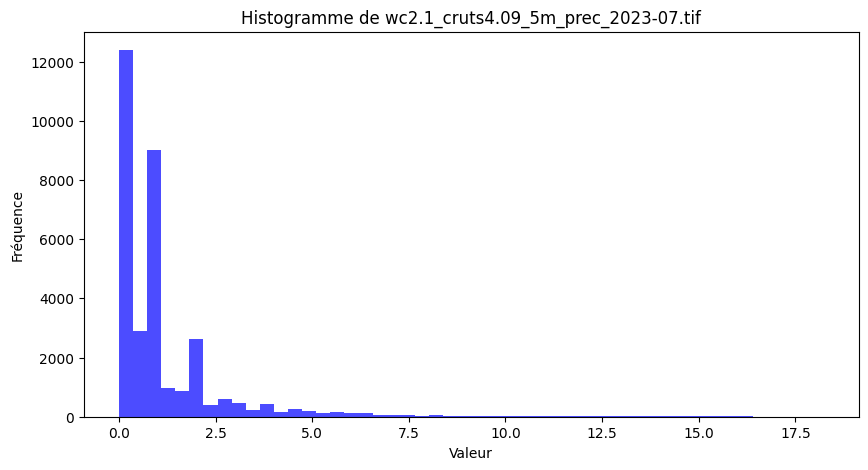

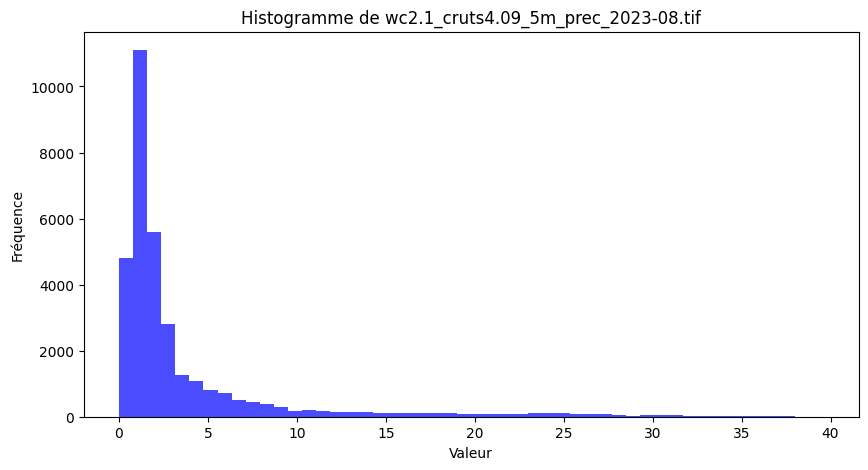

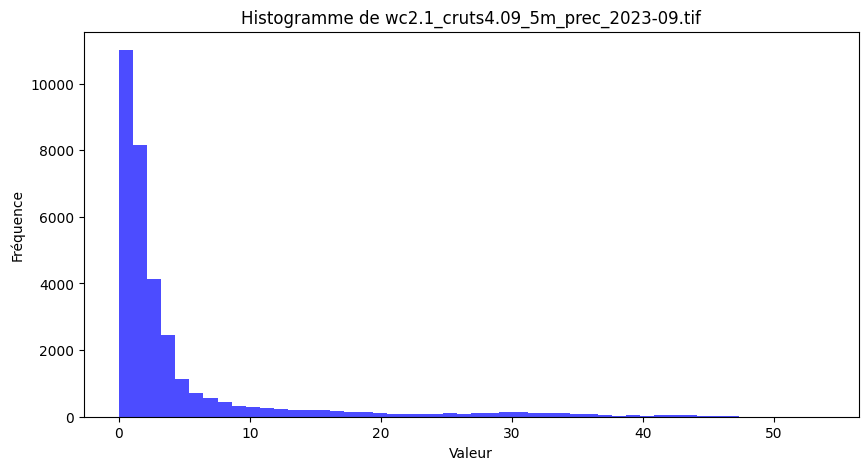

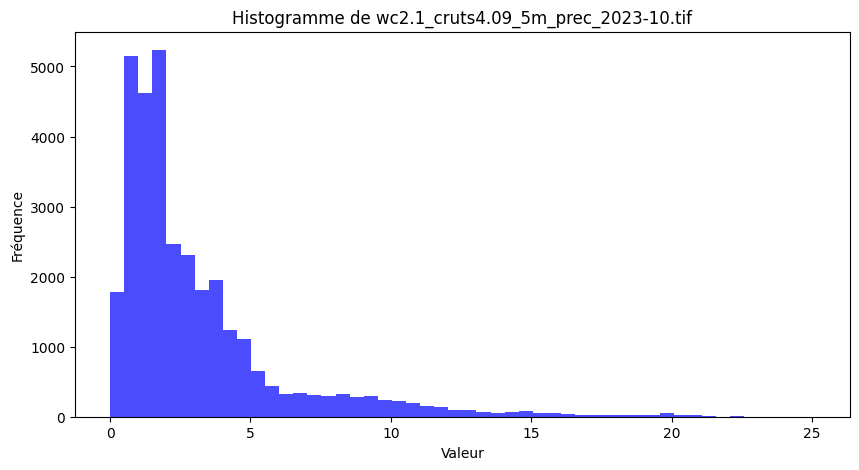

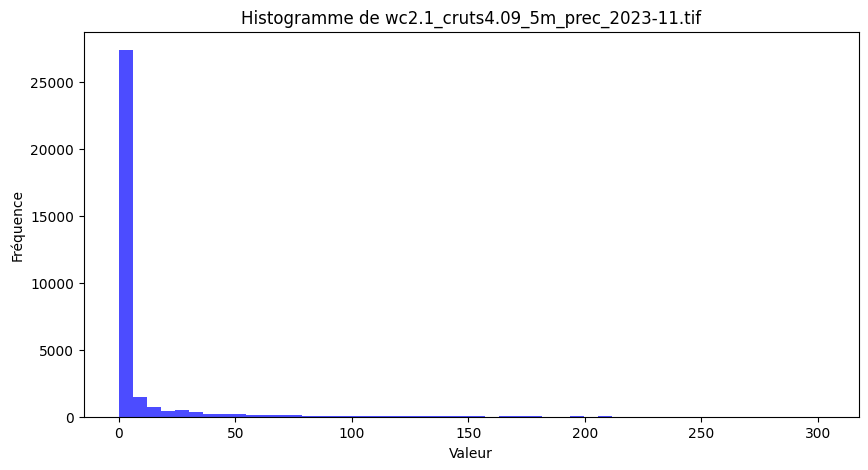

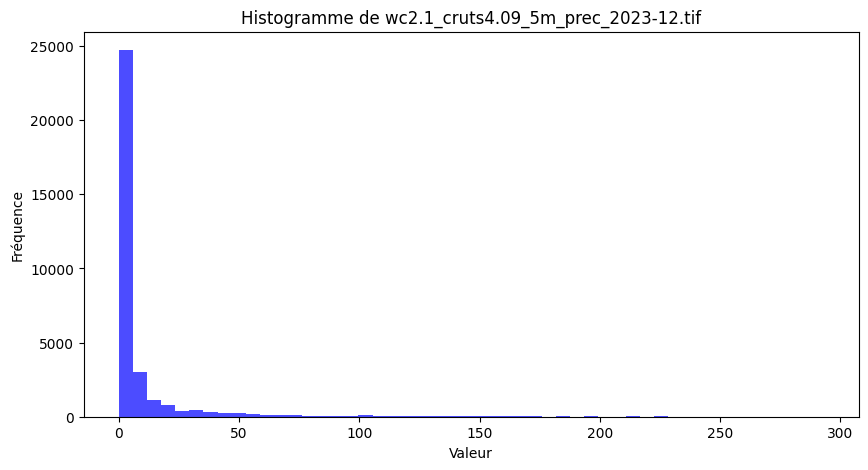

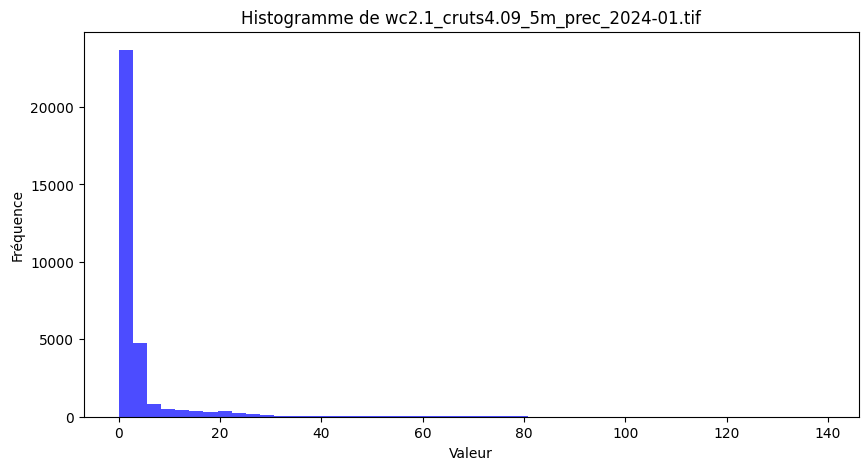

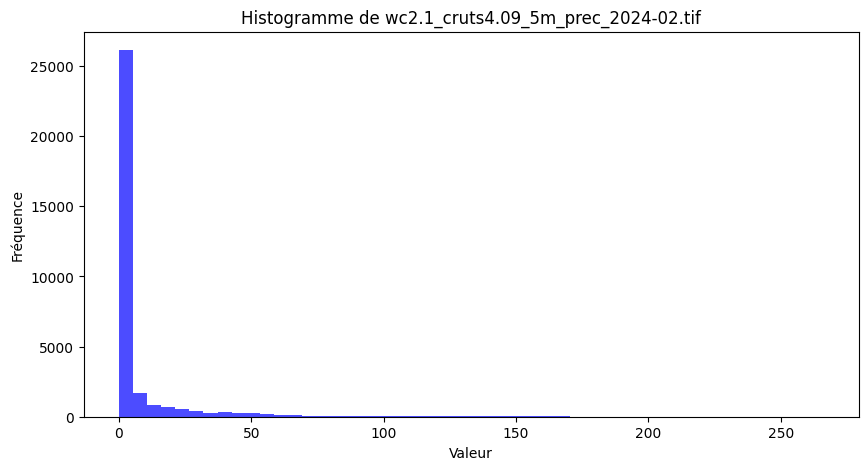

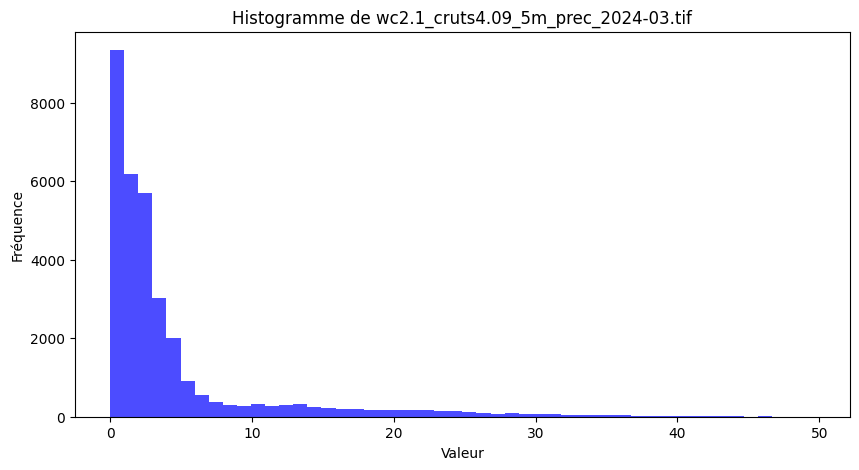

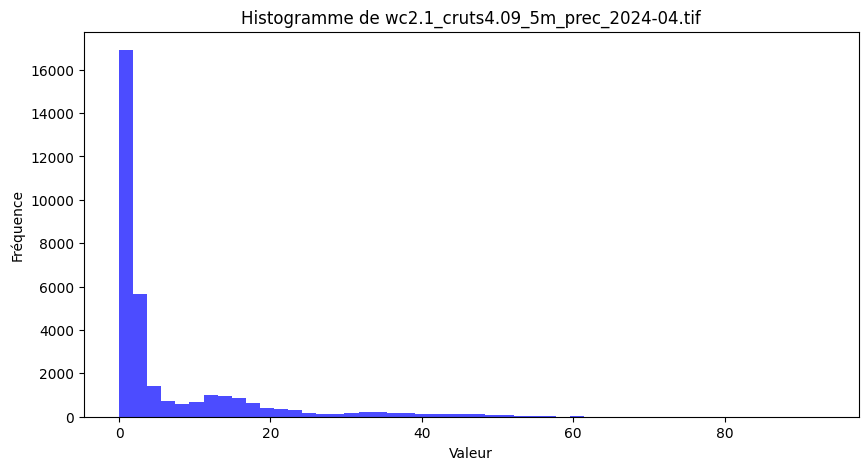

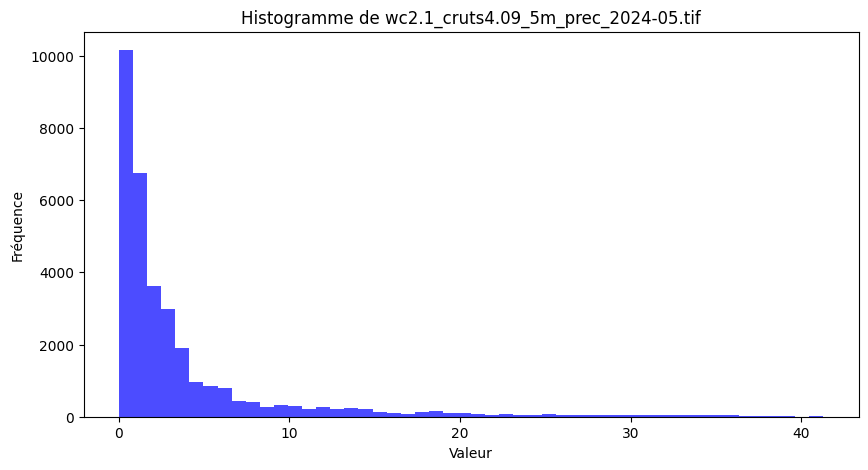

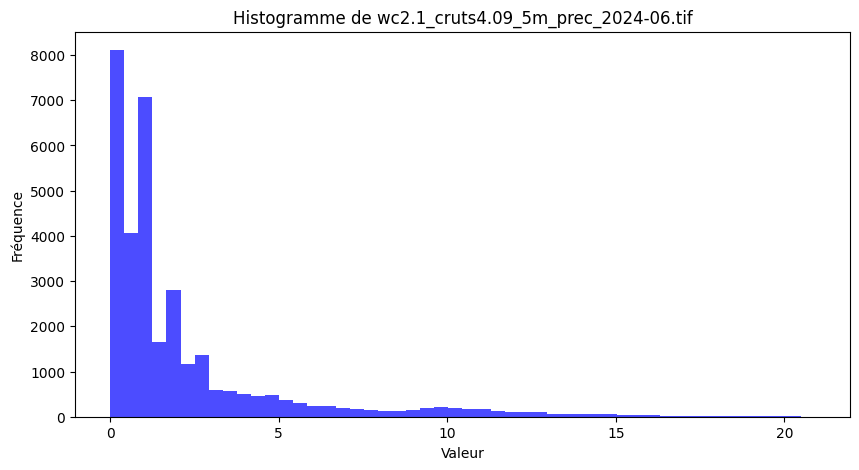

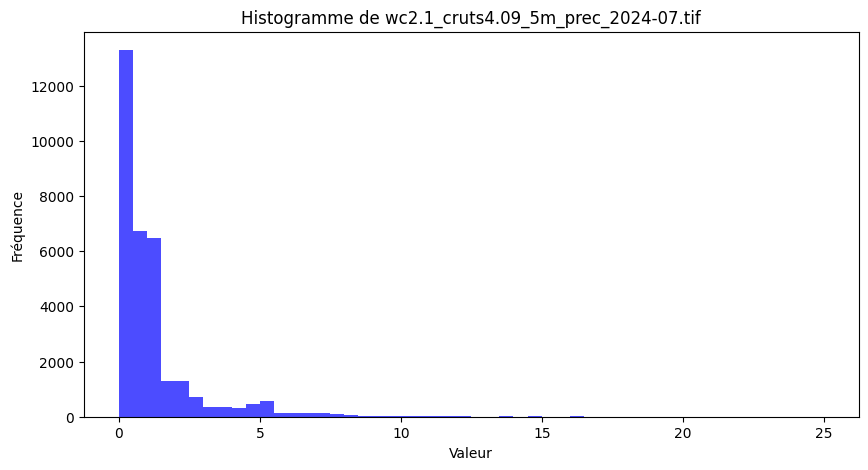

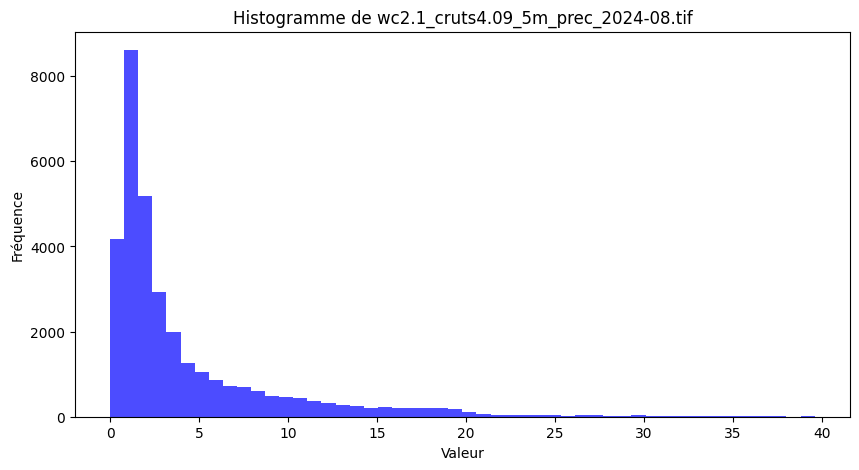

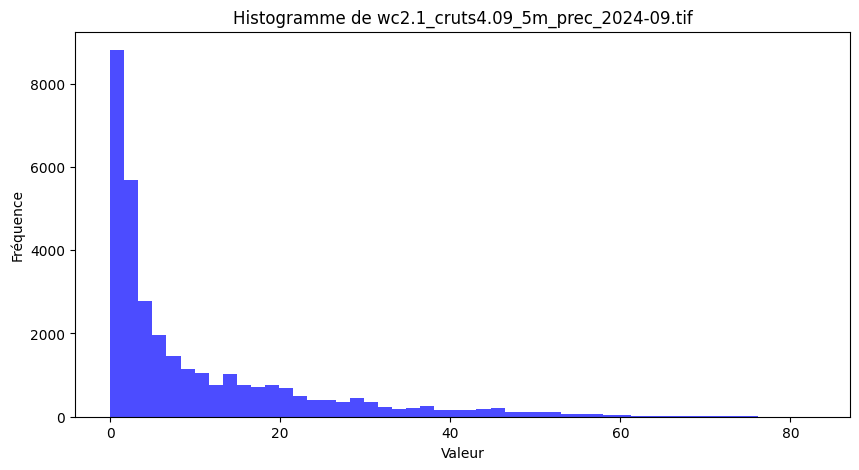

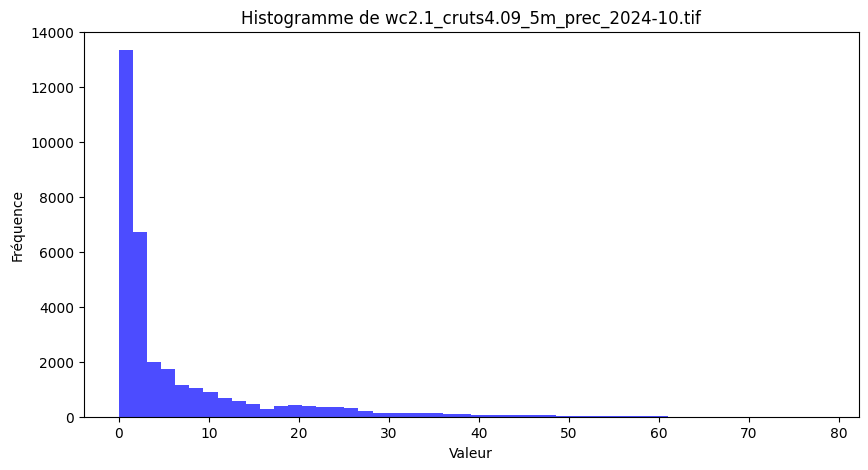

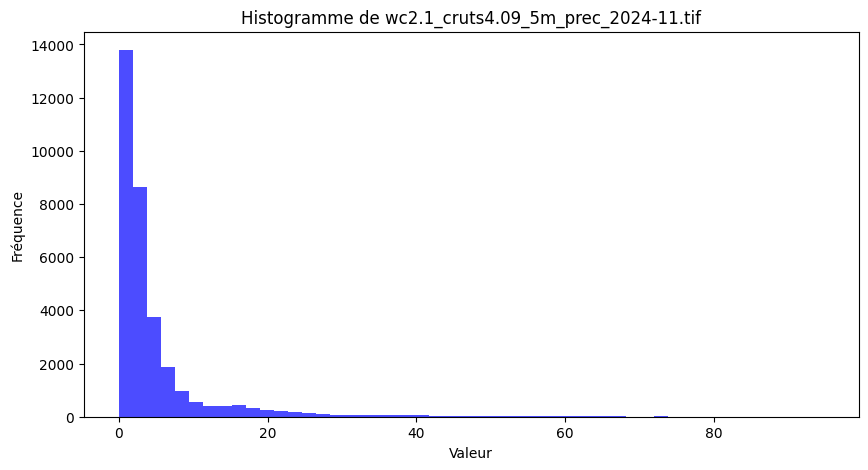

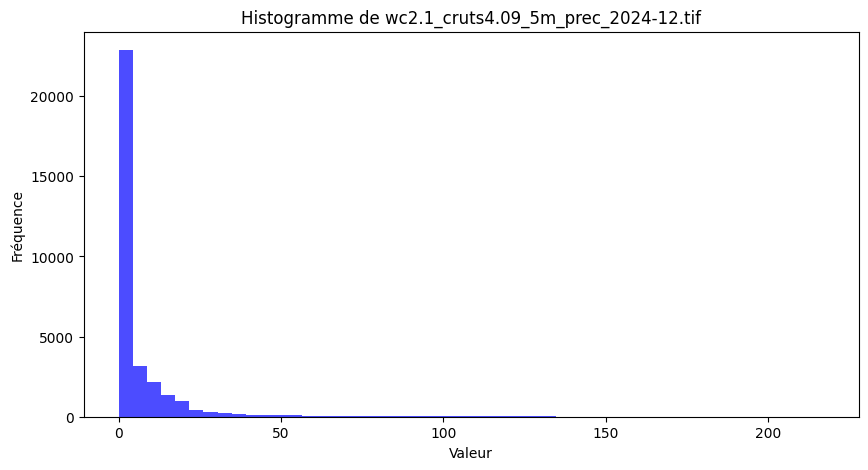

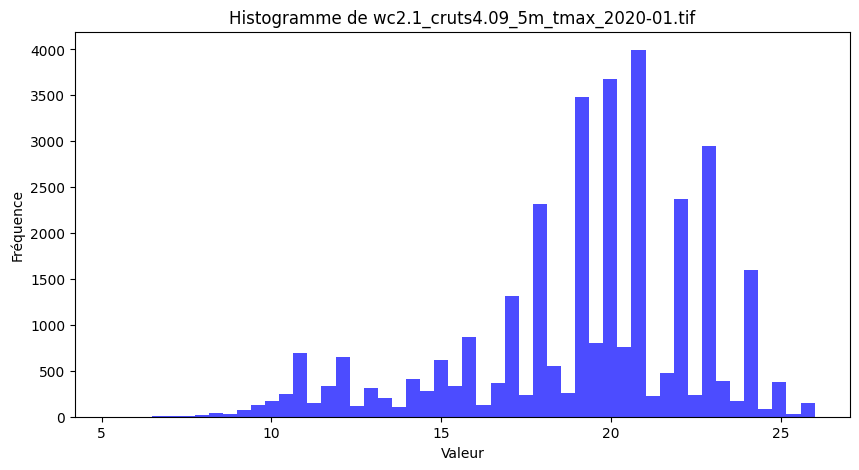

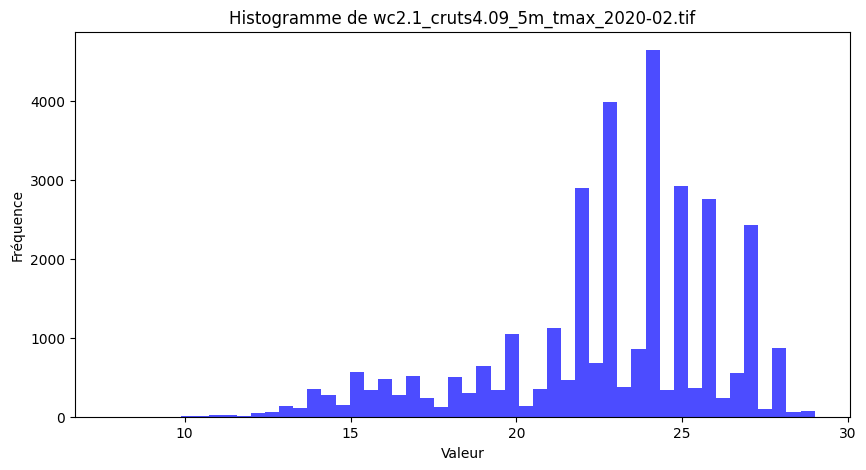

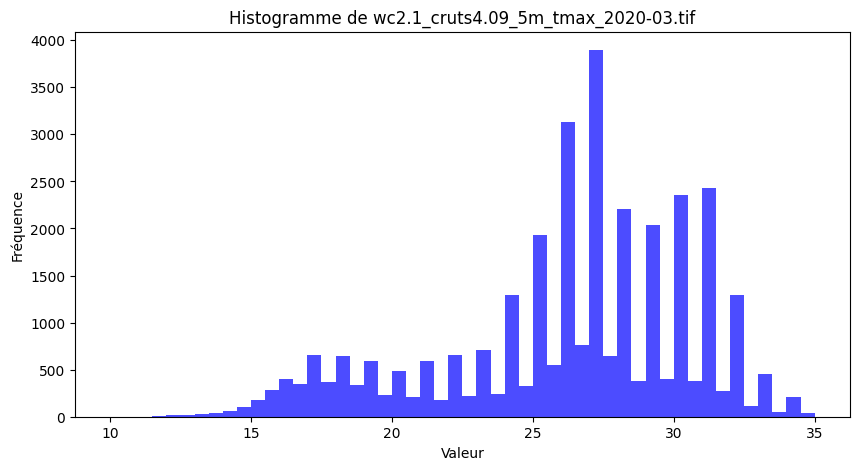

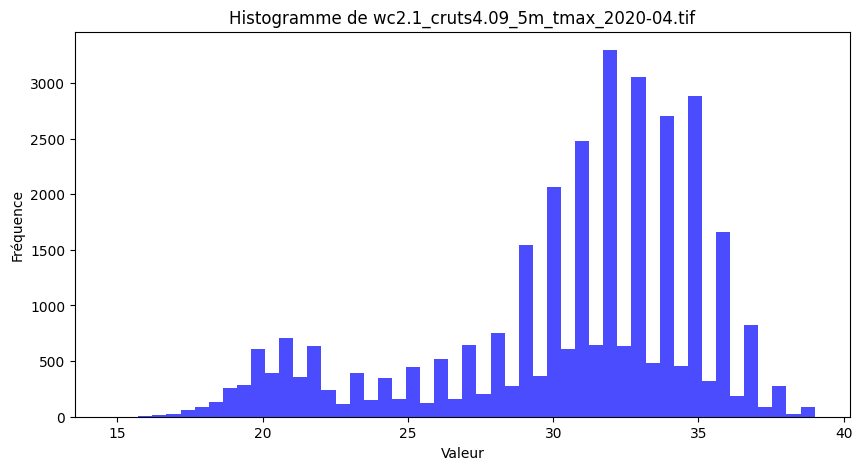

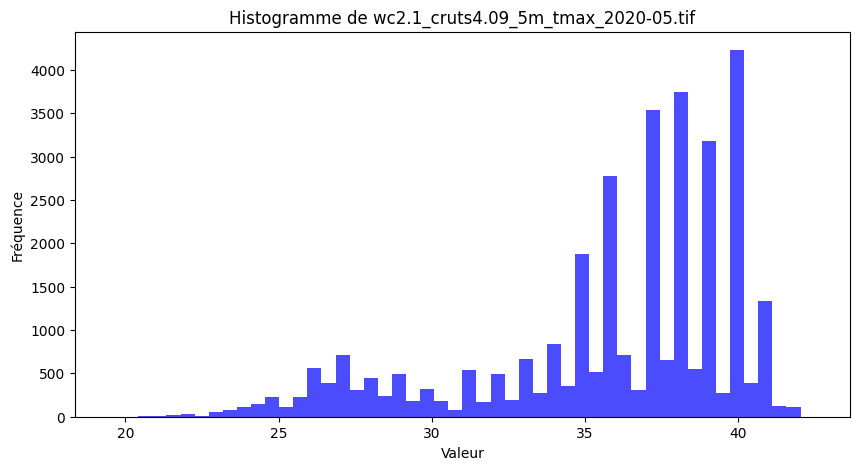

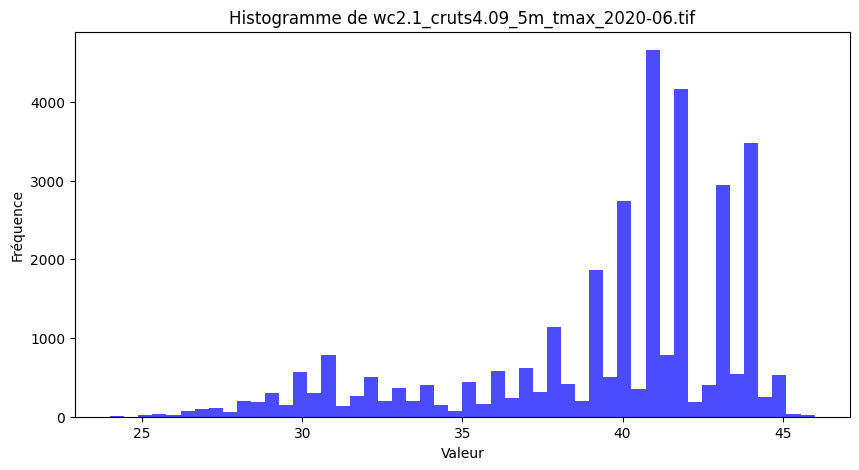

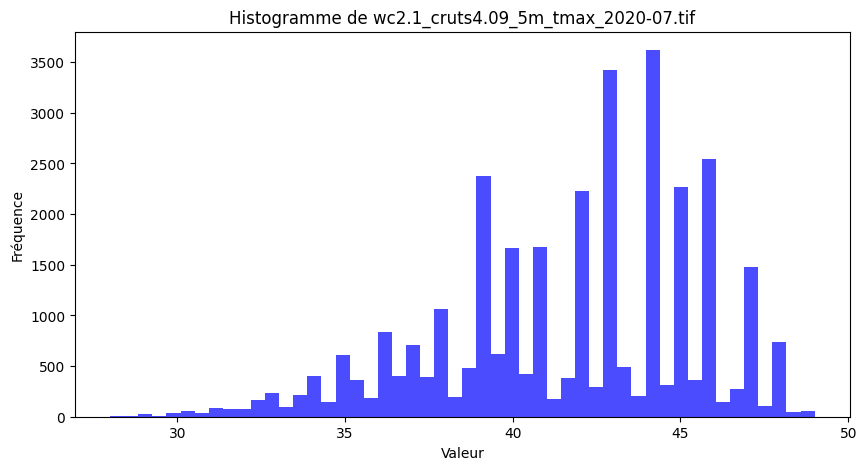

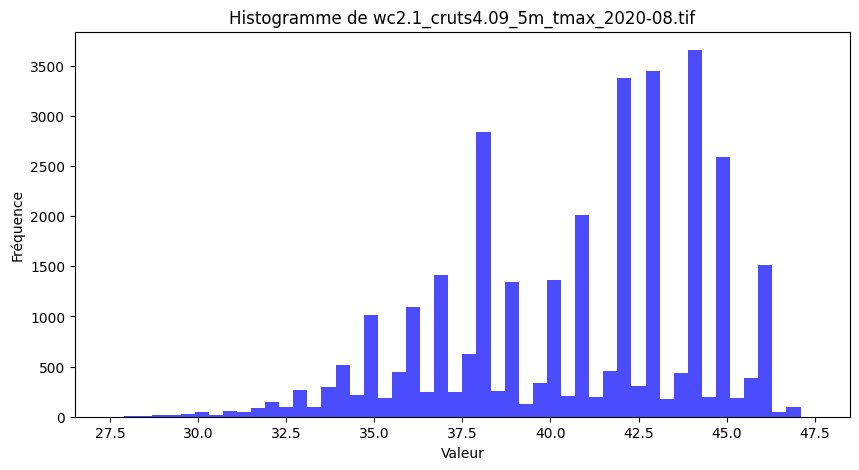

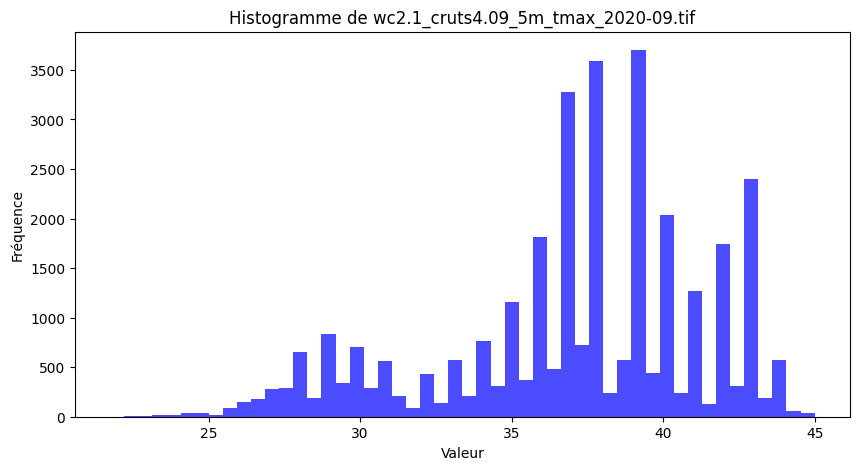

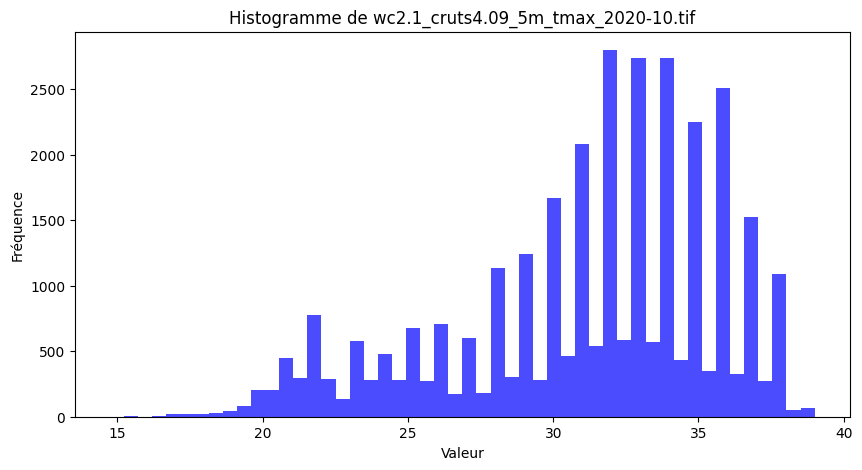

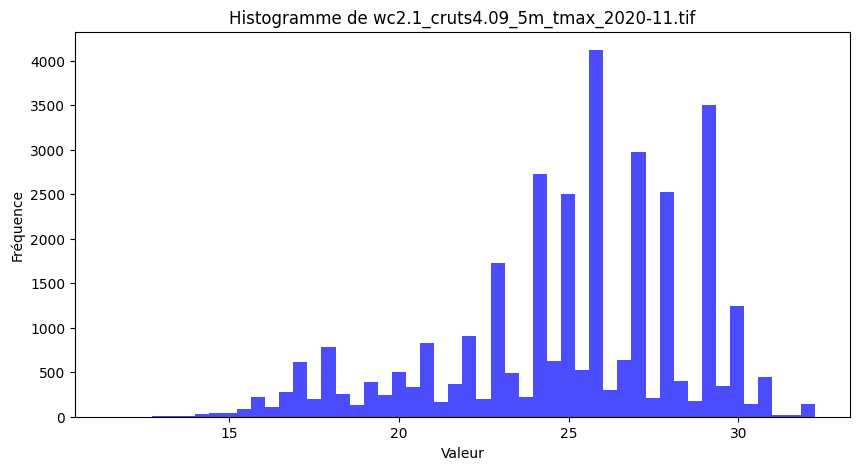

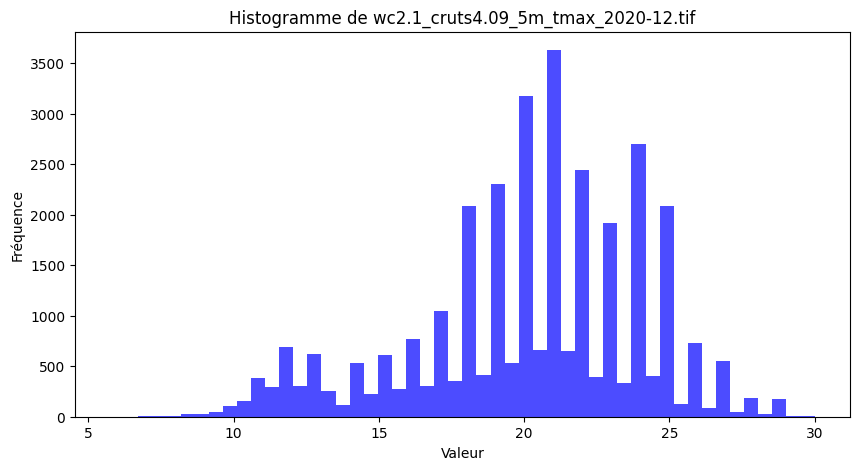

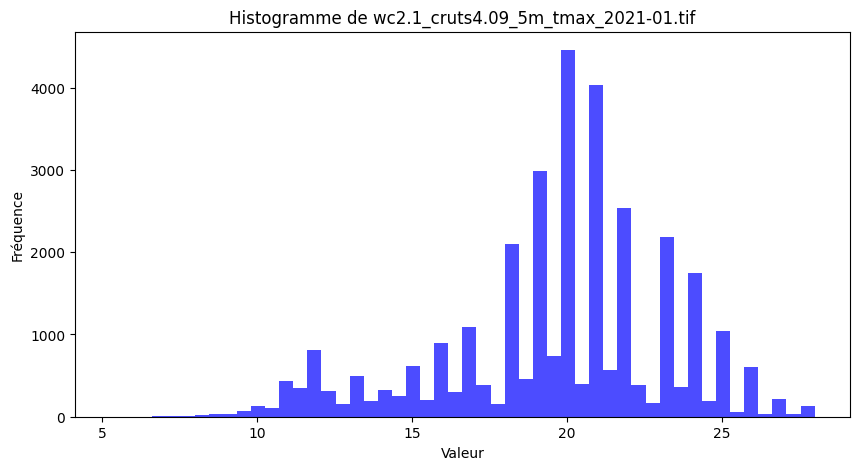

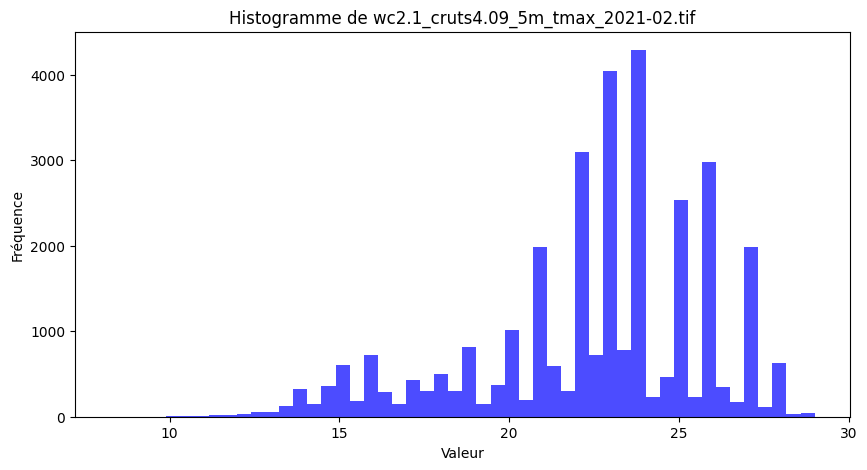

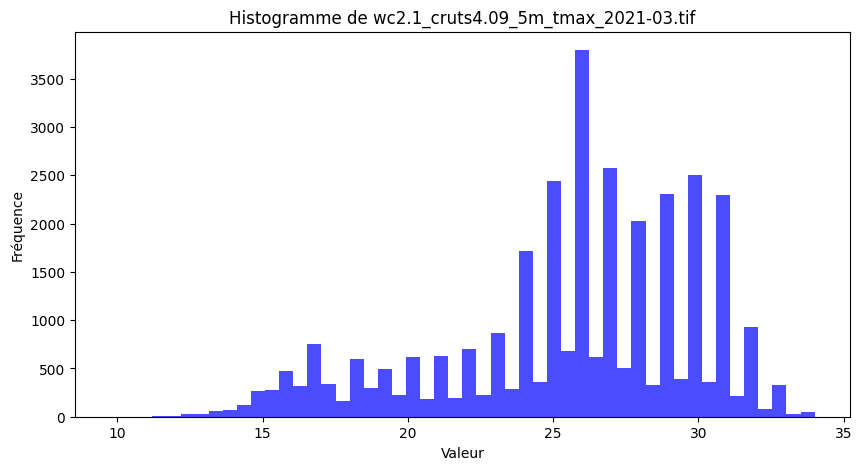

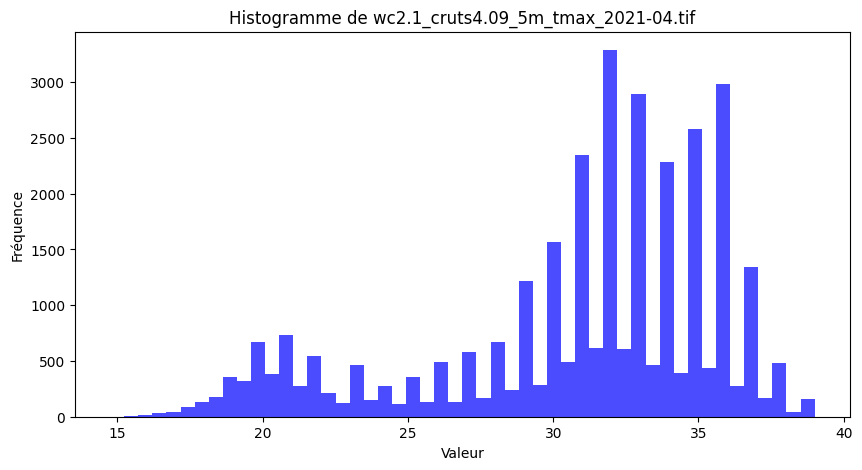

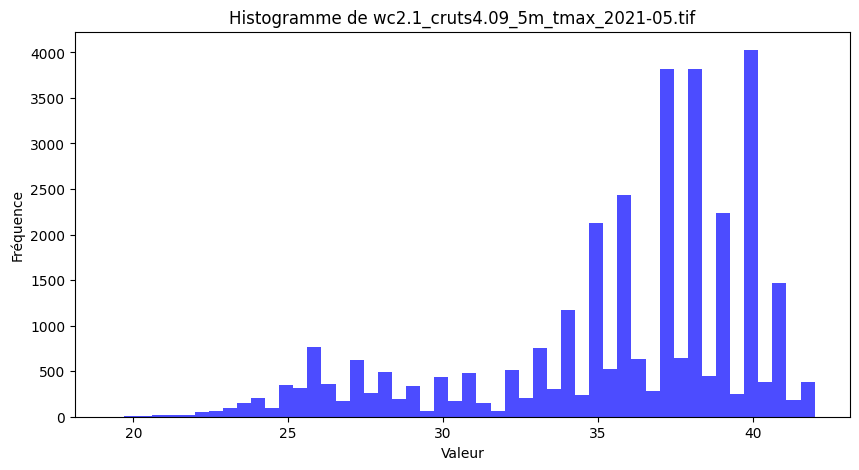

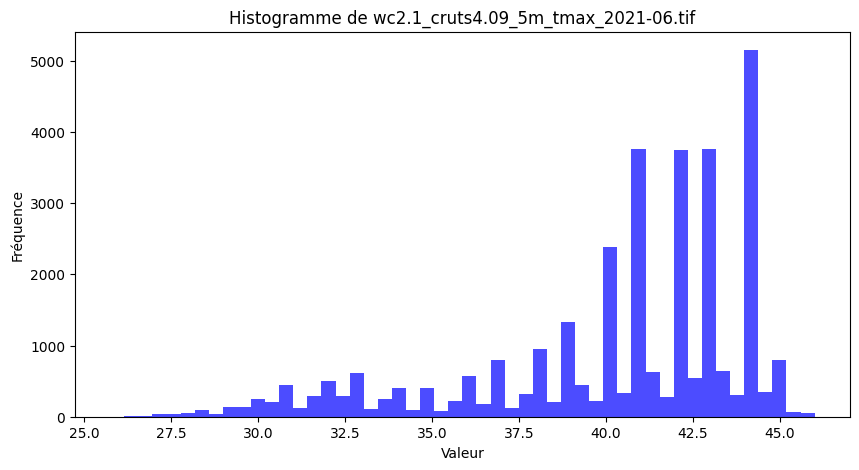

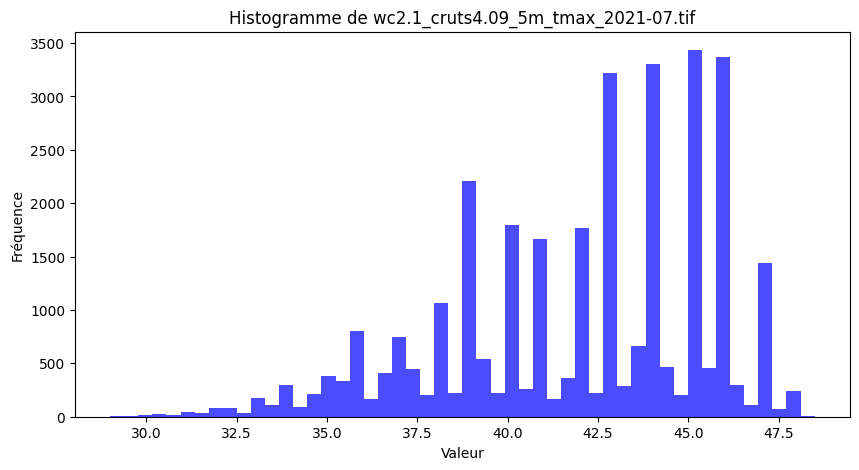

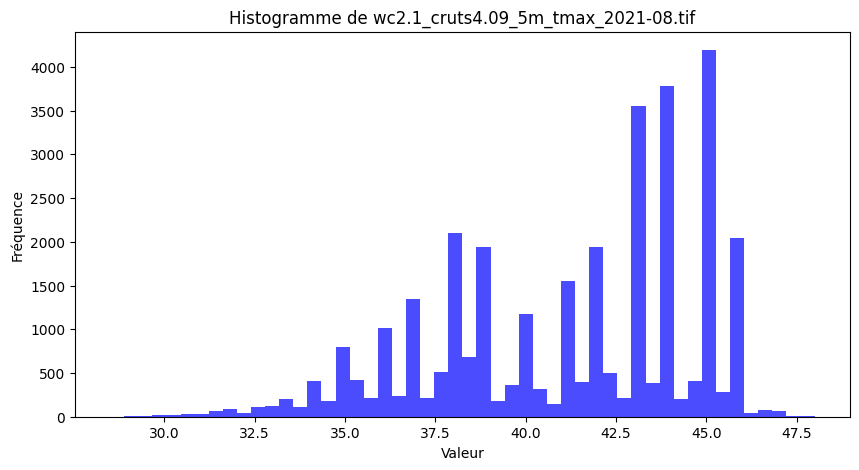

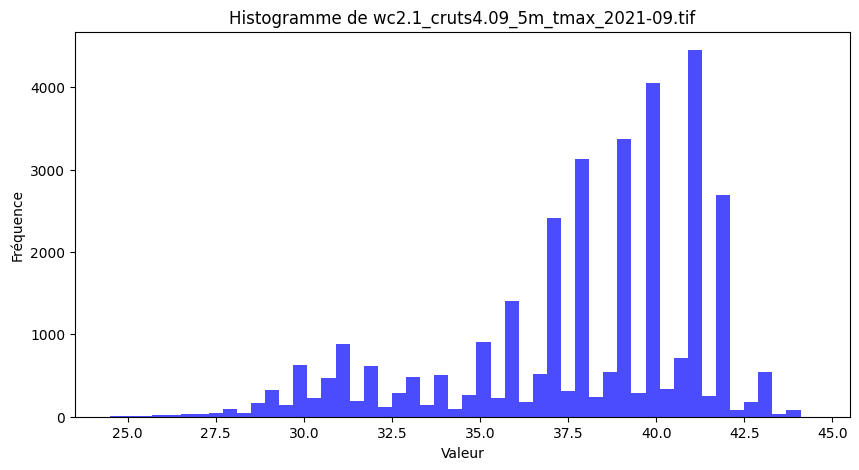

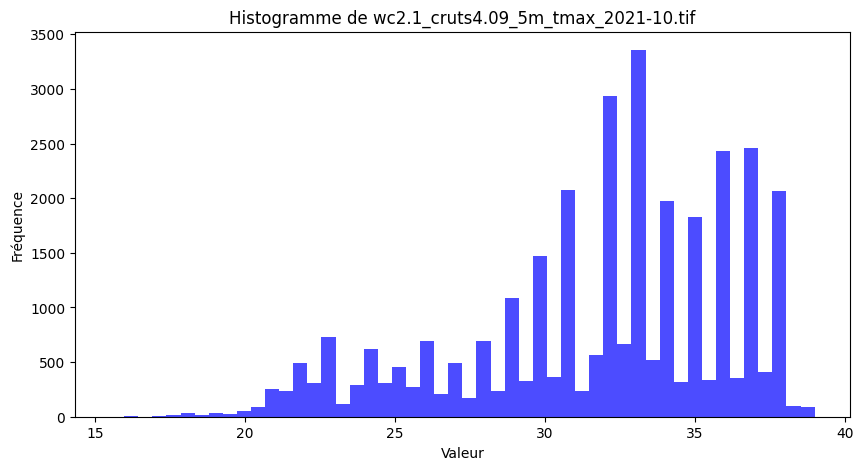

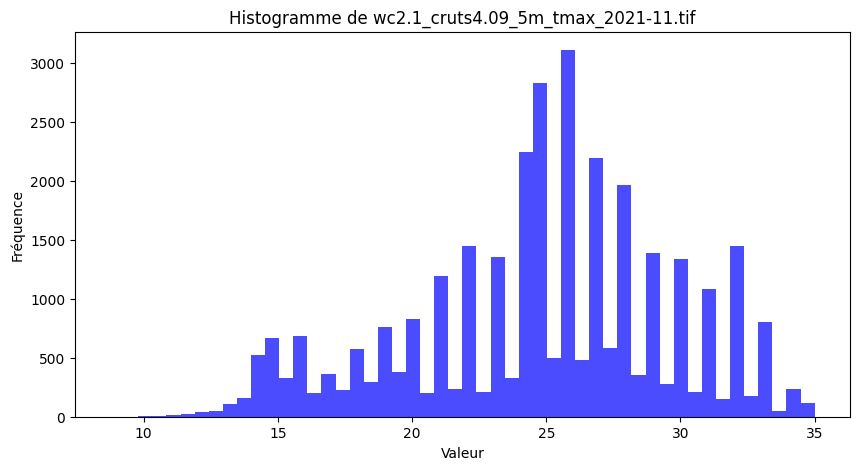

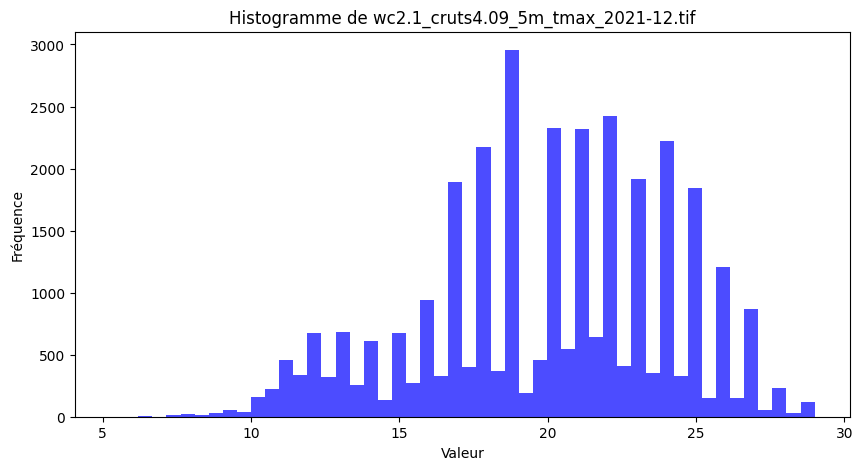

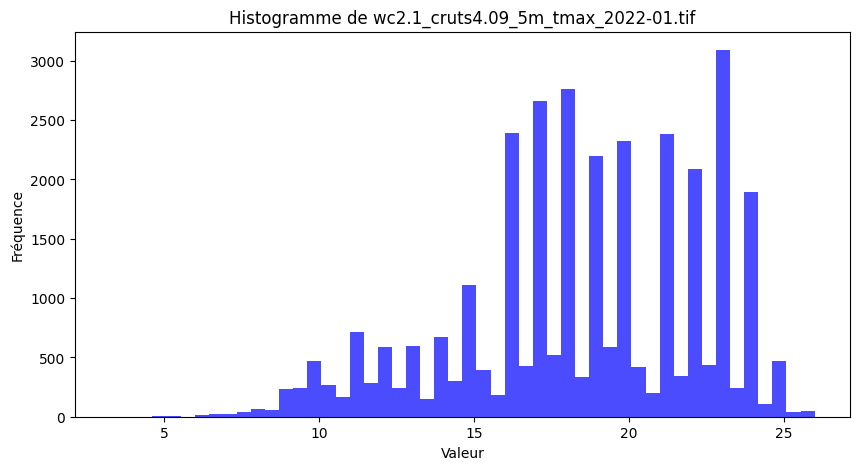

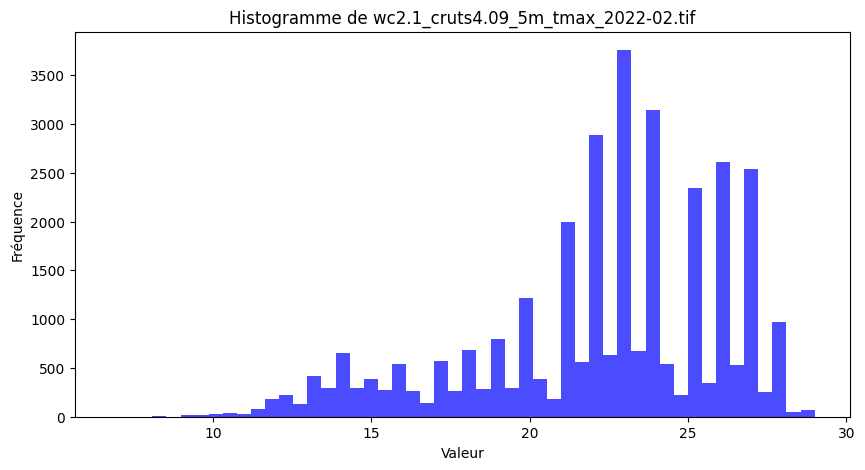

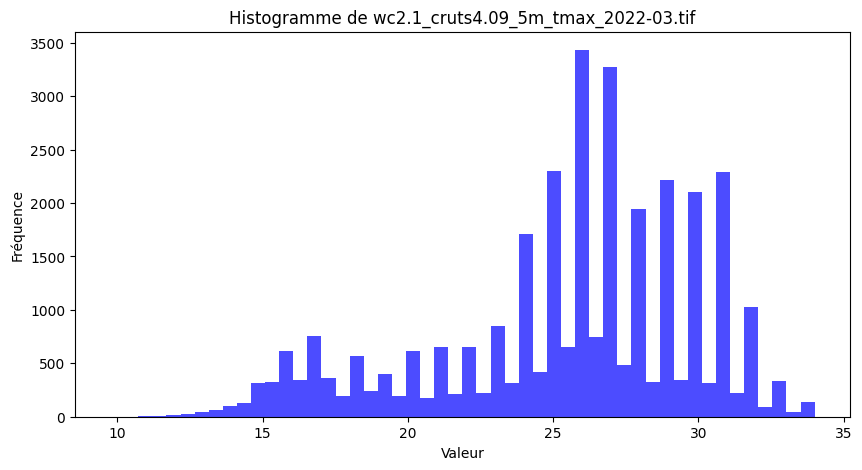

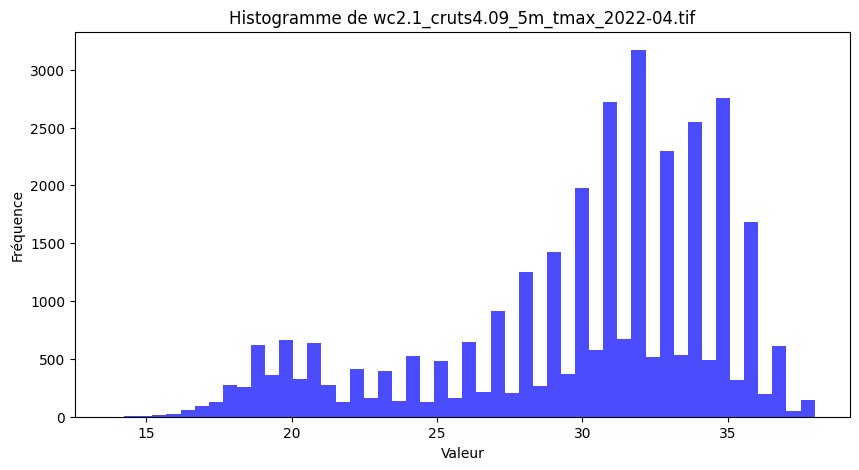

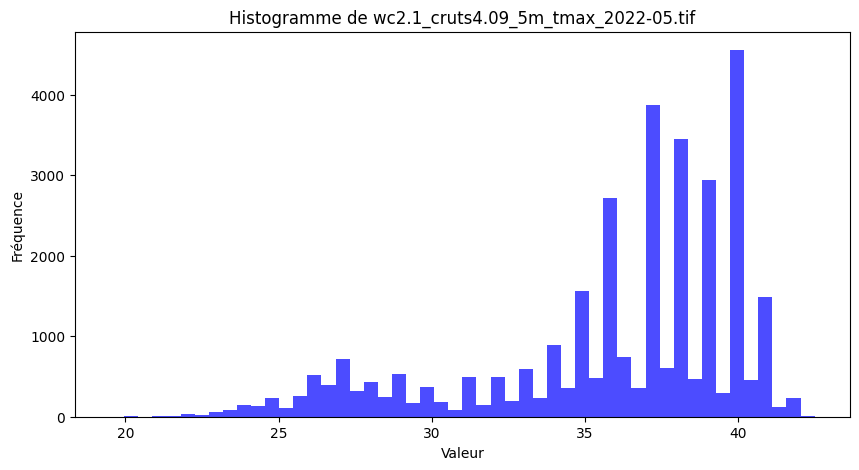

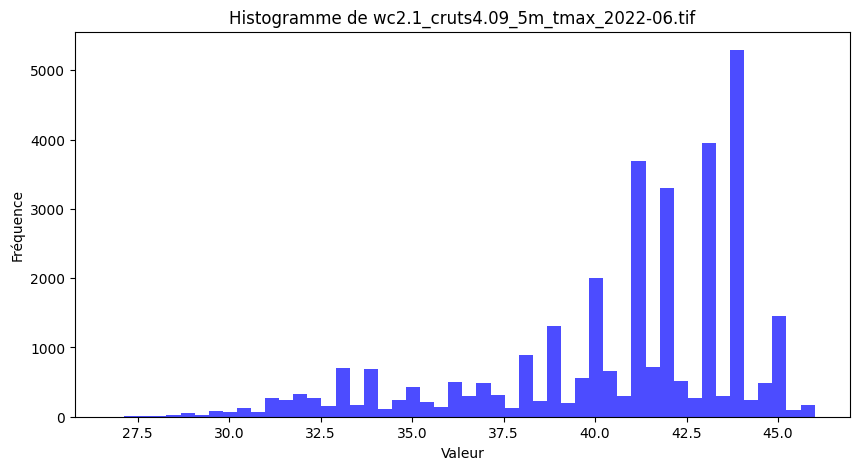

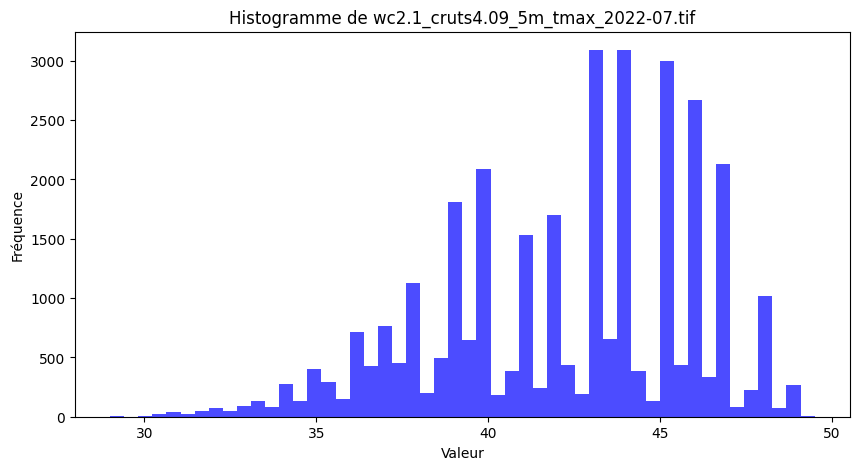

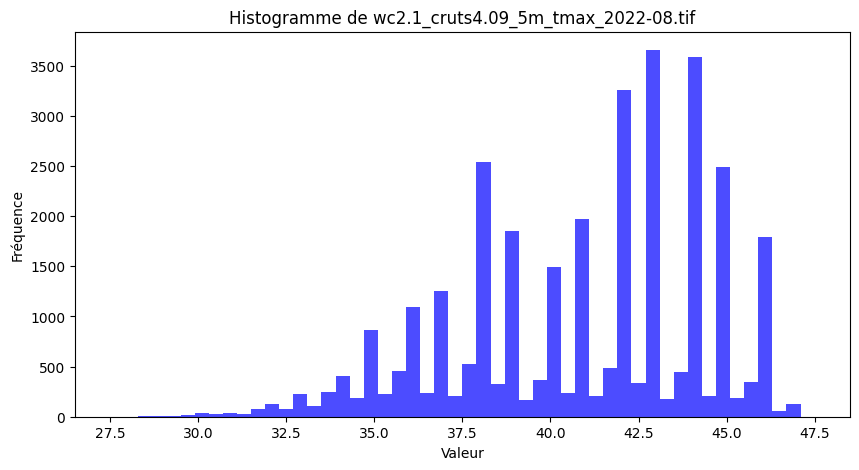

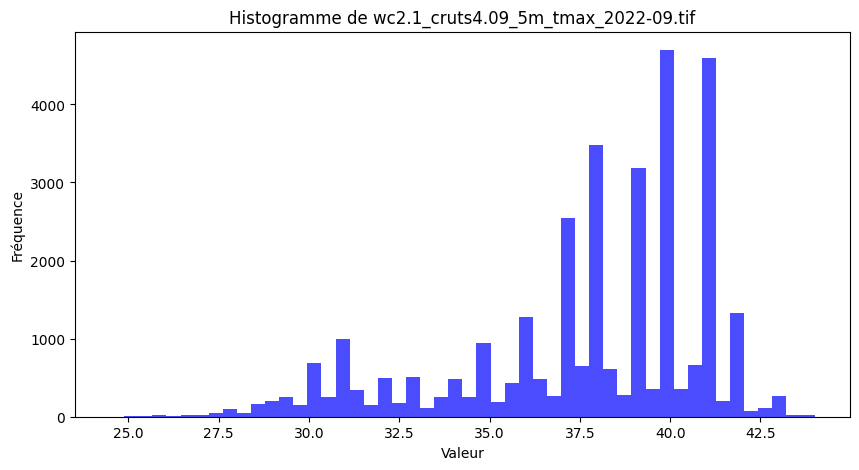

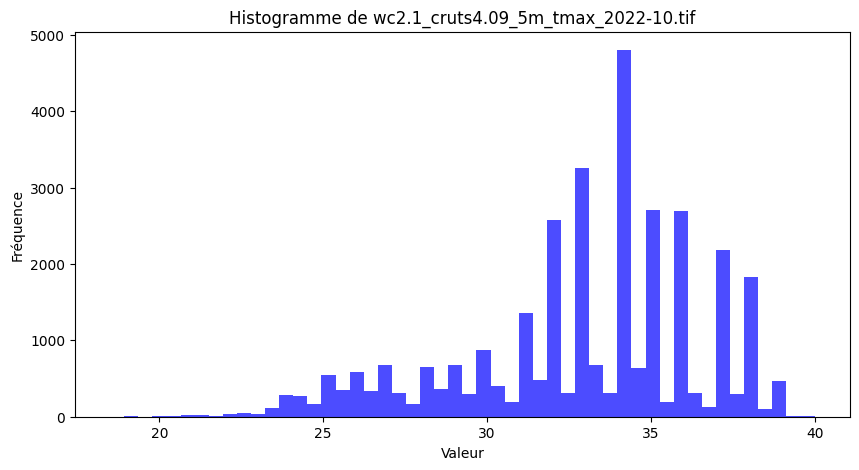

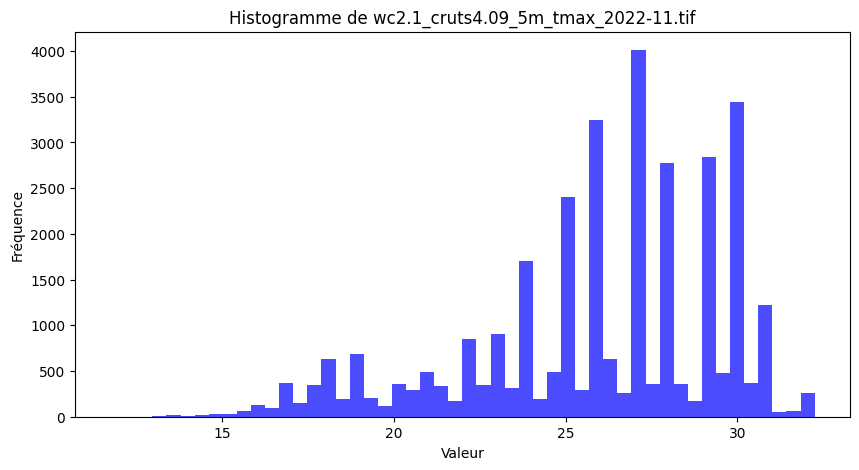

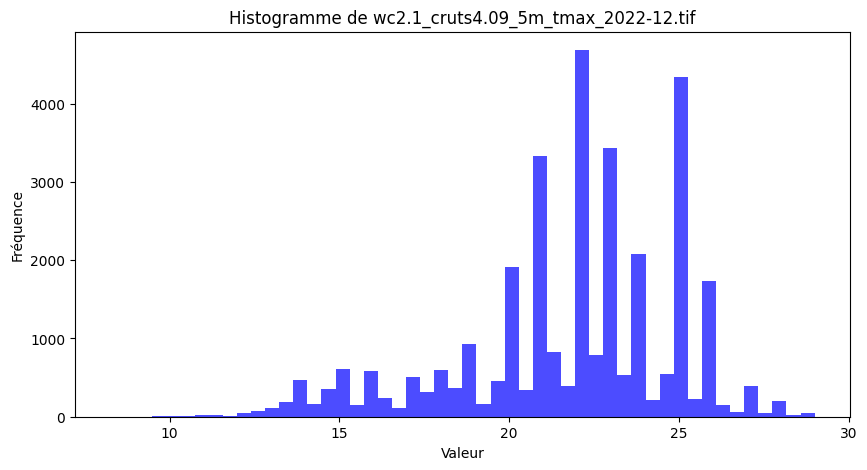

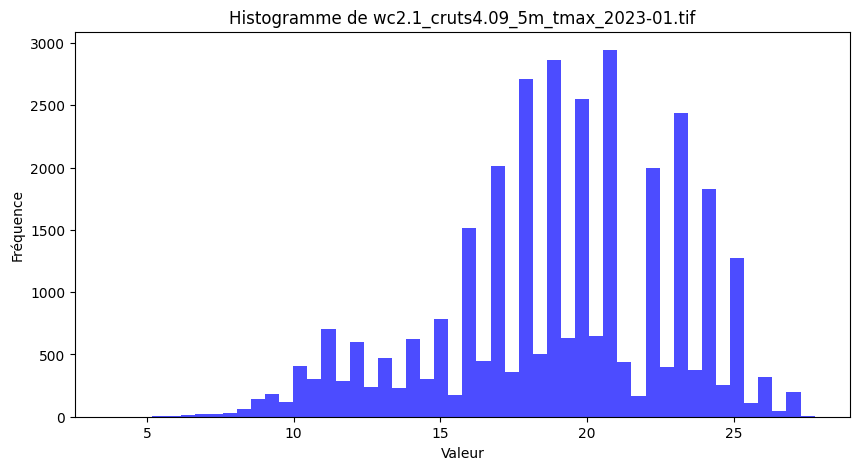

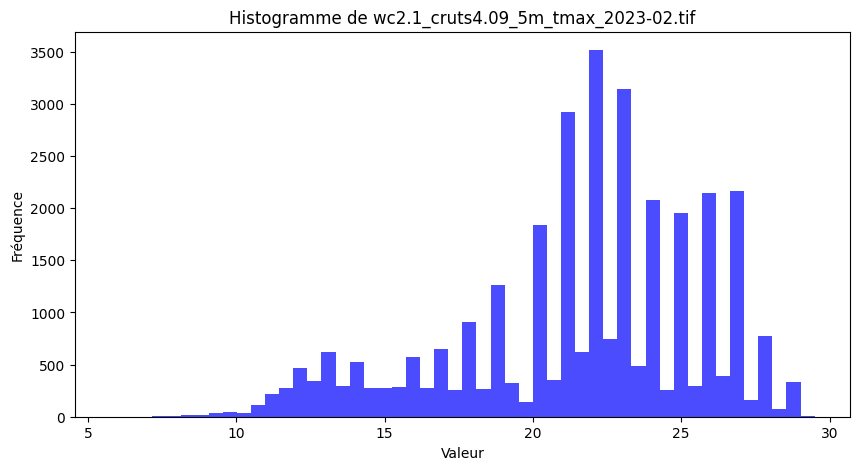

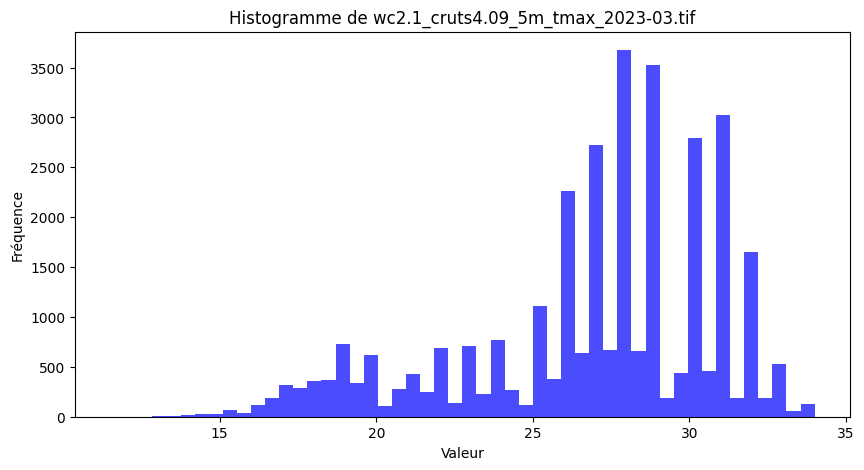

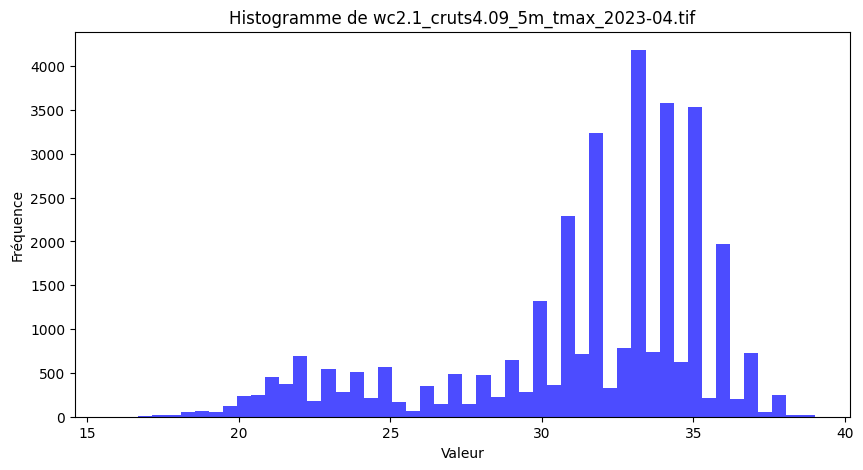

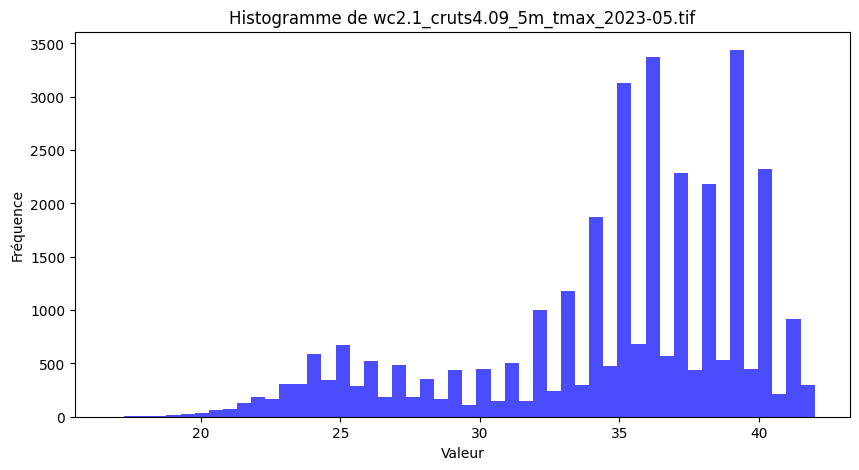

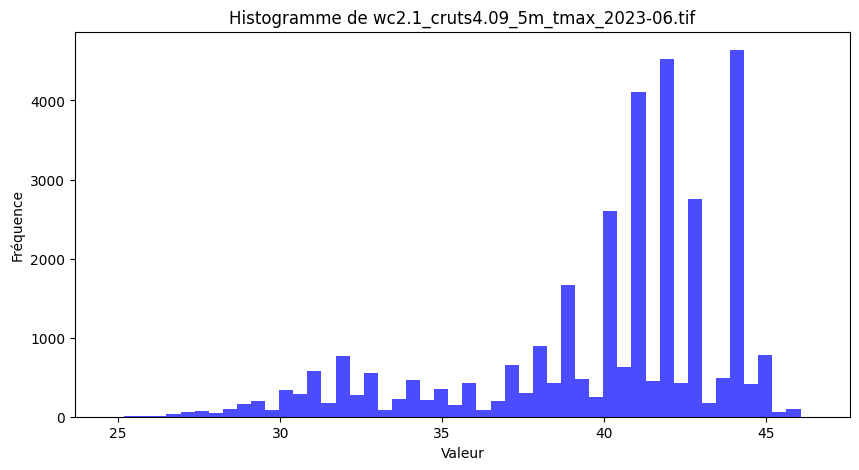

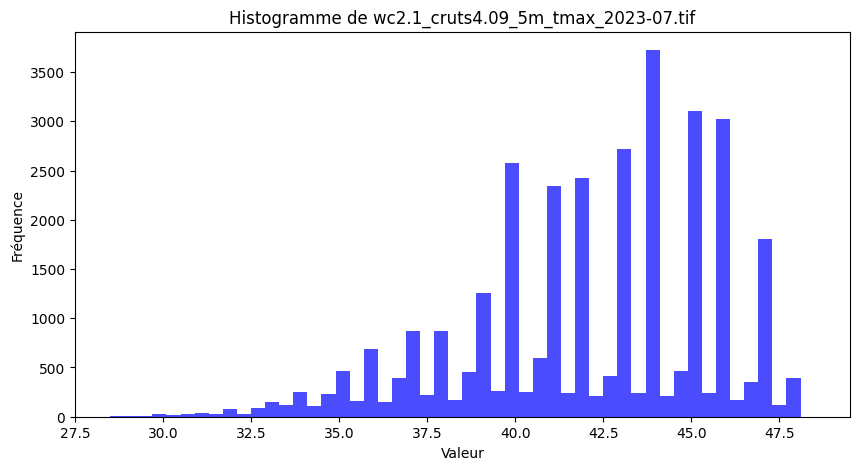

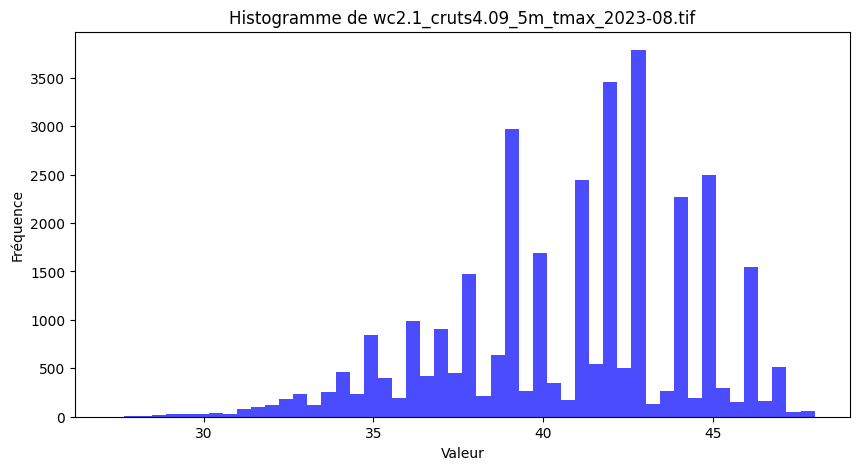

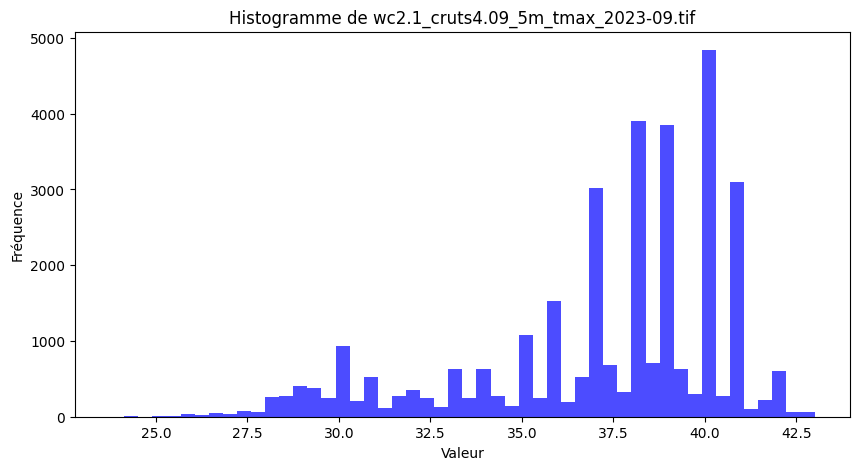

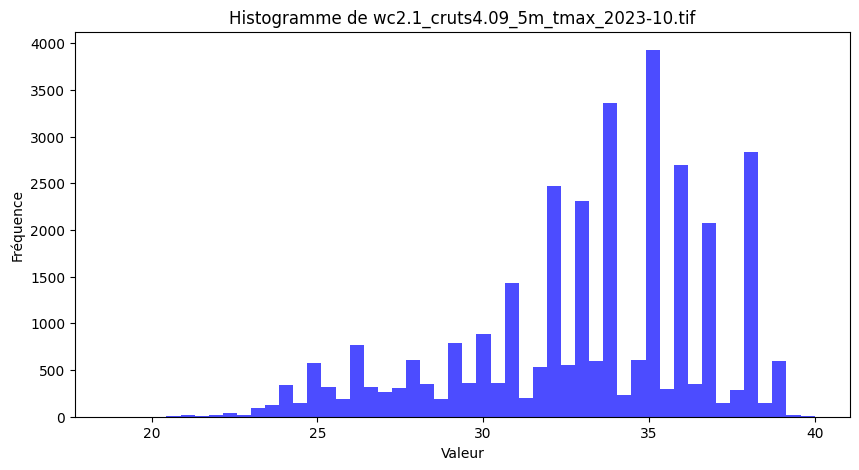

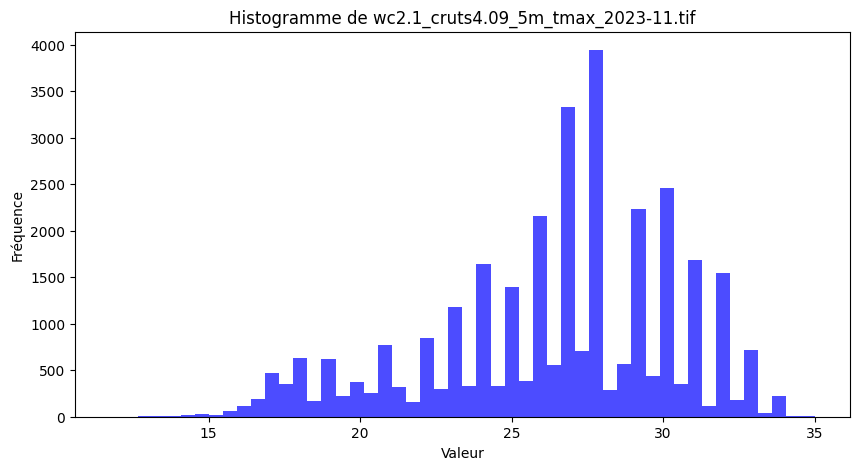

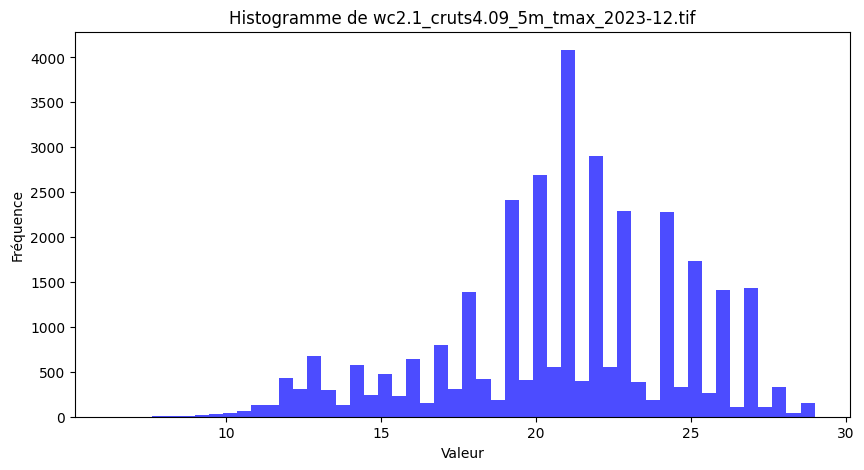

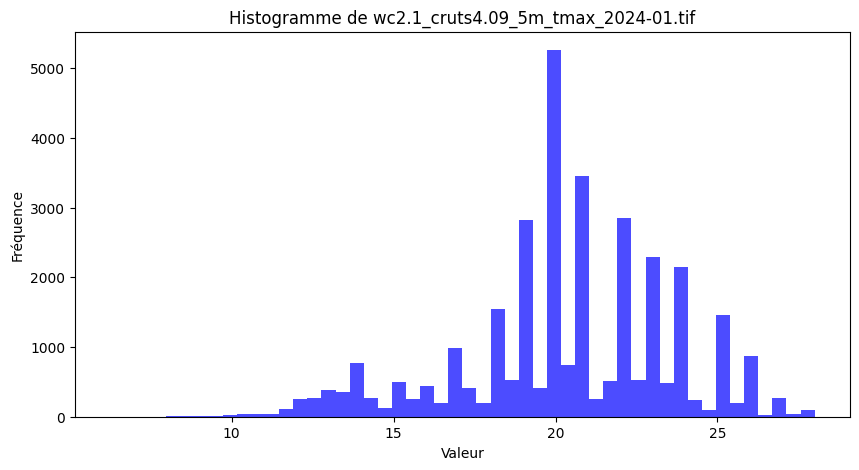

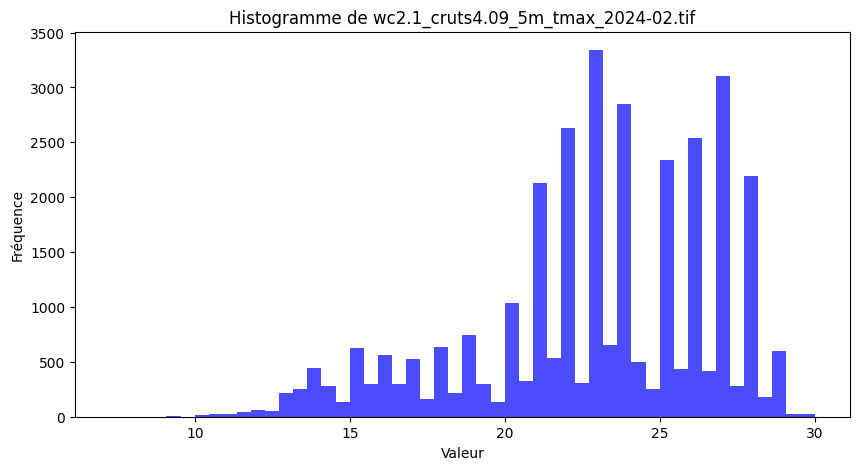

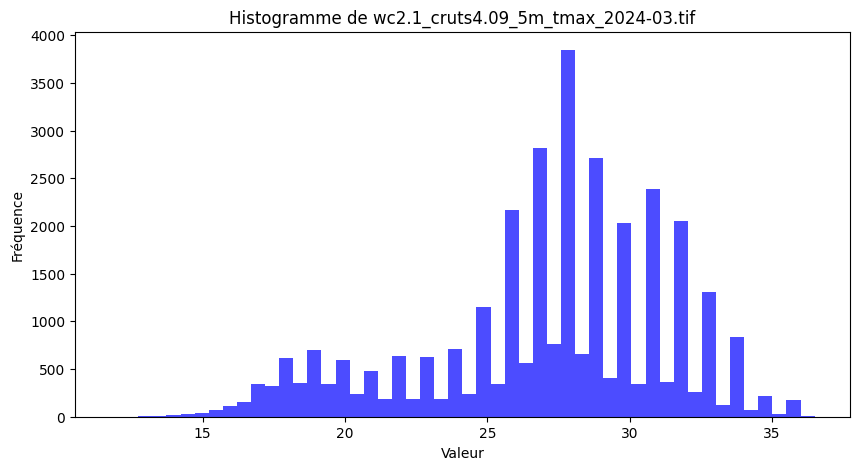

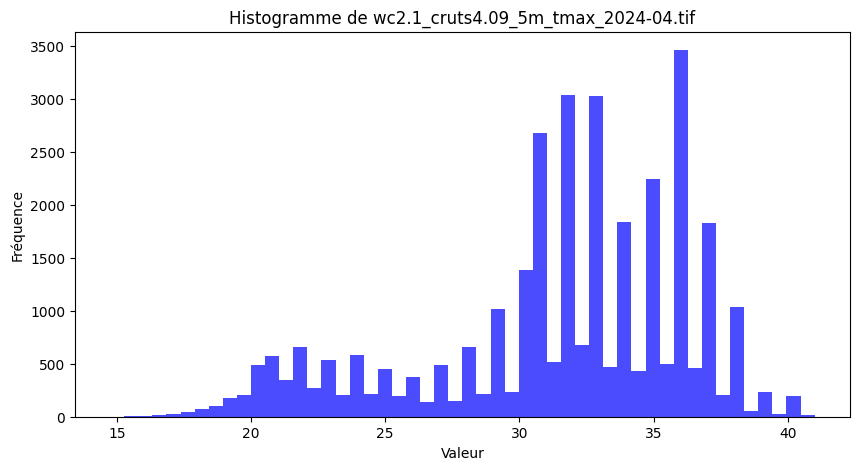

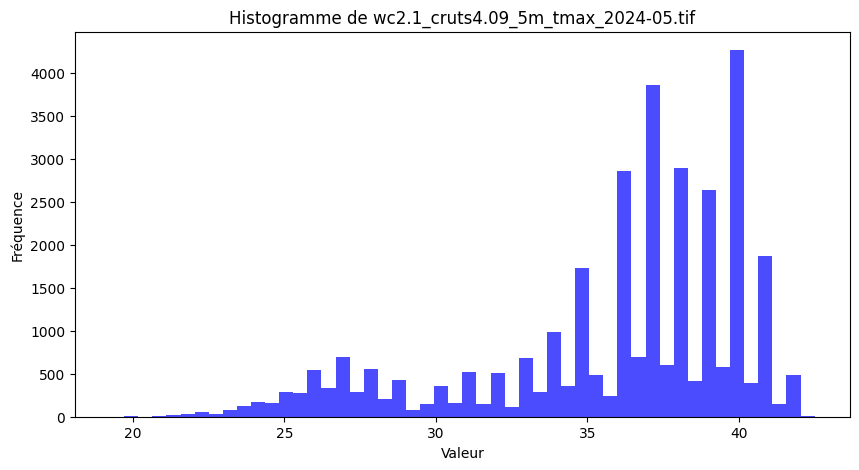

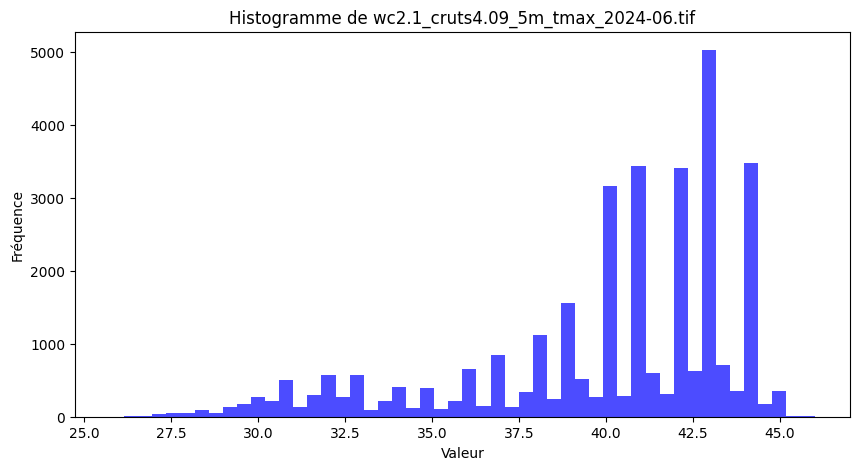

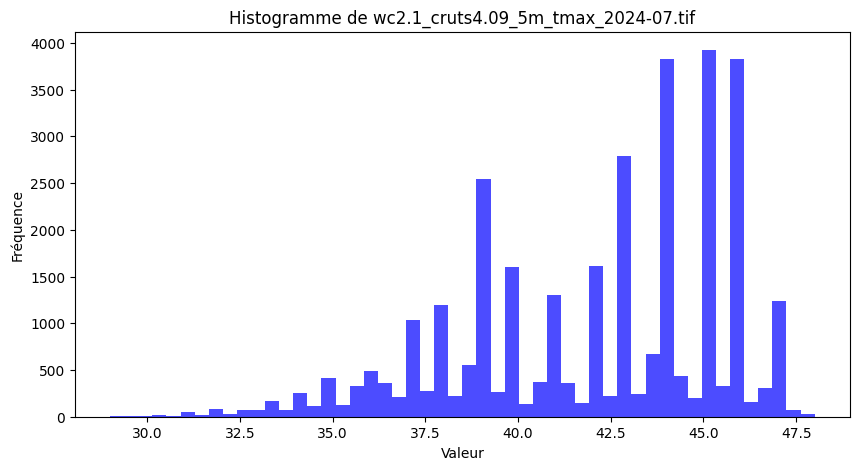

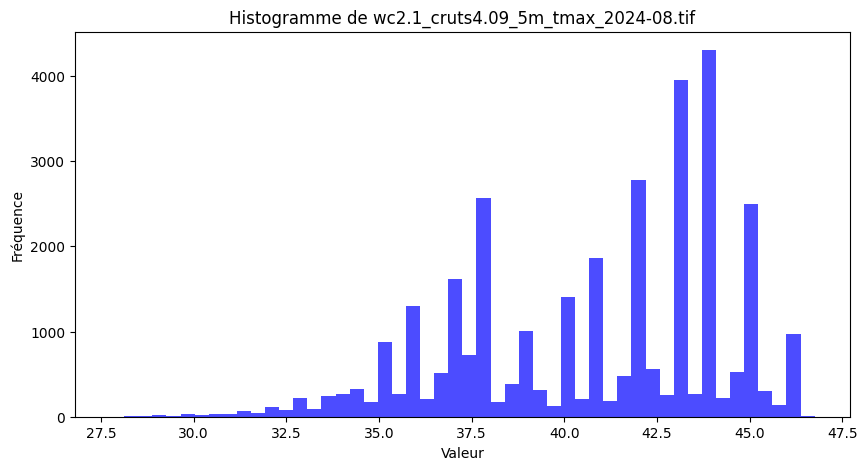

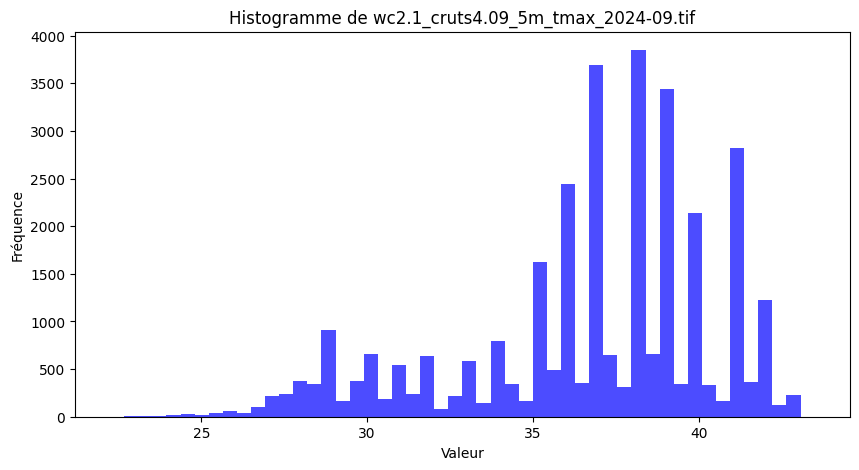

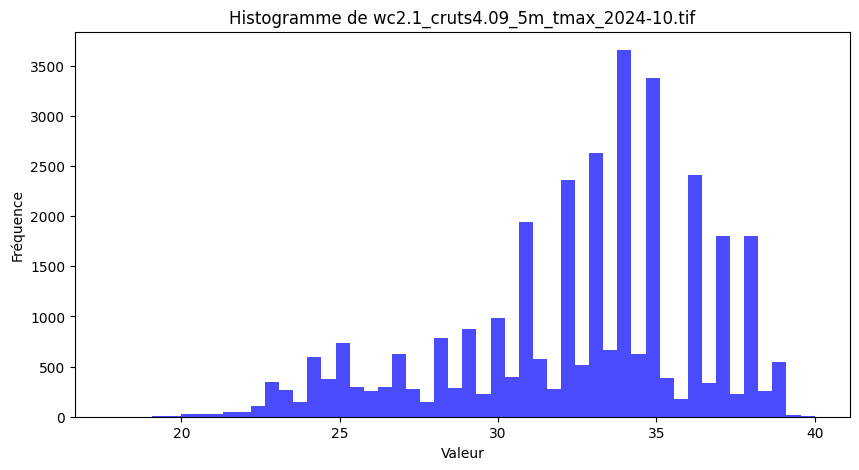

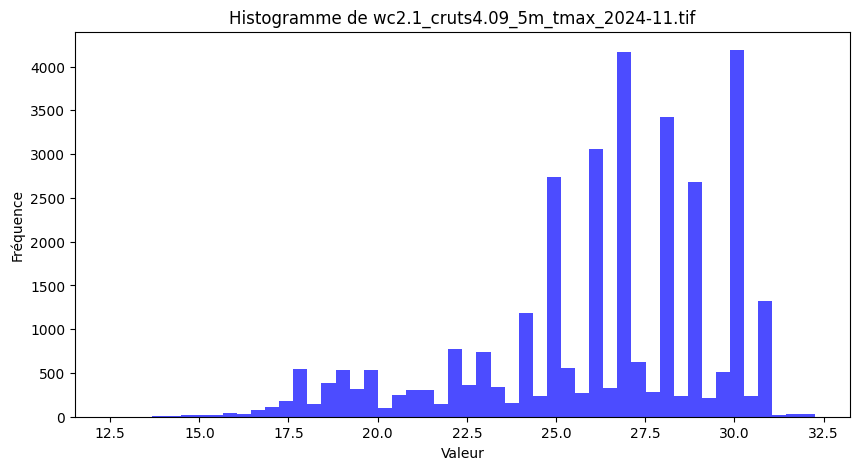

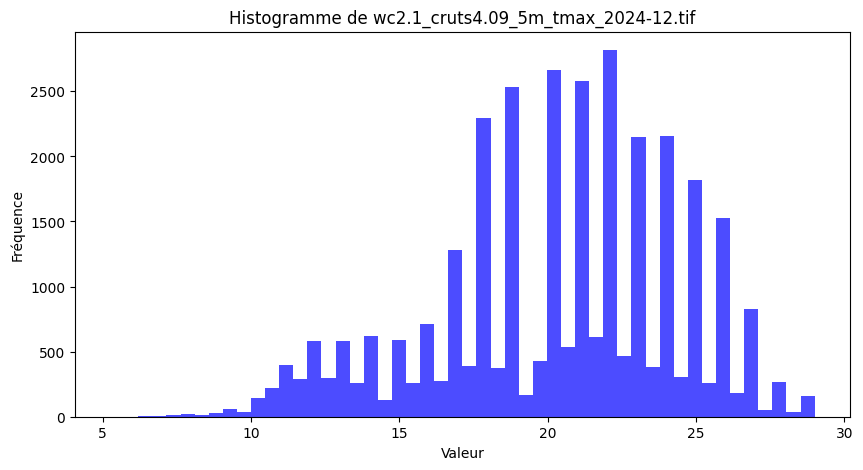

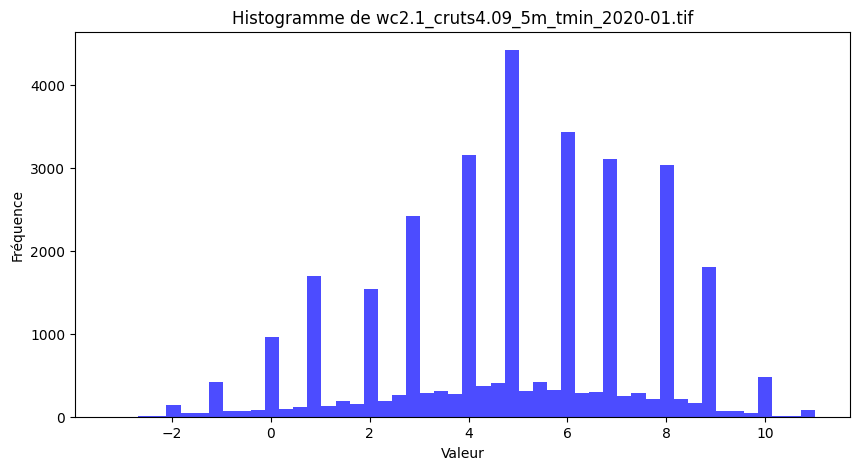

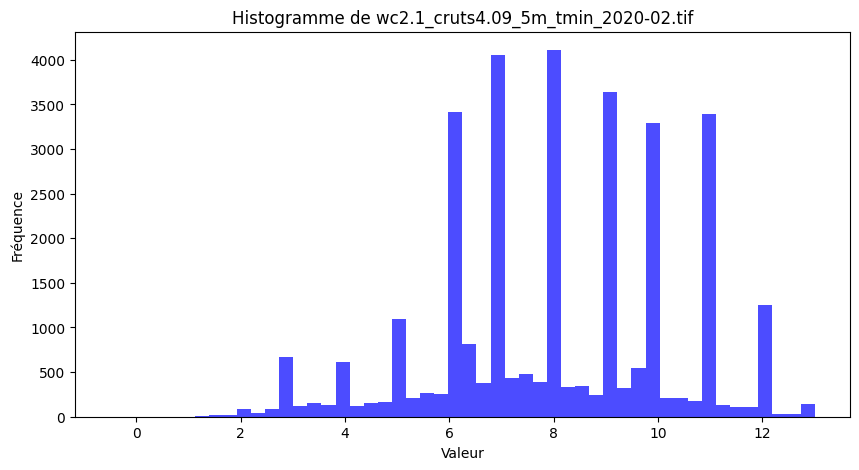

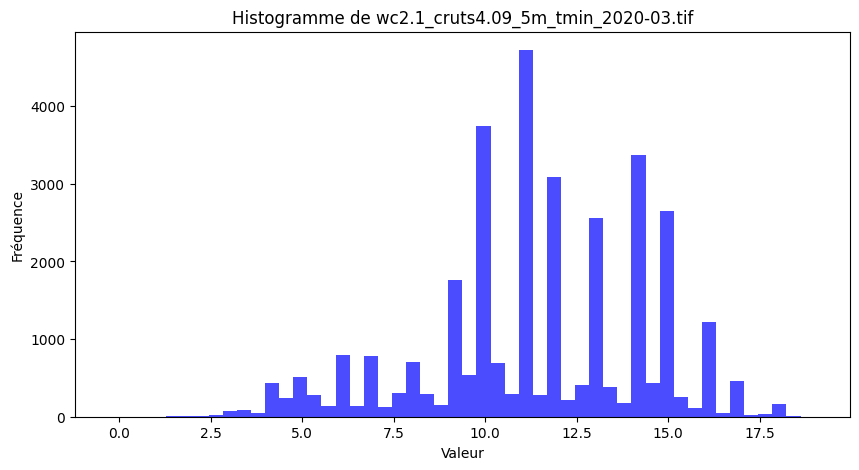

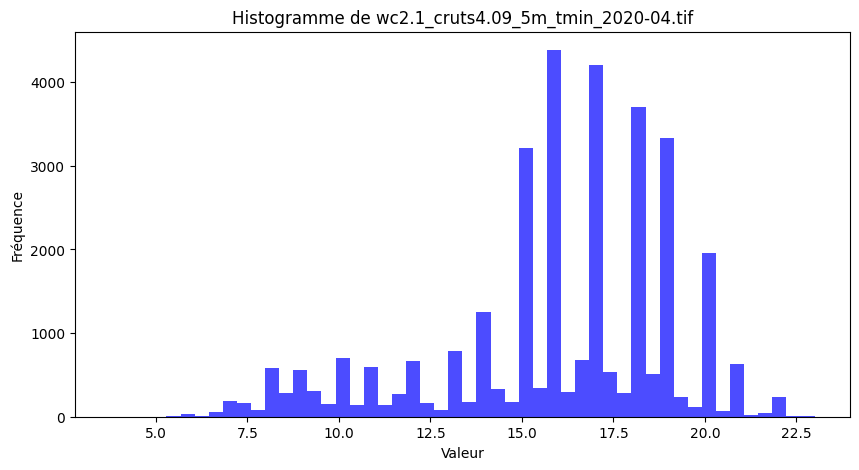

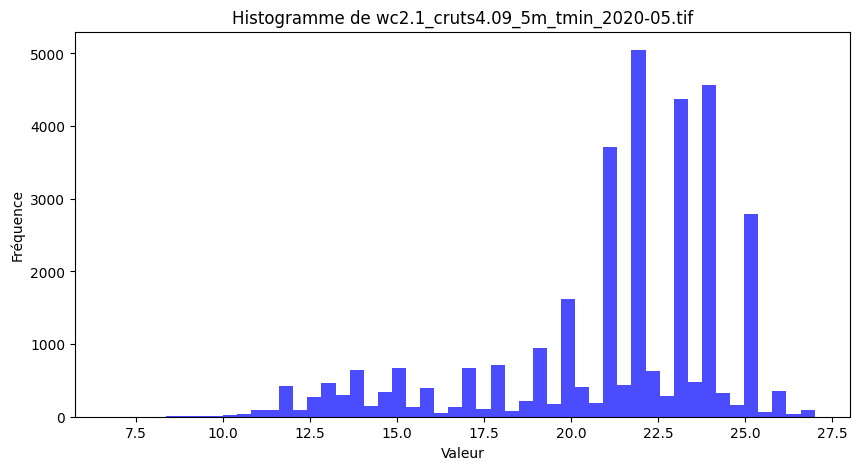

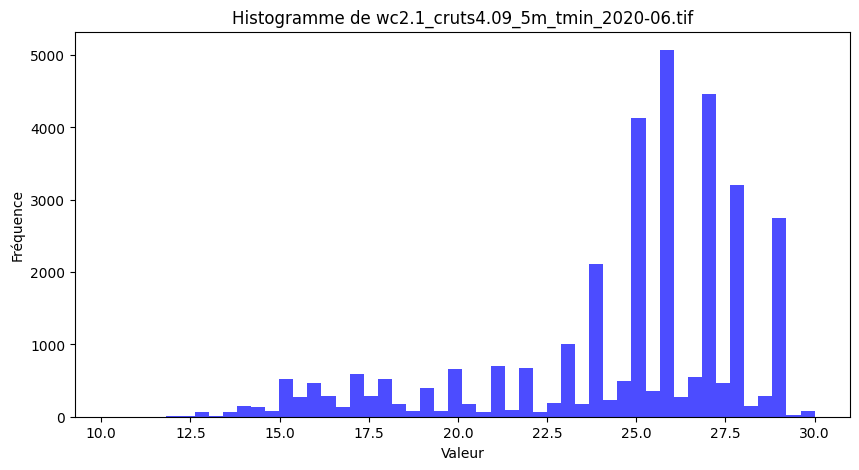

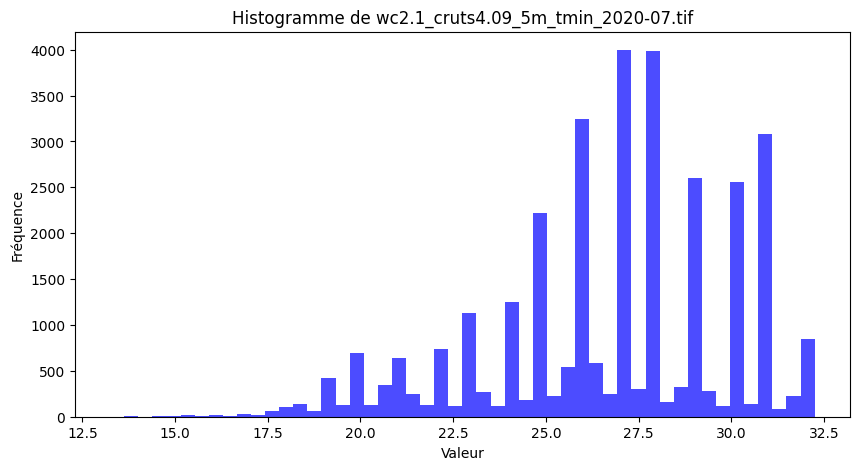

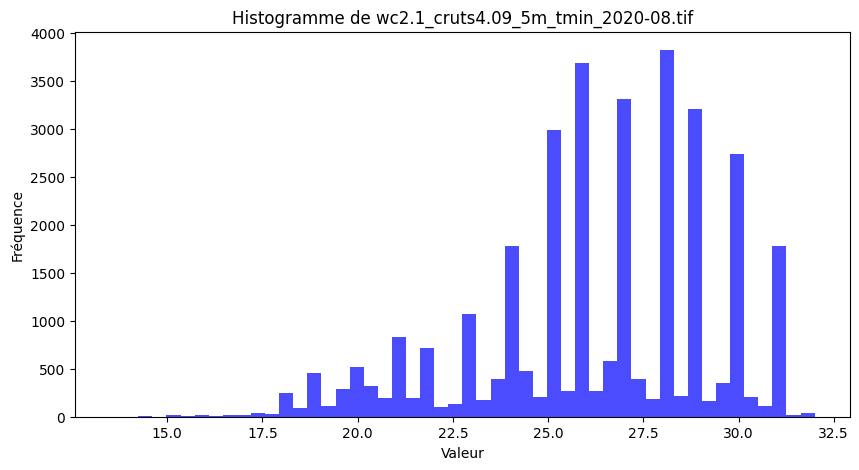

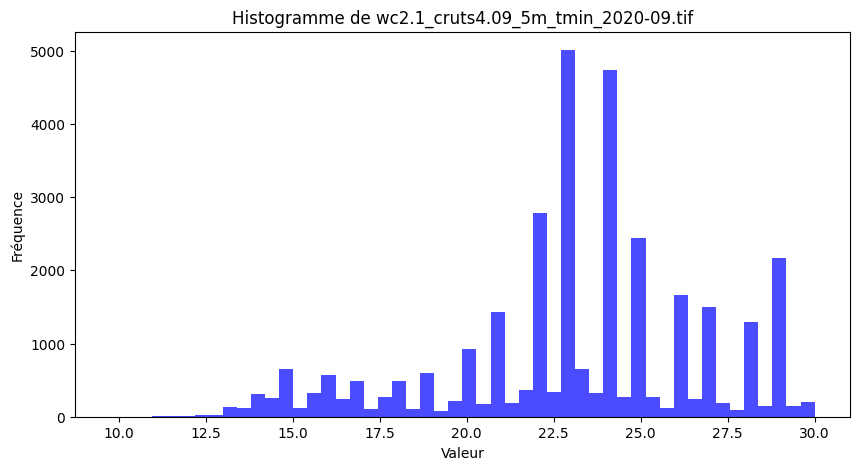

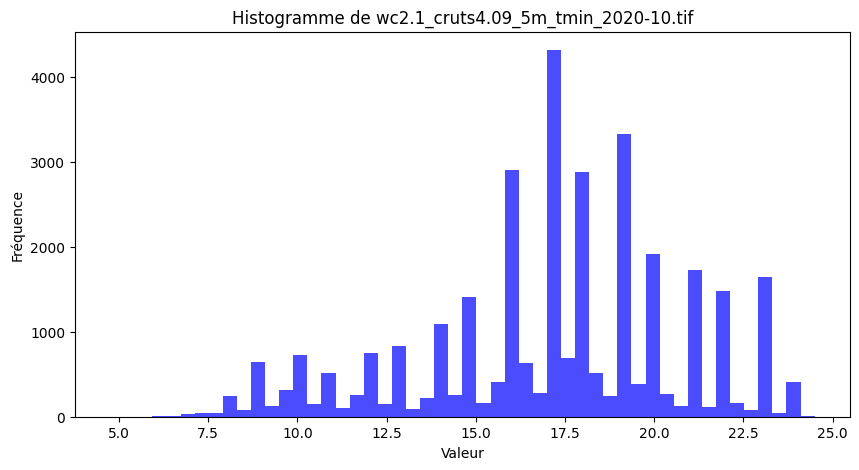

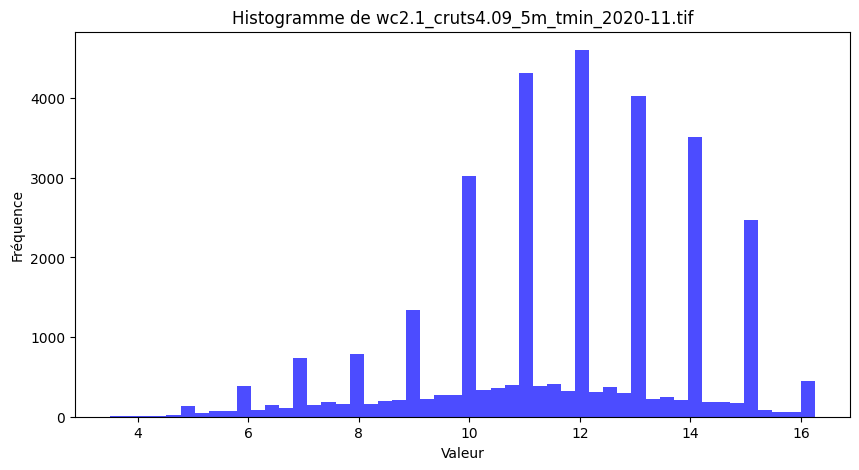

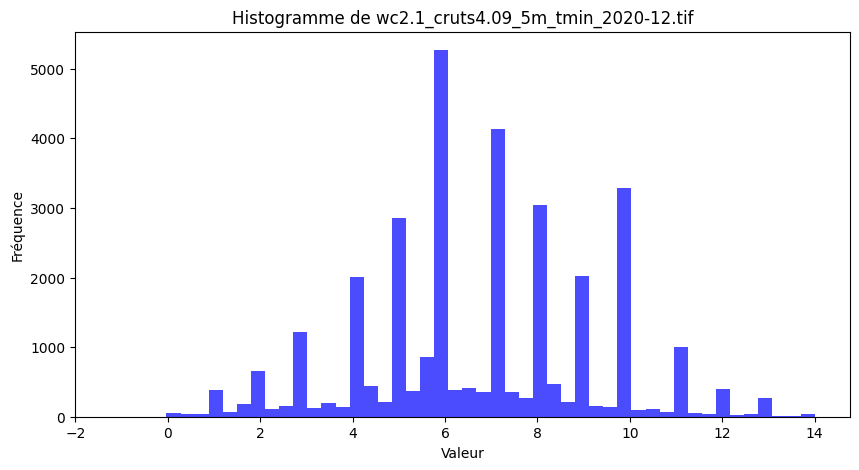

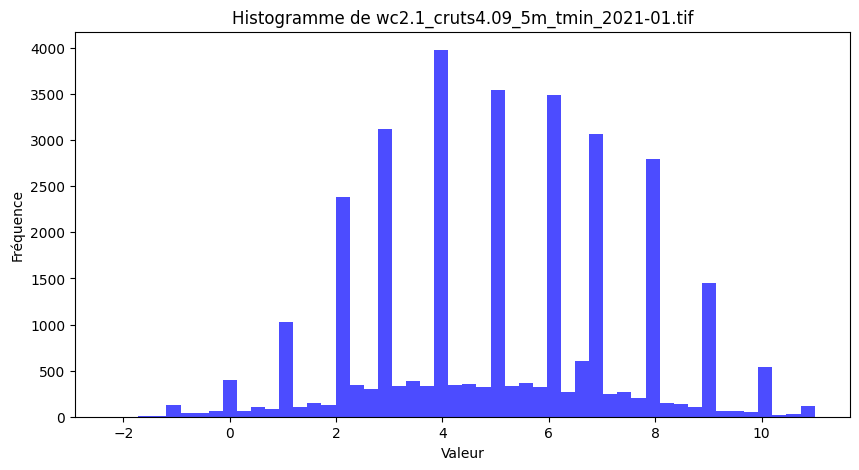

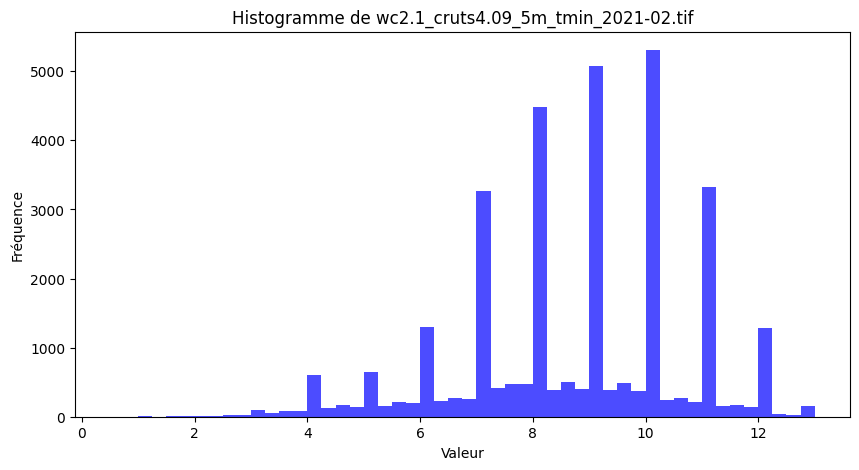

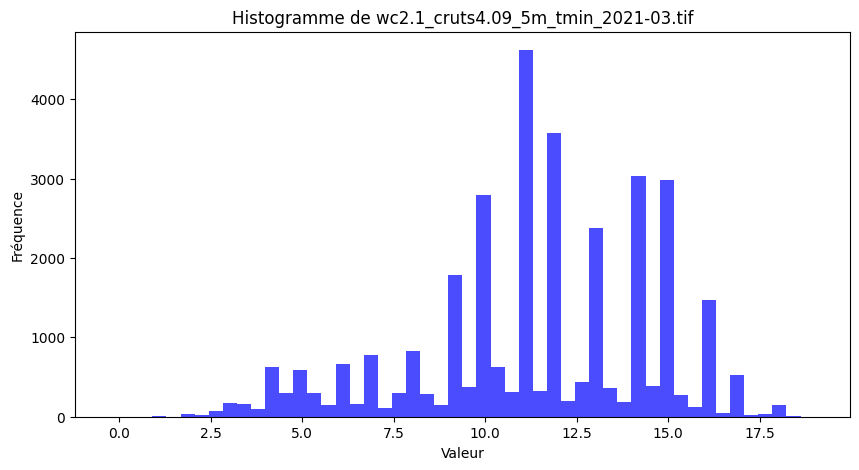

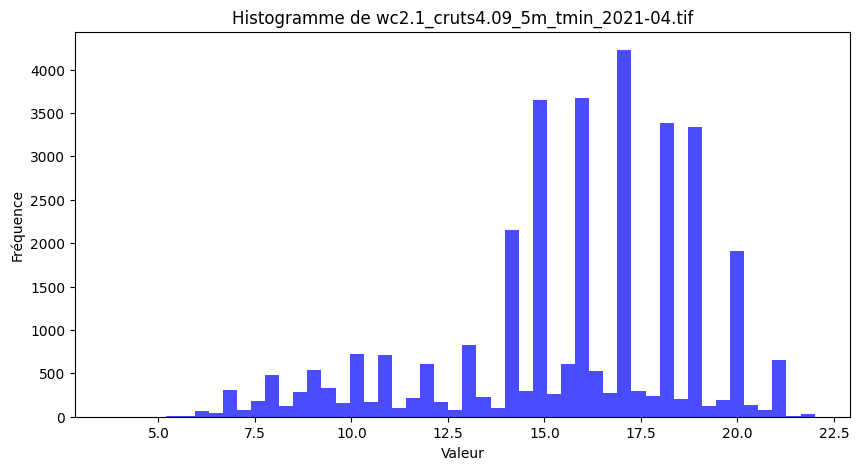

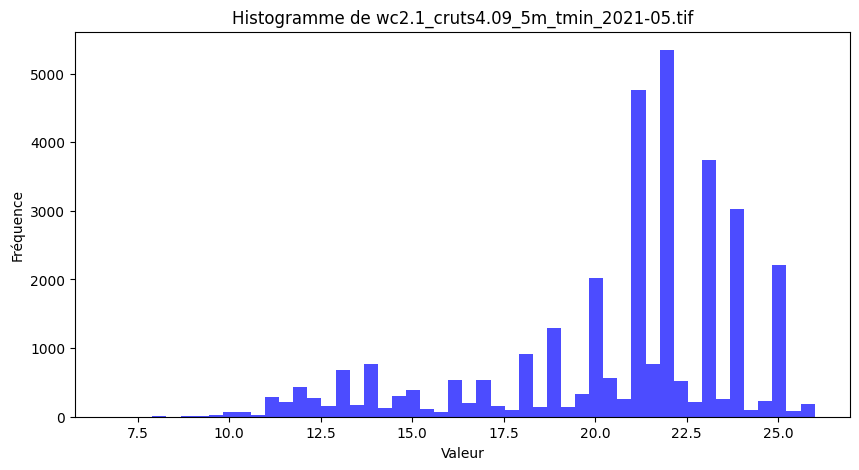

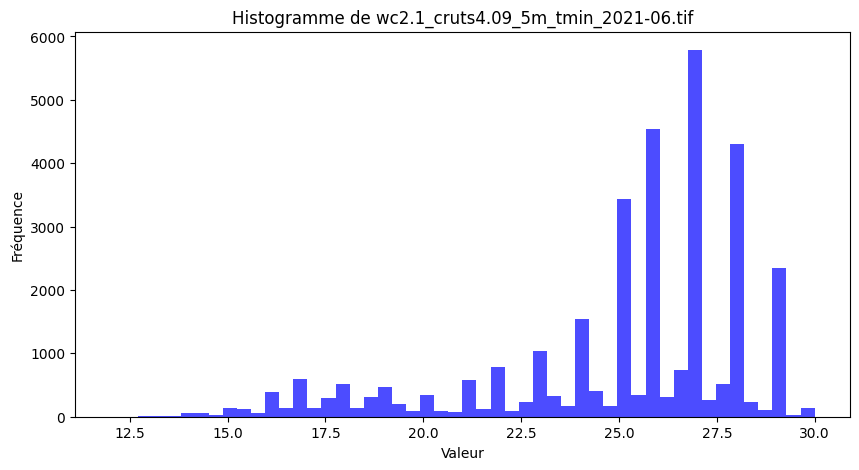

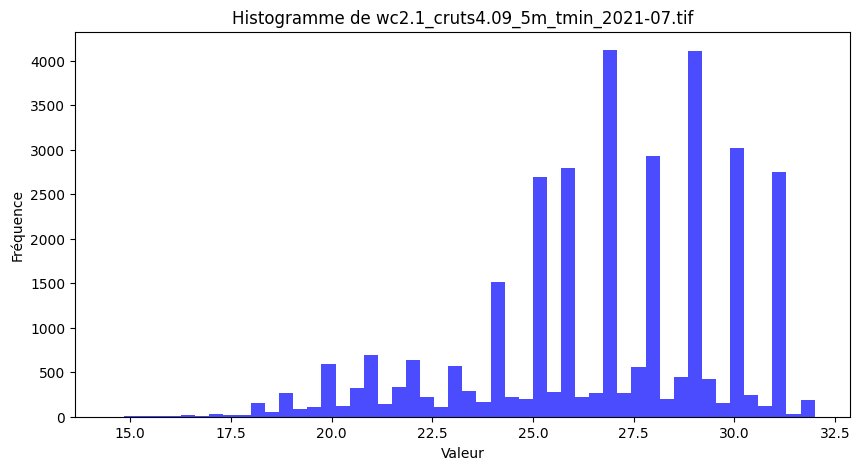

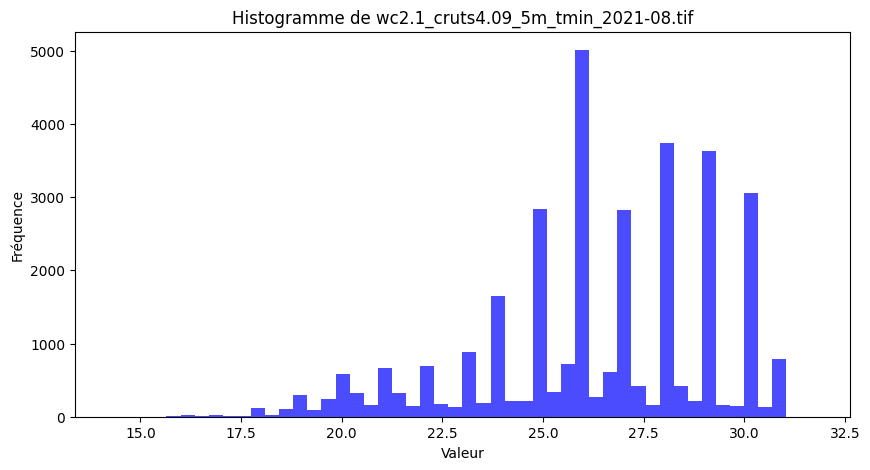

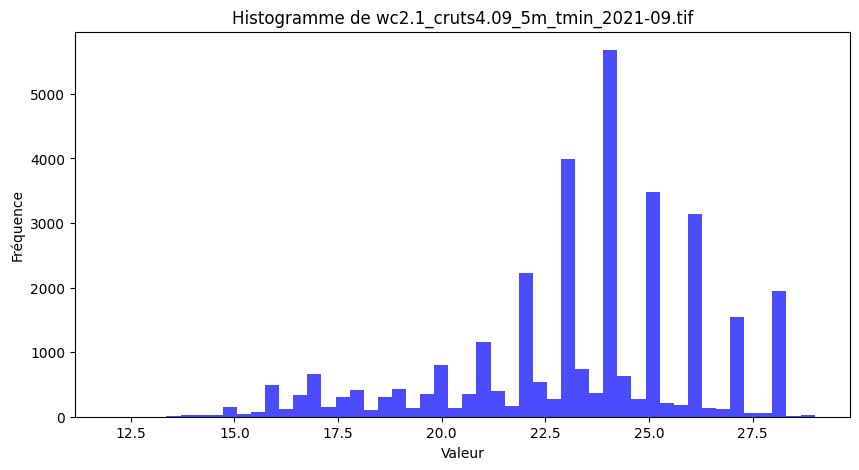

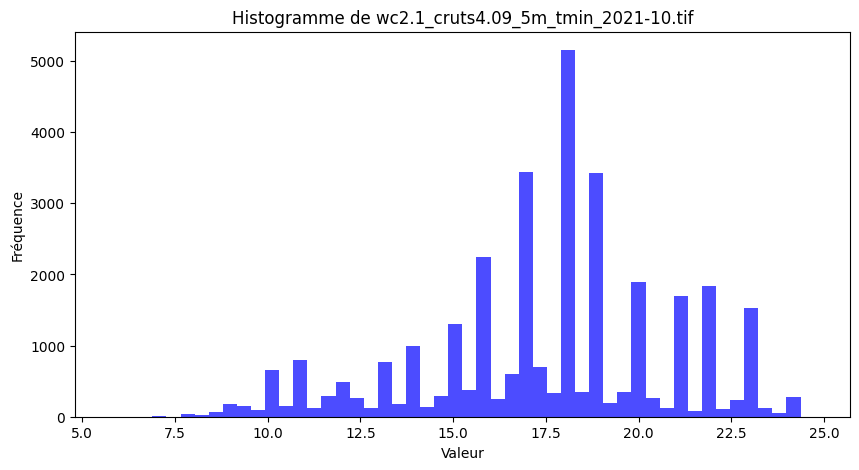

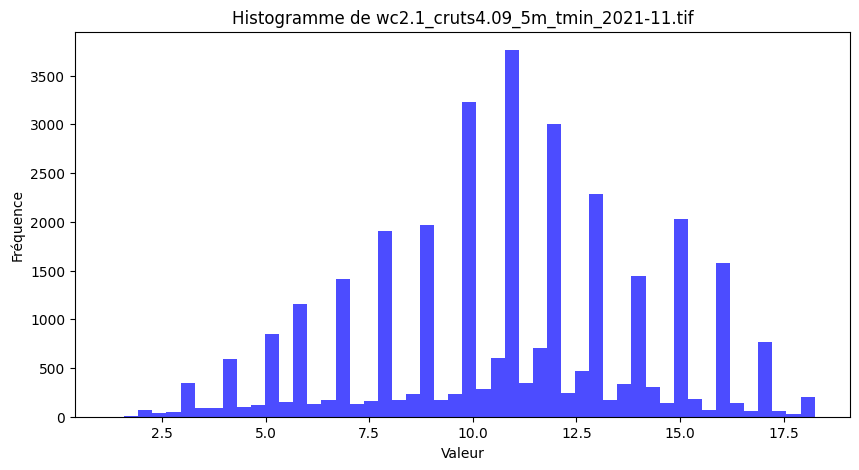

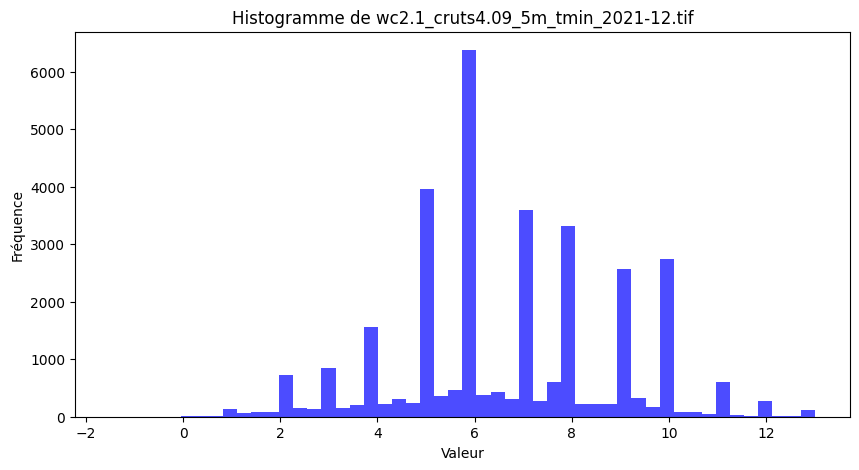

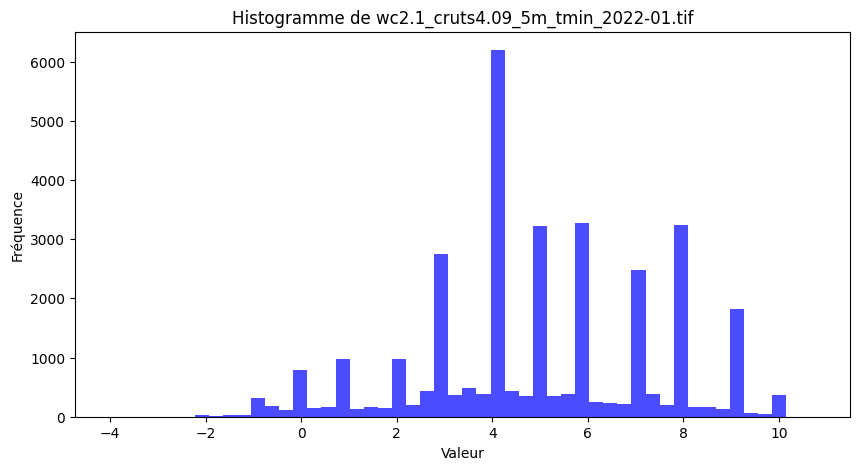

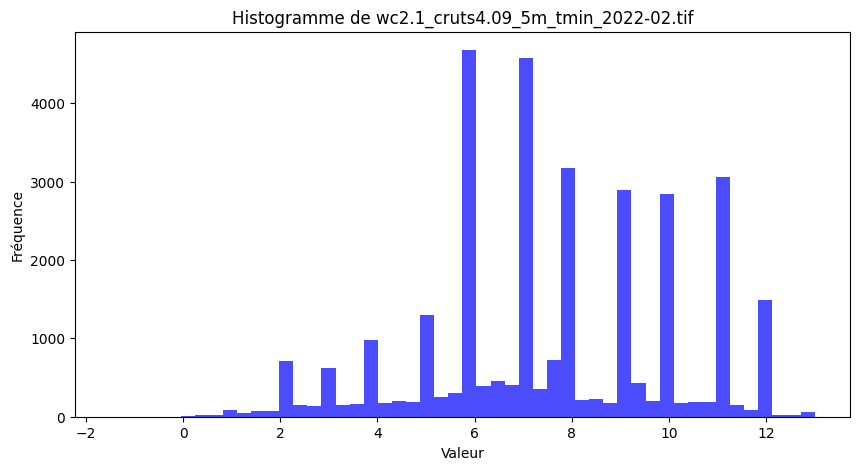

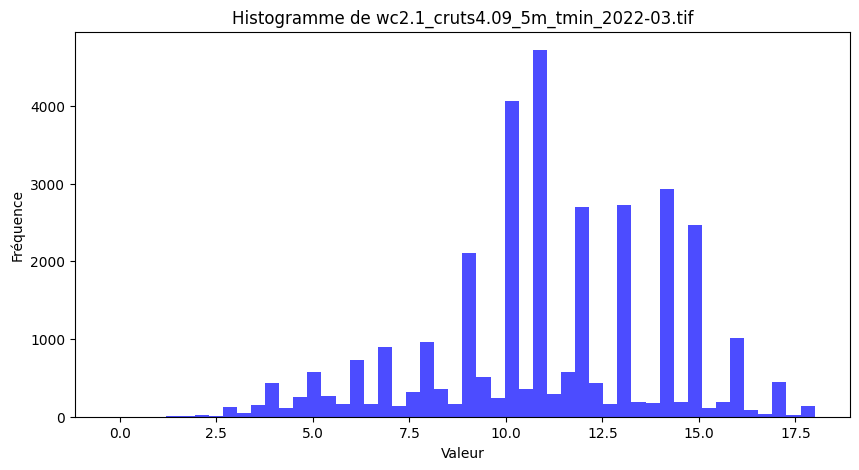

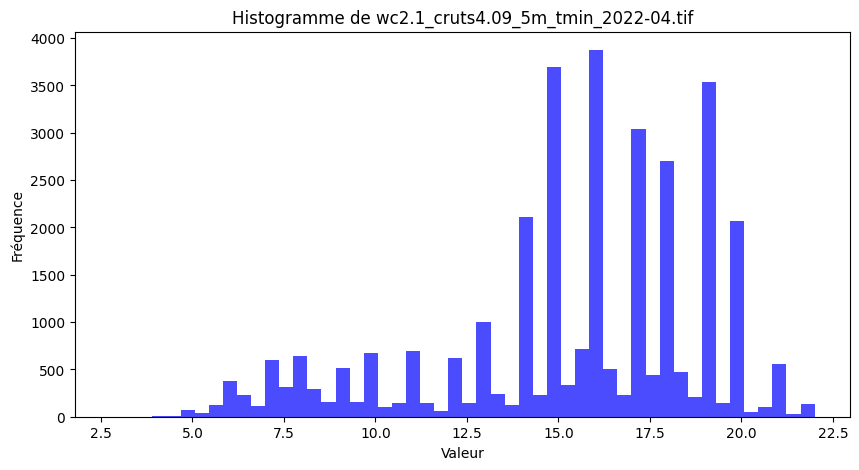

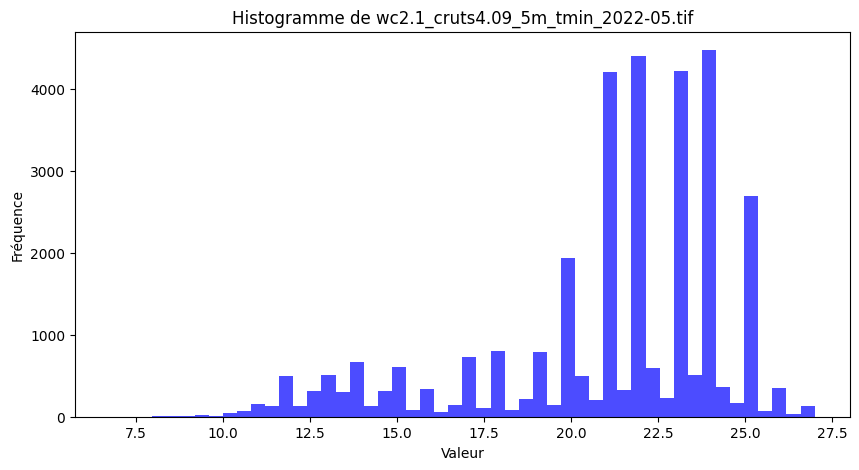

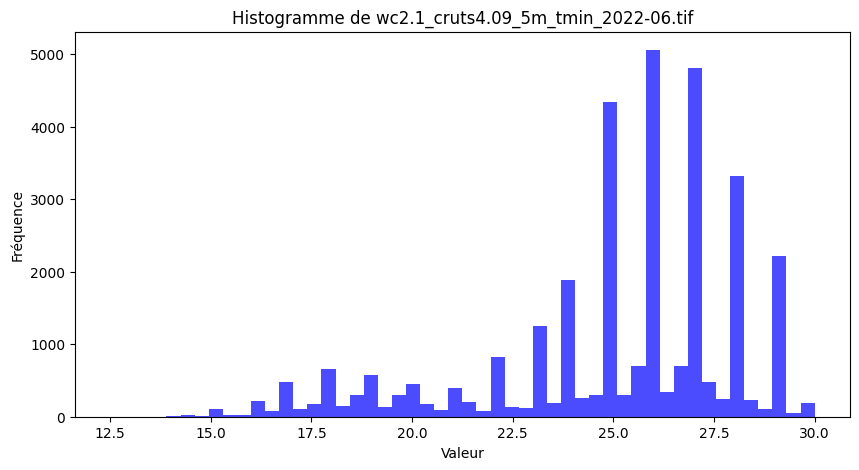

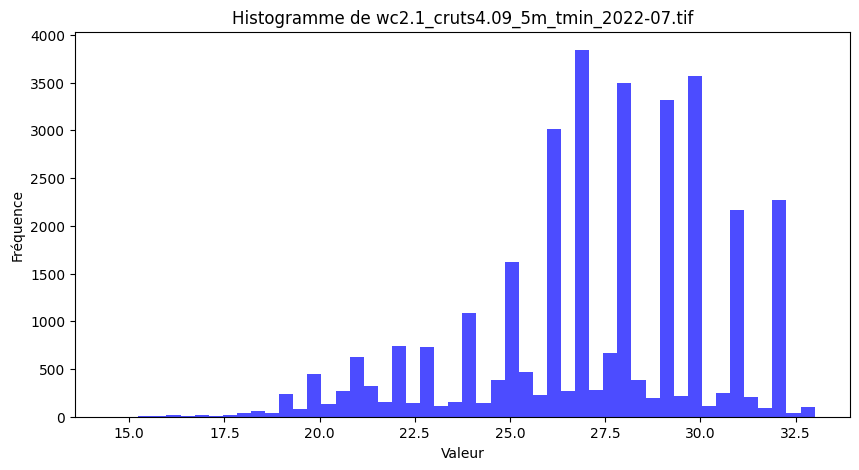

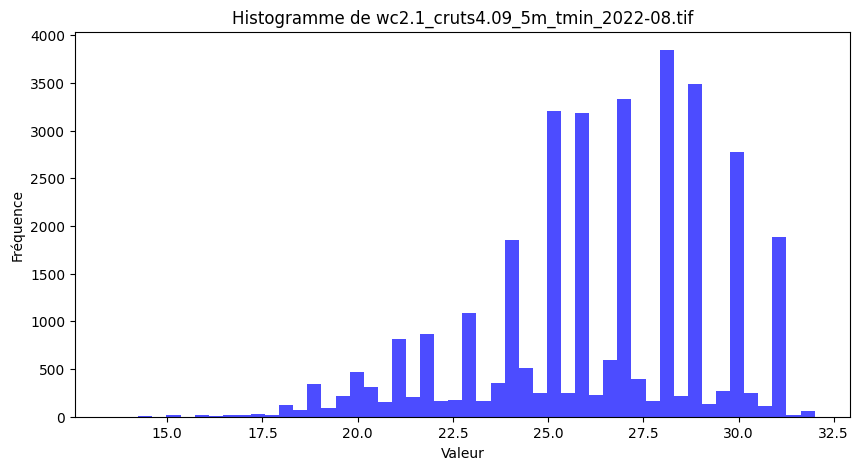

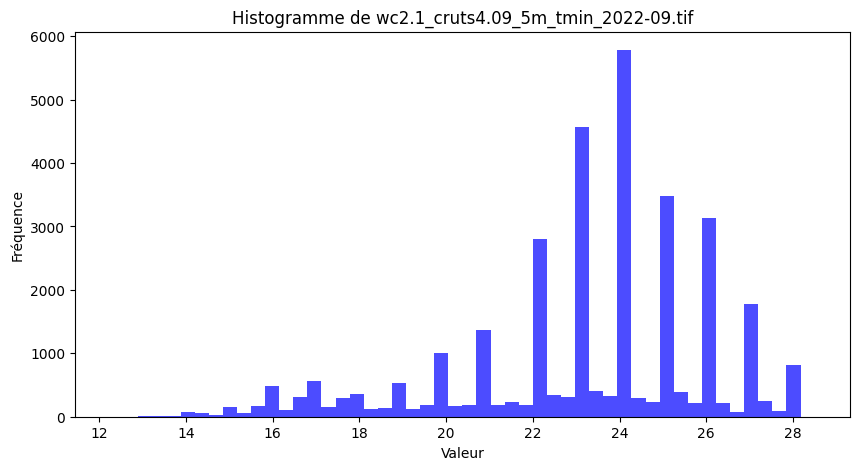

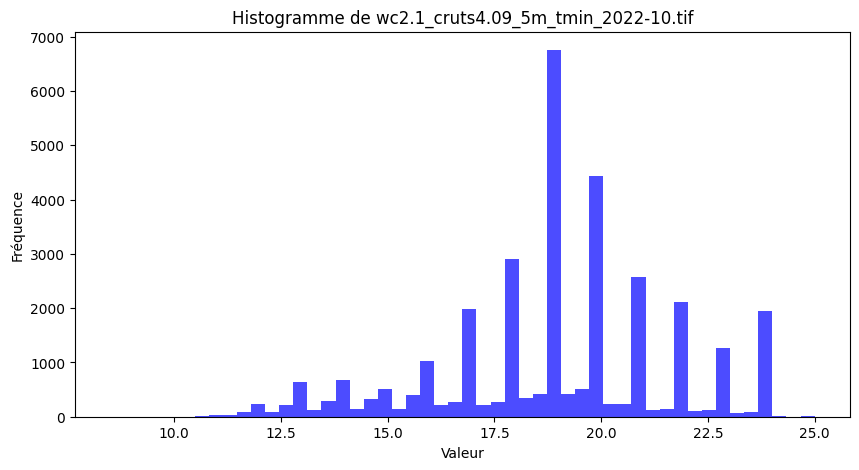

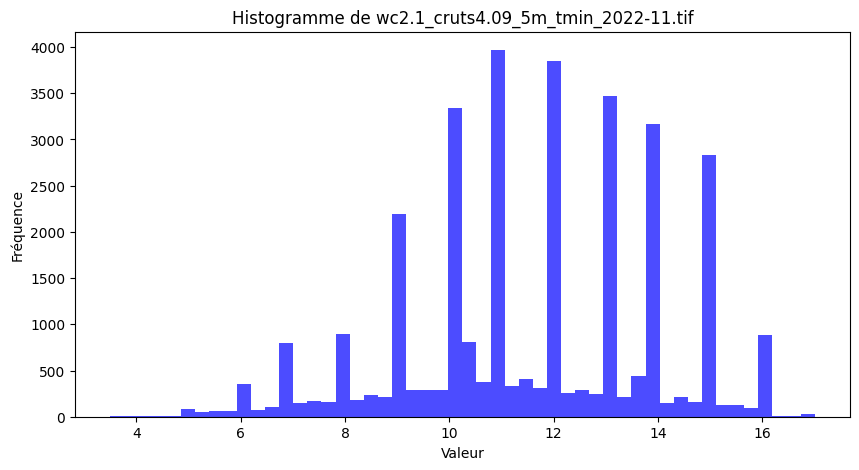

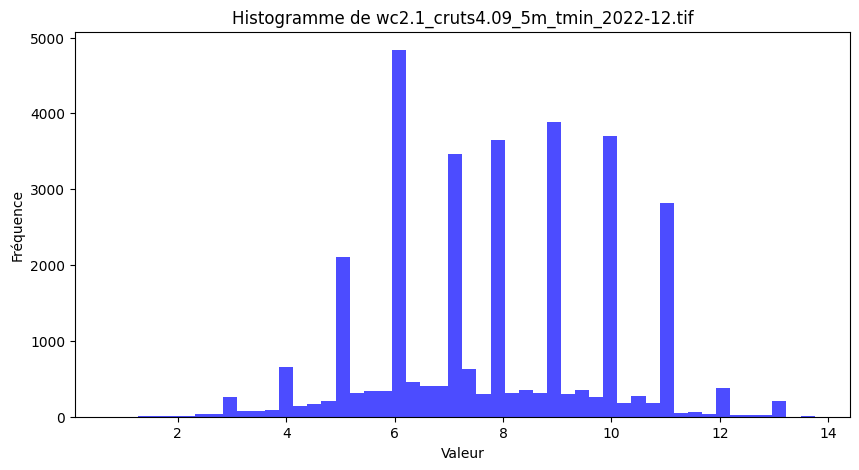

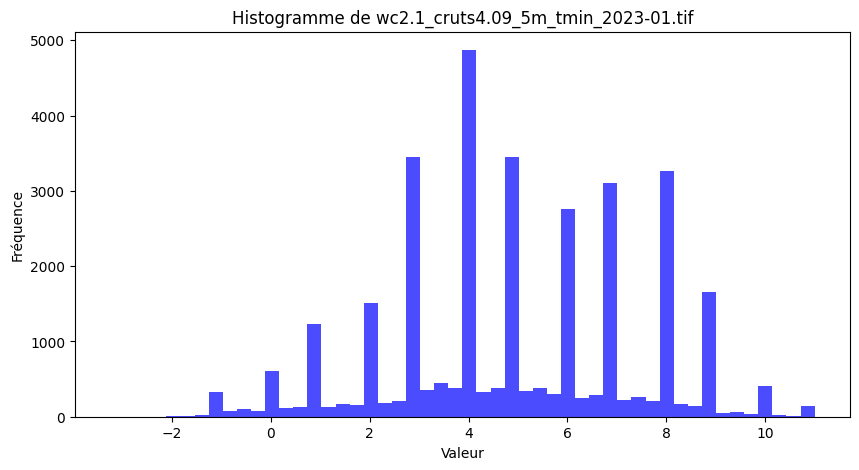

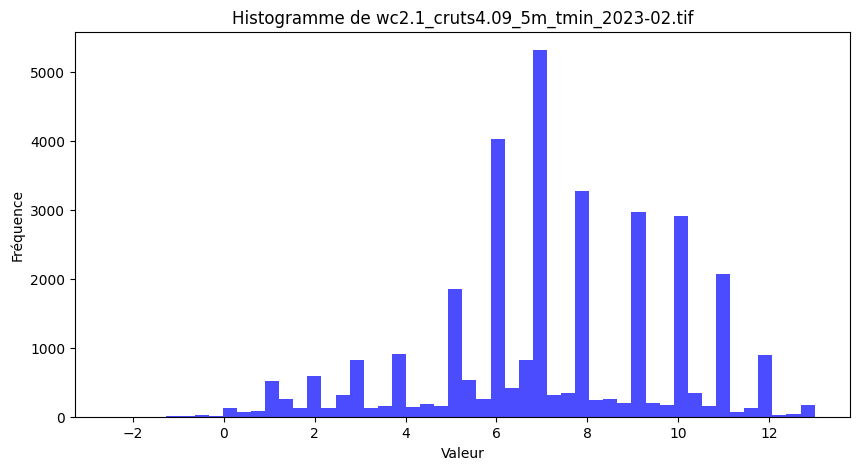

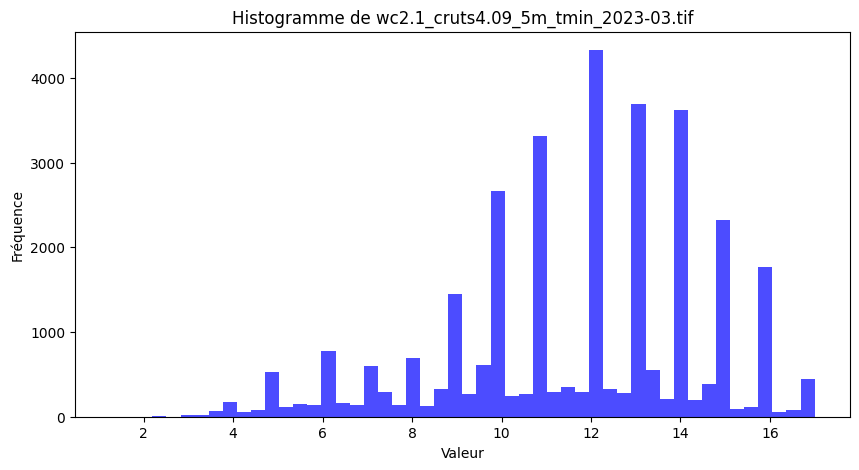

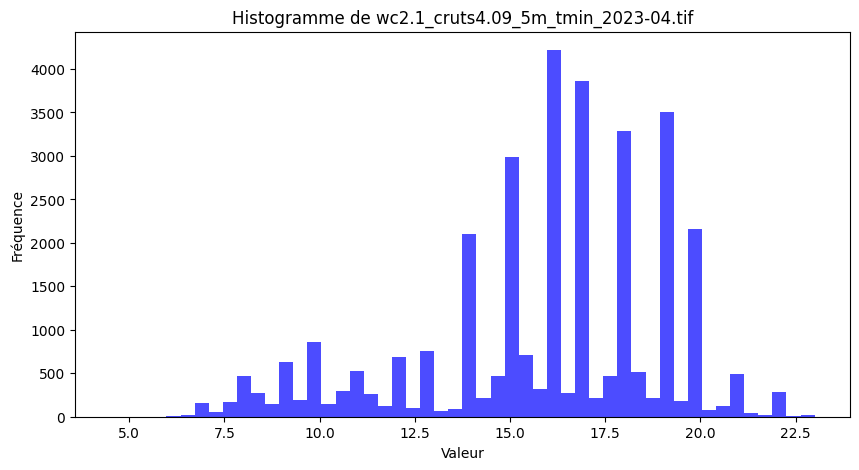

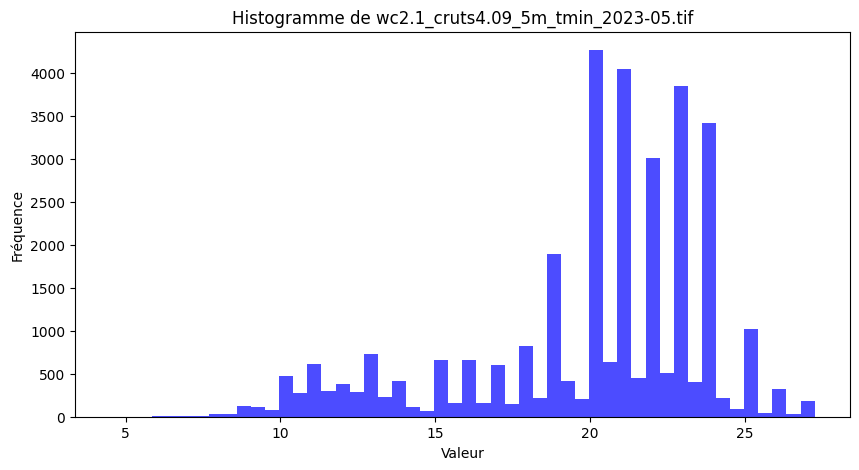

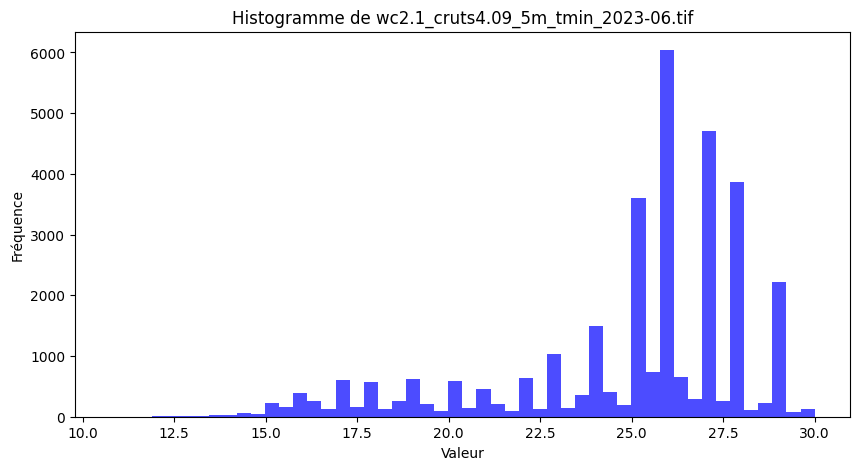

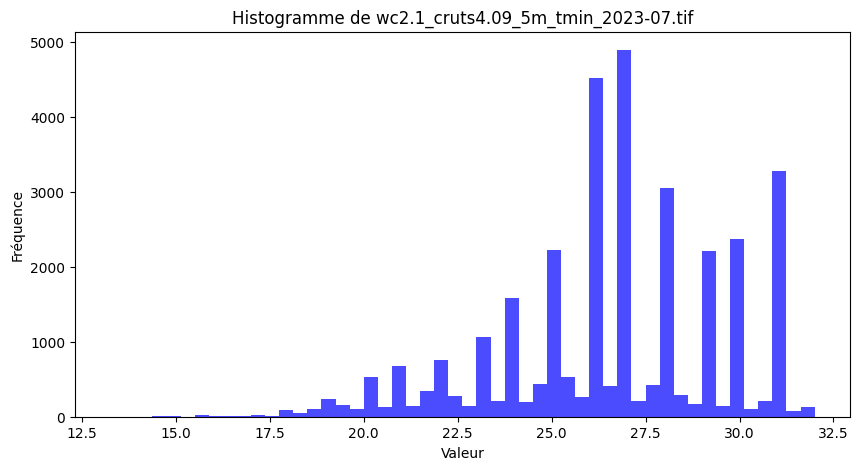

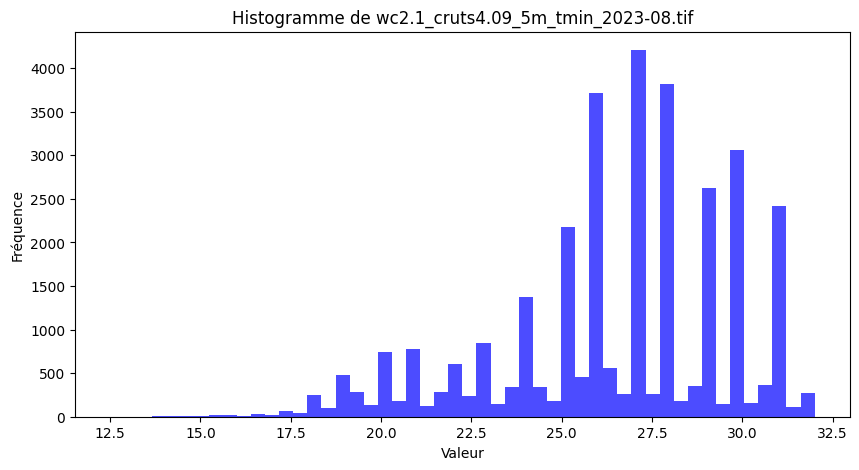

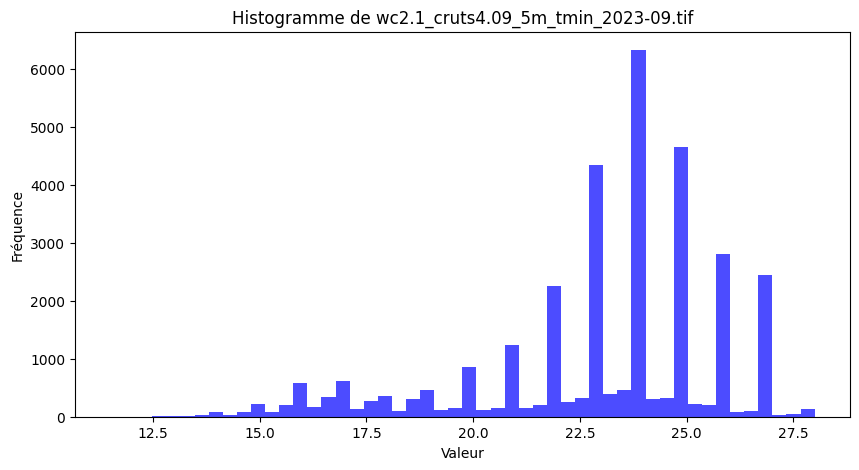

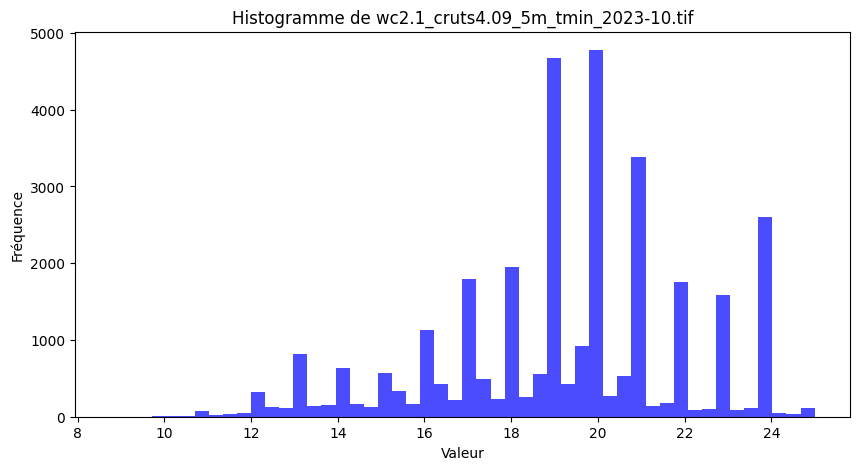

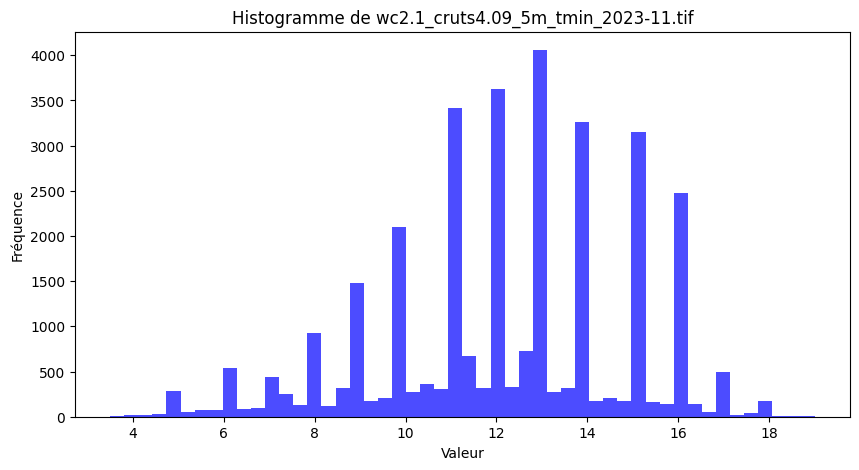

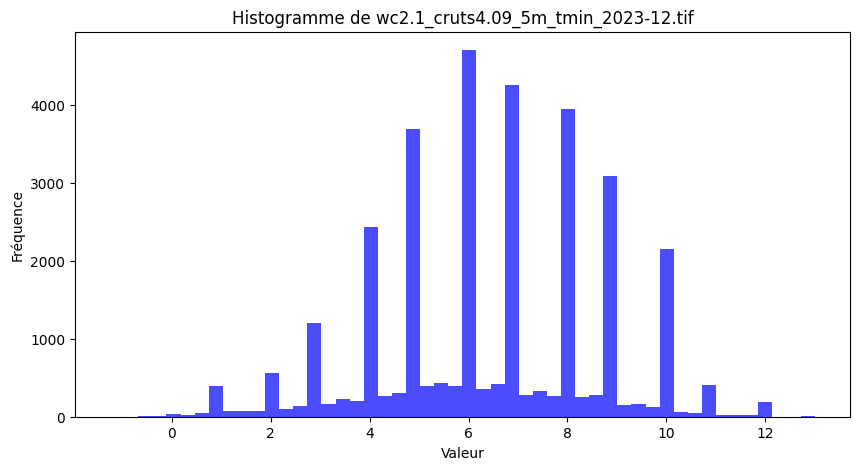

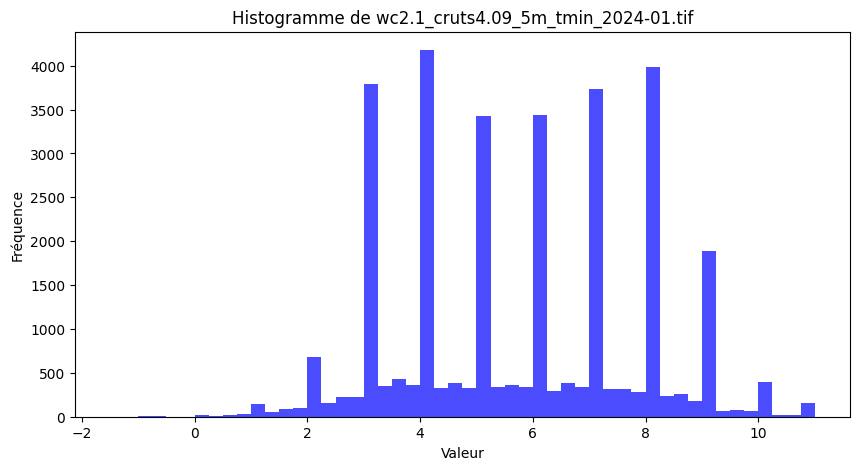

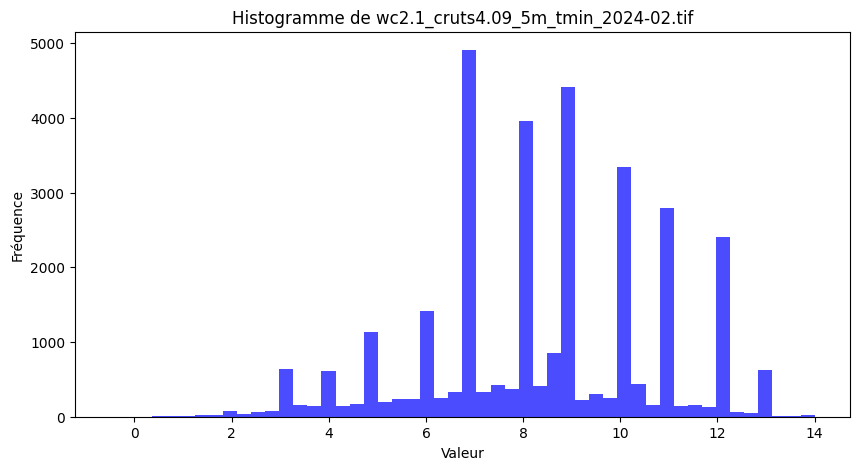

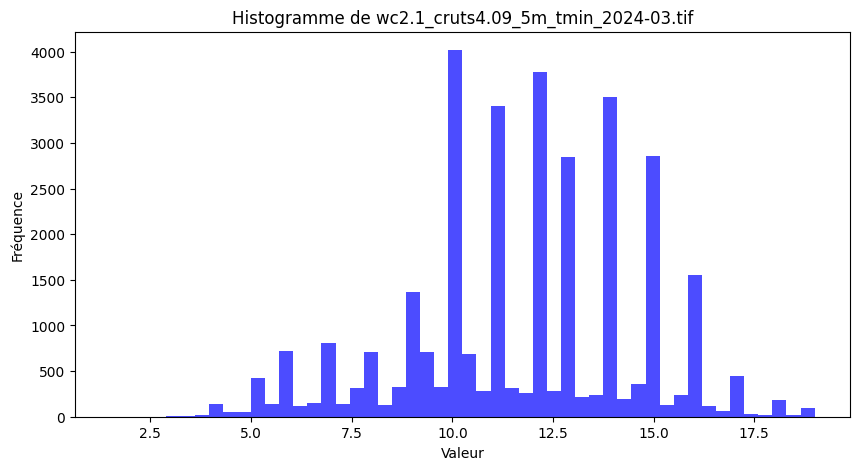

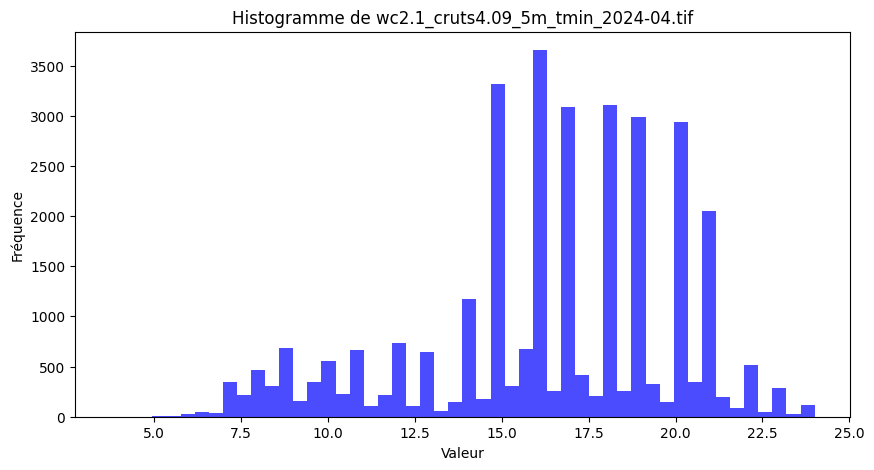

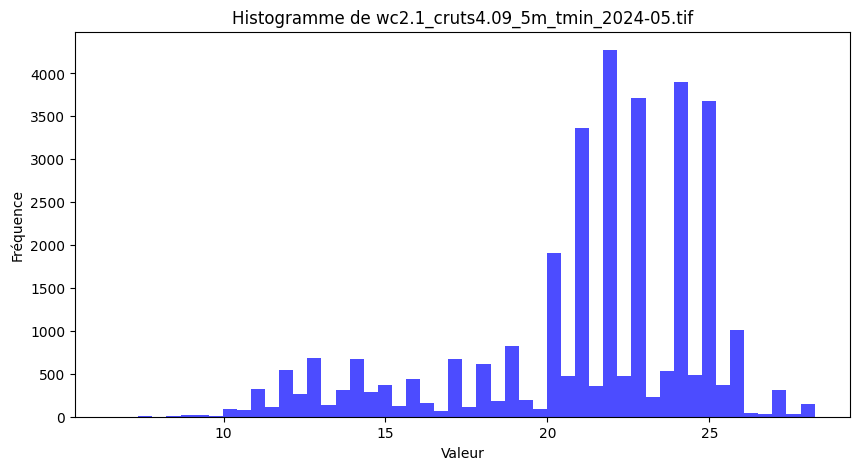

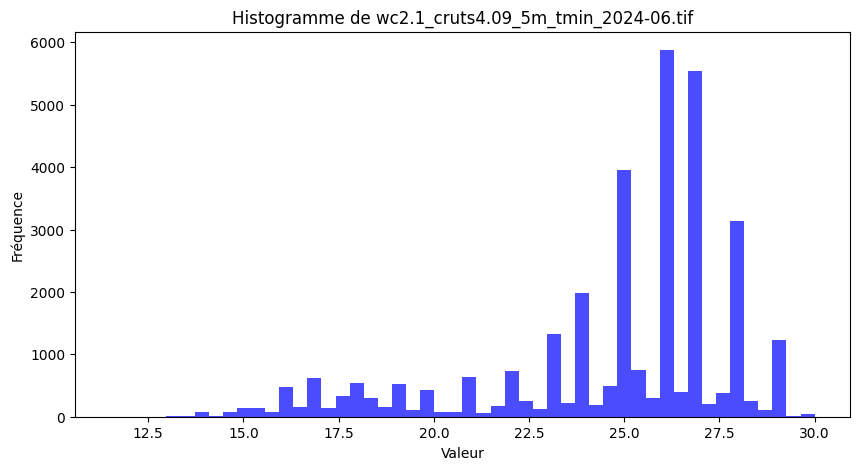

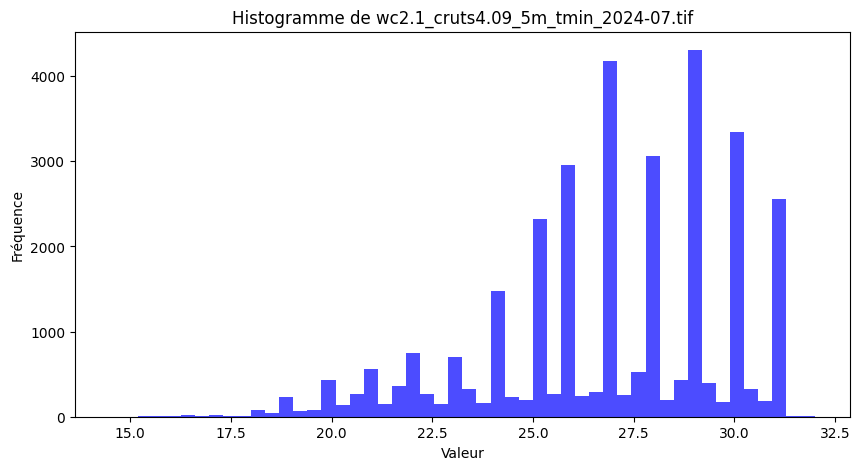

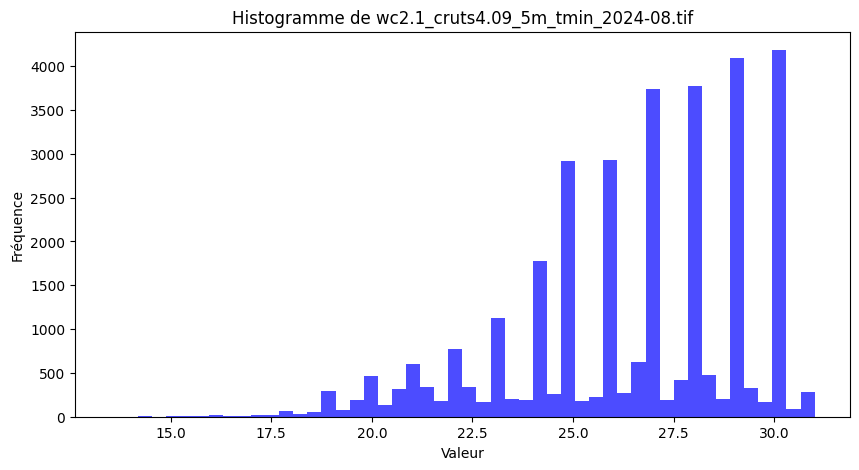

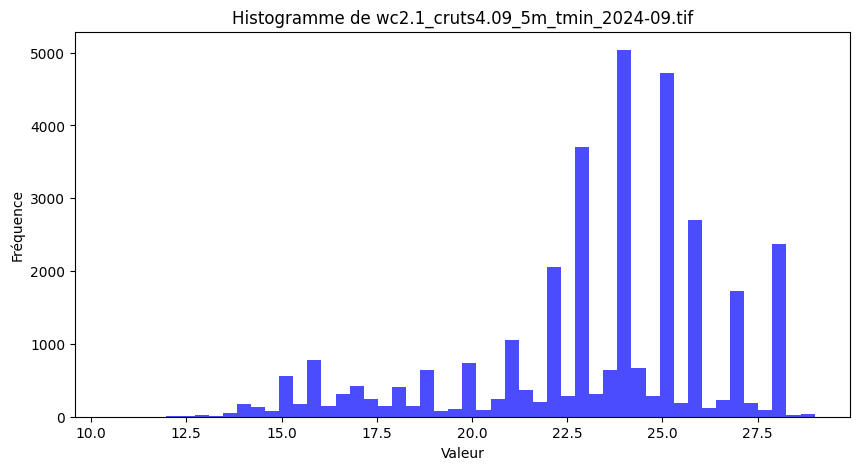

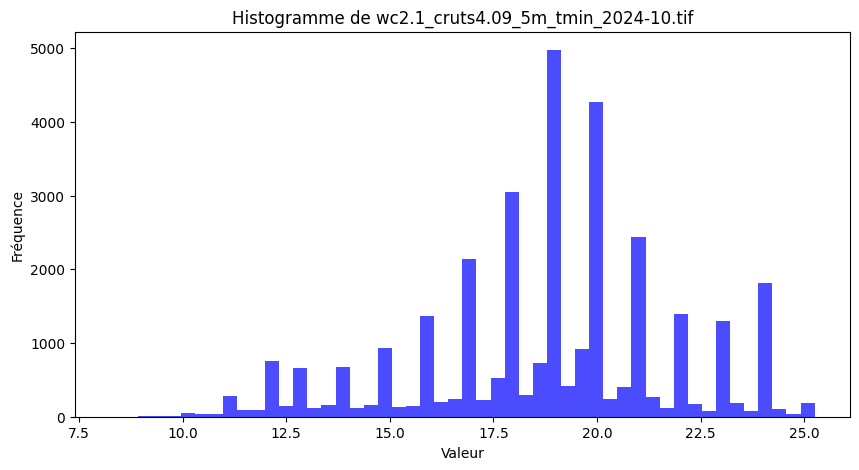

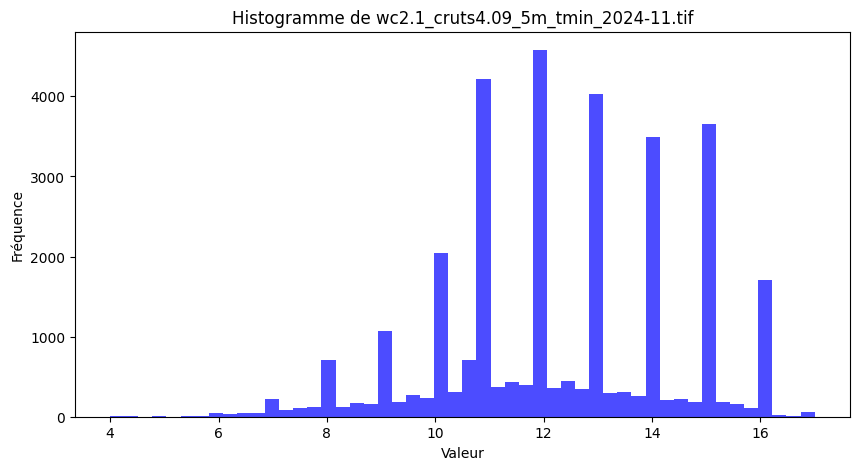

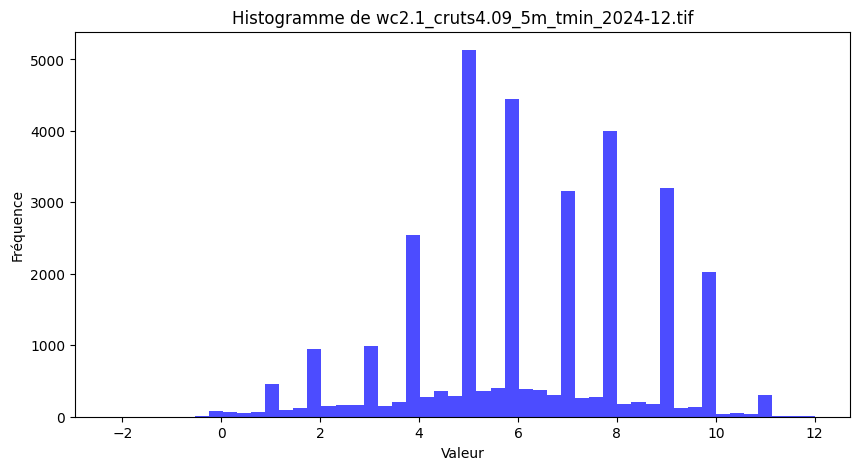

In [65]:
import matplotlib.pyplot as plt

for f in files:
    path = os.path.join(folder, f)
    
    with rasterio.open(path) as src:
        data = src.read(1).astype(float)
        nodata = src.nodata
    
    if nodata is not None:
        data[data == nodata] = np.nan
    
    plt.figure(figsize=(10,5))
    plt.hist(data.flatten(), bins=50, color="blue", alpha=0.7)
    plt.title(f"Histogramme de {f}")
    plt.xlabel("Valeur")
    plt.ylabel("Fréquence")
    plt.show()


In [66]:
tmax_files = [f for f in files if "tmax" in f.lower()]
tmin_files = [f for f in files if "tmin" in f.lower()]

print("TMAX :", tmax_files)
print("TMIN :", tmin_files)


TMAX : ['wc2.1_cruts4.09_5m_tmax_2020-01.tif', 'wc2.1_cruts4.09_5m_tmax_2020-02.tif', 'wc2.1_cruts4.09_5m_tmax_2020-03.tif', 'wc2.1_cruts4.09_5m_tmax_2020-04.tif', 'wc2.1_cruts4.09_5m_tmax_2020-05.tif', 'wc2.1_cruts4.09_5m_tmax_2020-06.tif', 'wc2.1_cruts4.09_5m_tmax_2020-07.tif', 'wc2.1_cruts4.09_5m_tmax_2020-08.tif', 'wc2.1_cruts4.09_5m_tmax_2020-09.tif', 'wc2.1_cruts4.09_5m_tmax_2020-10.tif', 'wc2.1_cruts4.09_5m_tmax_2020-11.tif', 'wc2.1_cruts4.09_5m_tmax_2020-12.tif', 'wc2.1_cruts4.09_5m_tmax_2021-01.tif', 'wc2.1_cruts4.09_5m_tmax_2021-02.tif', 'wc2.1_cruts4.09_5m_tmax_2021-03.tif', 'wc2.1_cruts4.09_5m_tmax_2021-04.tif', 'wc2.1_cruts4.09_5m_tmax_2021-05.tif', 'wc2.1_cruts4.09_5m_tmax_2021-06.tif', 'wc2.1_cruts4.09_5m_tmax_2021-07.tif', 'wc2.1_cruts4.09_5m_tmax_2021-08.tif', 'wc2.1_cruts4.09_5m_tmax_2021-09.tif', 'wc2.1_cruts4.09_5m_tmax_2021-10.tif', 'wc2.1_cruts4.09_5m_tmax_2021-11.tif', 'wc2.1_cruts4.09_5m_tmax_2021-12.tif', 'wc2.1_cruts4.09_5m_tmax_2022-01.tif', 'wc2.1_cruts4.09_

In [67]:
if len(tmax_files) > 0 and len(tmin_files) > 0:
    f1 = os.path.join(folder, tmax_files[0])
    f2 = os.path.join(folder, tmin_files[0])

    with rasterio.open(f1) as src:
        tmax = src.read(1).astype(float)
        nod1 = src.nodata
    with rasterio.open(f2) as src:
        tmin = src.read(1).astype(float)
        nod2 = src.nodata
        
    tmax[tmax == nod1] = np.nan
    tmin[tmin == nod2] = np.nan

    corr = np.corrcoef(tmax.flatten(), tmin.flatten())[0,1]
    print("Corrélation TMAX vs TMIN :", corr)


Corrélation TMAX vs TMIN : nan


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


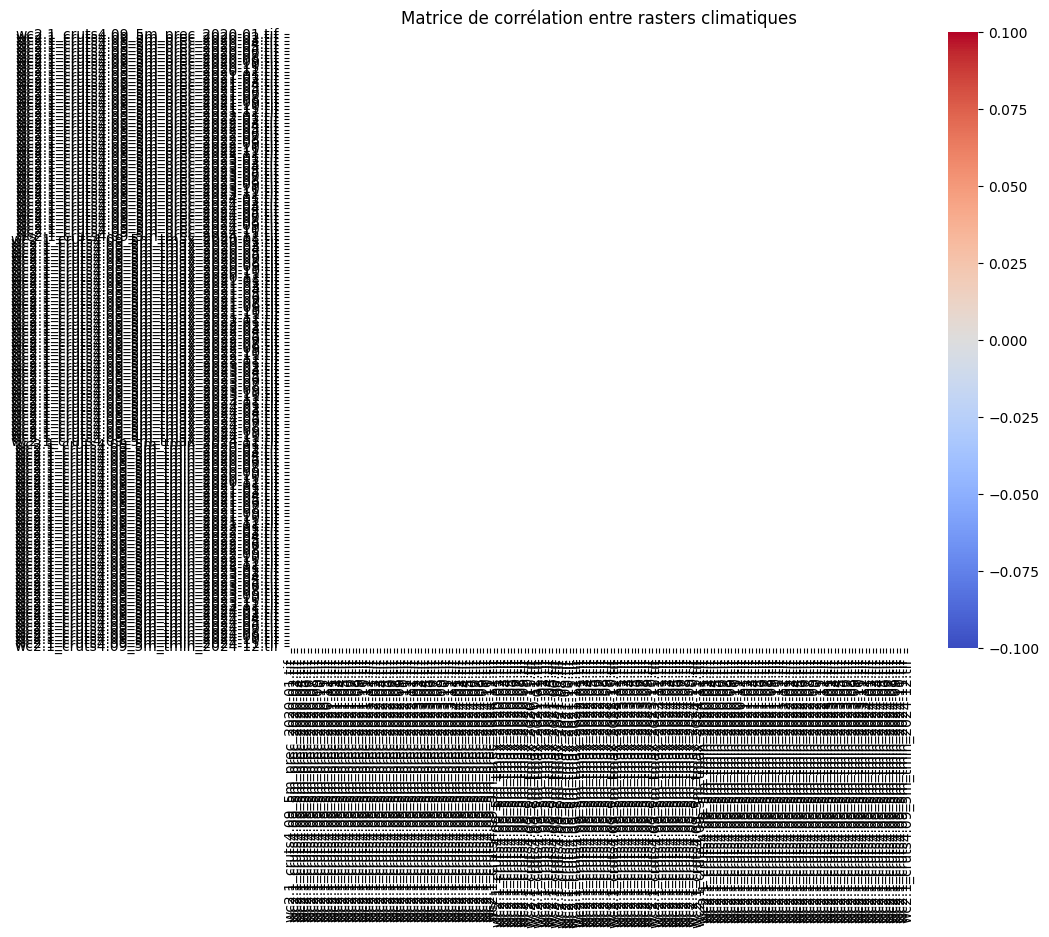

In [68]:
matrix = []
names = []

# Charger les rasters en vecteurs
raster_vectors = []

for f in files:
    path = os.path.join(folder, f)
    with rasterio.open(path) as src:
        data = src.read(1).astype(float)
        nodata = src.nodata
        
    data[data == nodata] = np.nan
    raster_vectors.append(data.flatten())
    names.append(f)

# Calcul corrélation
corr_matrix = np.corrcoef(raster_vectors)

import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, xticklabels=names, yticklabels=names, cmap="coolwarm")
plt.title("Matrice de corrélation entre rasters climatiques")
plt.show()


In [69]:
import os
import rasterio
import numpy as np

folder = r"C:\Users\DELL\Desktop\project_fire\data\processed\climate_clipped"

files = [f for f in os.listdir(folder) if f.endswith(".tif")]

for f in files:
    path = os.path.join(folder, f)
    print("\n📌 Fichier :", f)

    with rasterio.open(path) as src:
        data = src.read(1).astype(float)
        nodata = src.nodata

    # Transformer NODATA en NaN pour l'analyse ONLY
    if nodata is not None:
        data[data == nodata] = np.nan

    # 🔸 Valeurs manquantes
    missing = np.isnan(data).sum()
    total = data.size
    missing_percent = (missing / total) * 100

    # 🔸 Valeurs uniques
    unique = np.unique(data[~np.isnan(data)])   # garde les valeurs existantes
    unique_count = len(unique)

    print("   → NoData (valeur dans le raster):", nodata)
    print("   → Valeurs manquantes (NaN):", missing)
    print(f"   → Pourcentage de NaN : {missing_percent:.2f}%")
    print("   → Nombre de valeurs uniques :", unique_count)

    # Exemple d'affichage des 10 premières valeurs uniques
    print("   → Premières valeurs uniques :", unique[:10])



📌 Fichier : wc2.1_cruts4.09_5m_prec_2020-01.tif
   → NoData (valeur dans le raster): nan
   → Valeurs manquantes (NaN): 22985
   → Pourcentage de NaN : 41.21%
   → Nombre de valeurs uniques : 2674
   → Premières valeurs uniques : [0.         0.075      0.1        0.125      0.15000001 0.175
 0.2        0.22499999 0.22500001 0.25      ]

📌 Fichier : wc2.1_cruts4.09_5m_prec_2020-02.tif
   → NoData (valeur dans le raster): nan
   → Valeurs manquantes (NaN): 22985
   → Pourcentage de NaN : 41.21%
   → Nombre de valeurs uniques : 1341
   → Premières valeurs uniques : [0.         0.125      0.15000001 0.175      0.2        0.22499999
 0.25       0.27500001 0.30000001 0.32500002]

📌 Fichier : wc2.1_cruts4.09_5m_prec_2020-03.tif
   → NoData (valeur dans le raster): nan
   → Valeurs manquantes (NaN): 22985
   → Pourcentage de NaN : 41.21%
   → Nombre de valeurs uniques : 3511
   → Premières valeurs uniques : [0.         0.125      0.2        0.22499999 0.25       0.27500001
 0.30000001 0.32500

In [70]:
import os

climate_dir = r"C:\Users\DELL\Desktop\project_fire\data\processed\climate_clipped"

files = os.listdir(climate_dir)

print("Tous les fichiers trouvés :")
for f in files:
    print(f)


Tous les fichiers trouvés :
wc2.1_cruts4.09_5m_prec_2020-01.tif
wc2.1_cruts4.09_5m_prec_2020-02.tif
wc2.1_cruts4.09_5m_prec_2020-03.tif
wc2.1_cruts4.09_5m_prec_2020-04.tif
wc2.1_cruts4.09_5m_prec_2020-05.tif
wc2.1_cruts4.09_5m_prec_2020-06.tif
wc2.1_cruts4.09_5m_prec_2020-07.tif
wc2.1_cruts4.09_5m_prec_2020-08.tif
wc2.1_cruts4.09_5m_prec_2020-09.tif
wc2.1_cruts4.09_5m_prec_2020-10.tif
wc2.1_cruts4.09_5m_prec_2020-11.tif
wc2.1_cruts4.09_5m_prec_2020-12.tif
wc2.1_cruts4.09_5m_prec_2021-01.tif
wc2.1_cruts4.09_5m_prec_2021-02.tif
wc2.1_cruts4.09_5m_prec_2021-03.tif
wc2.1_cruts4.09_5m_prec_2021-04.tif
wc2.1_cruts4.09_5m_prec_2021-05.tif
wc2.1_cruts4.09_5m_prec_2021-06.tif
wc2.1_cruts4.09_5m_prec_2021-07.tif
wc2.1_cruts4.09_5m_prec_2021-08.tif
wc2.1_cruts4.09_5m_prec_2021-09.tif
wc2.1_cruts4.09_5m_prec_2021-10.tif
wc2.1_cruts4.09_5m_prec_2021-11.tif
wc2.1_cruts4.09_5m_prec_2021-12.tif
wc2.1_cruts4.09_5m_prec_2022-01.tif
wc2.1_cruts4.09_5m_prec_2022-02.tif
wc2.1_cruts4.09_5m_prec_2022-03.tif


In [71]:
files_2024 = [f for f in files if "2024" in f]
print(" Fichiers 2024 retenus :")
for f in files_2024:
    print(f)


 Fichiers 2024 retenus :
wc2.1_cruts4.09_5m_prec_2024-01.tif
wc2.1_cruts4.09_5m_prec_2024-02.tif
wc2.1_cruts4.09_5m_prec_2024-03.tif
wc2.1_cruts4.09_5m_prec_2024-04.tif
wc2.1_cruts4.09_5m_prec_2024-05.tif
wc2.1_cruts4.09_5m_prec_2024-06.tif
wc2.1_cruts4.09_5m_prec_2024-07.tif
wc2.1_cruts4.09_5m_prec_2024-08.tif
wc2.1_cruts4.09_5m_prec_2024-09.tif
wc2.1_cruts4.09_5m_prec_2024-10.tif
wc2.1_cruts4.09_5m_prec_2024-11.tif
wc2.1_cruts4.09_5m_prec_2024-12.tif
wc2.1_cruts4.09_5m_tmax_2024-01.tif
wc2.1_cruts4.09_5m_tmax_2024-02.tif
wc2.1_cruts4.09_5m_tmax_2024-03.tif
wc2.1_cruts4.09_5m_tmax_2024-04.tif
wc2.1_cruts4.09_5m_tmax_2024-05.tif
wc2.1_cruts4.09_5m_tmax_2024-06.tif
wc2.1_cruts4.09_5m_tmax_2024-07.tif
wc2.1_cruts4.09_5m_tmax_2024-08.tif
wc2.1_cruts4.09_5m_tmax_2024-09.tif
wc2.1_cruts4.09_5m_tmax_2024-10.tif
wc2.1_cruts4.09_5m_tmax_2024-11.tif
wc2.1_cruts4.09_5m_tmax_2024-12.tif
wc2.1_cruts4.09_5m_tmin_2024-01.tif
wc2.1_cruts4.09_5m_tmin_2024-02.tif
wc2.1_cruts4.09_5m_tmin_2024-03.tif
wc2

In [72]:
files_to_delete = [f for f in files if "2024" not in f]
print(" Fichiers à supprimer (non-2024) :")
for f in files_to_delete:
    print(f)


 Fichiers à supprimer (non-2024) :
wc2.1_cruts4.09_5m_prec_2020-01.tif
wc2.1_cruts4.09_5m_prec_2020-02.tif
wc2.1_cruts4.09_5m_prec_2020-03.tif
wc2.1_cruts4.09_5m_prec_2020-04.tif
wc2.1_cruts4.09_5m_prec_2020-05.tif
wc2.1_cruts4.09_5m_prec_2020-06.tif
wc2.1_cruts4.09_5m_prec_2020-07.tif
wc2.1_cruts4.09_5m_prec_2020-08.tif
wc2.1_cruts4.09_5m_prec_2020-09.tif
wc2.1_cruts4.09_5m_prec_2020-10.tif
wc2.1_cruts4.09_5m_prec_2020-11.tif
wc2.1_cruts4.09_5m_prec_2020-12.tif
wc2.1_cruts4.09_5m_prec_2021-01.tif
wc2.1_cruts4.09_5m_prec_2021-02.tif
wc2.1_cruts4.09_5m_prec_2021-03.tif
wc2.1_cruts4.09_5m_prec_2021-04.tif
wc2.1_cruts4.09_5m_prec_2021-05.tif
wc2.1_cruts4.09_5m_prec_2021-06.tif
wc2.1_cruts4.09_5m_prec_2021-07.tif
wc2.1_cruts4.09_5m_prec_2021-08.tif
wc2.1_cruts4.09_5m_prec_2021-09.tif
wc2.1_cruts4.09_5m_prec_2021-10.tif
wc2.1_cruts4.09_5m_prec_2021-11.tif
wc2.1_cruts4.09_5m_prec_2021-12.tif
wc2.1_cruts4.09_5m_prec_2022-01.tif
wc2.1_cruts4.09_5m_prec_2022-02.tif
wc2.1_cruts4.09_5m_prec_2022-

In [73]:
for f in files_to_delete:
    os.remove(os.path.join(climate_dir, f))
    print(f"Supprimé : {f}")


Supprimé : wc2.1_cruts4.09_5m_prec_2020-01.tif
Supprimé : wc2.1_cruts4.09_5m_prec_2020-02.tif
Supprimé : wc2.1_cruts4.09_5m_prec_2020-03.tif
Supprimé : wc2.1_cruts4.09_5m_prec_2020-04.tif
The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
Supprimé : wc2.1_cruts4.09_5m_prec_2020-05.tif
Supprimé : wc2.1_cruts4.09_5m_prec_2020-06.tif
Supprimé : wc2.1_cruts4.09_5m_prec_2020-07.tif
Supprimé : wc2.1_cruts4.09_5m_prec_2020-08.tif
Supprimé : wc2.1_cruts4.09_5m_prec_2020-09.tif
Supprimé : wc2.1_cruts4.09_5m_prec_2020-10.tif
Supprimé : wc2.1_cruts4.09_5m_prec_2020-11.tif
Supprimé : wc2.1_cruts4.09_5m_prec_2020-12.tif
Supprimé : wc2.1_cruts4.09_5m_prec_2021-01.tif
Supprimé : wc2.1_cruts4.09_5m_prec_2021-02.tif
Supprimé : wc2.1_cruts4.09_5m_prec_2021-03.tif
Supprimé : wc2.1_cruts4.09_5m_prec_2021-04.tif
Supprimé : wc2.1_cruts4.09_5m_prec_2021-05.tif
Supprimé : wc2.1_cruts4.09_5m_prec_2021-06.tif
Supprimé : w

In [74]:
print(" Dossier final :")
print(os.listdir(climate_dir))


 Dossier final :
['wc2.1_cruts4.09_5m_prec_2024-01.tif', 'wc2.1_cruts4.09_5m_prec_2024-02.tif', 'wc2.1_cruts4.09_5m_prec_2024-03.tif', 'wc2.1_cruts4.09_5m_prec_2024-04.tif', 'wc2.1_cruts4.09_5m_prec_2024-05.tif', 'wc2.1_cruts4.09_5m_prec_2024-06.tif', 'wc2.1_cruts4.09_5m_prec_2024-07.tif', 'wc2.1_cruts4.09_5m_prec_2024-08.tif', 'wc2.1_cruts4.09_5m_prec_2024-09.tif', 'wc2.1_cruts4.09_5m_prec_2024-10.tif', 'wc2.1_cruts4.09_5m_prec_2024-11.tif', 'wc2.1_cruts4.09_5m_prec_2024-12.tif', 'wc2.1_cruts4.09_5m_tmax_2024-01.tif', 'wc2.1_cruts4.09_5m_tmax_2024-02.tif', 'wc2.1_cruts4.09_5m_tmax_2024-03.tif', 'wc2.1_cruts4.09_5m_tmax_2024-04.tif', 'wc2.1_cruts4.09_5m_tmax_2024-05.tif', 'wc2.1_cruts4.09_5m_tmax_2024-06.tif', 'wc2.1_cruts4.09_5m_tmax_2024-07.tif', 'wc2.1_cruts4.09_5m_tmax_2024-08.tif', 'wc2.1_cruts4.09_5m_tmax_2024-09.tif', 'wc2.1_cruts4.09_5m_tmax_2024-10.tif', 'wc2.1_cruts4.09_5m_tmax_2024-11.tif', 'wc2.1_cruts4.09_5m_tmax_2024-12.tif', 'wc2.1_cruts4.09_5m_tmin_2024-01.tif', 'wc2.1_

In [77]:
import os
import rasterio
import numpy as np

climate_dir = r"C:\Users\DELL\Desktop\project_fire\data\processed\climate_clipped"

# Liste des fichiers 2024
files_2024 = [f for f in os.listdir(climate_dir) if f.endswith(".tif")]

for f in sorted(files_2024):
    raster_path = os.path.join(climate_dir, f)

    try:
        with rasterio.open(raster_path) as src:
            data = src.read(1).astype(float)
            nodata = src.nodata

    except Exception as e:
        print(f" Erreur lors de la lecture de {f} : {e}")
        continue

    # Compter NoData
    missing_count = np.sum(data == nodata) if nodata is not None else 0
    nan_count = np.sum(np.isnan(data))

    total = data.size
    missing_total = missing_count + nan_count
    missing_percent = (missing_total / total) * 100

    print(f"\n {f}")
    print(f"- NoData value : {nodata}")
    print(f"- Missing (nodata) : {missing_count}")
    print(f"- Missing (NaN)    : {nan_count}")
    print(f"- Total pixels     : {total}")
    print(f"- % manquant       : {missing_percent:.2f}%")




 wc2.1_cruts4.09_5m_prec_2024-01.tif
- NoData value : nan
- Missing (nodata) : 0
- Missing (NaN)    : 22985
- Total pixels     : 55776
- % manquant       : 41.21%

 wc2.1_cruts4.09_5m_prec_2024-02.tif
- NoData value : nan
- Missing (nodata) : 0
- Missing (NaN)    : 22985
- Total pixels     : 55776
- % manquant       : 41.21%

 wc2.1_cruts4.09_5m_prec_2024-03.tif
- NoData value : nan
- Missing (nodata) : 0
- Missing (NaN)    : 22985
- Total pixels     : 55776
- % manquant       : 41.21%

 wc2.1_cruts4.09_5m_prec_2024-04.tif
- NoData value : nan
- Missing (nodata) : 0
- Missing (NaN)    : 22985
- Total pixels     : 55776
- % manquant       : 41.21%

 wc2.1_cruts4.09_5m_prec_2024-05.tif
- NoData value : nan
- Missing (nodata) : 0
- Missing (NaN)    : 22985
- Total pixels     : 55776
- % manquant       : 41.21%

 wc2.1_cruts4.09_5m_prec_2024-06.tif
- NoData value : nan
- Missing (nodata) : 0
- Missing (NaN)    : 22985
- Total pixels     : 55776
- % manquant       : 41.21%

 wc2.1_cruts4.0

In [79]:
import os

fire_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_2024_all.csv"

if os.path.exists(fire_path):
    print(" Le fichier existe.")
else:
    print(" Fichier introuvable. Vérifie le chemin exact.")



 Fichier introuvable. Vérifie le chemin exact.
